# Wikimedia Research - Translation Imbalances: Testing hypothesis #1


In this notebook we aim to find answer to research questions by interacting with the data sources relevant to it, __the related statement is__:
> Some categories that account for a relevant portion of Wikipedia articles acan be less translated on average, which can significantly contribute to the language imbalance on Wikipedia. Mass media-dominated content, which is more dominated by certain cultures, is more widely shared, and therefore, translated from larger and global languages more often.

__Research questions:__
- RQ 4.1.1 What type of content receives the biggest count?
- RQ. 4.1.2 What type of content receives the lowest count?

__Data sources__
- Data obtained from the APIs by [language edition](https://www.mediawiki.org/wiki/API:Main_page): 
    - Obtain number of translations by page: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Blanglinkscount
    
- Predictions of categories by article: https://www.mediawiki.org/wiki/ORES/Articletopic
- Obtain pages by Wikipedia category: https://petscan.wmflabs.org/

__Steps:__
1. Define the tool to use to get the top level categories of articles
2. Define the categories to use
3. Get pages belonging to a category (IDs)
4. Make API calls to get translation counts by page and aggregate by category
5. Explore further the groups of languages being translated and their pairs



__Concerns:__
- When comparing different articles, should be consider the source language or original language it was written in as a factor for diversity?


In [1]:
main_categories = ['Research', 'Library_science', 'Culture', 'The_arts', 'Geography', 
                   'Places', 'Health', 'Self-care', 'Health_care_occupations', 'History',
                   'Events', 'Formal_sciences','Mathematics', 'Logic', 'Mathematical_sciences',
                  'Science', 'Natural_sciences', 'Nature', 'People', 'Personal_life',
                  'Self', 'Surnames', 'Philosophy', 'Thought', 'Religion', 'Belief', 
                  'Society', 'Social_sciences', 'Technology', 'Applied_sciences']

len(main_categories)

30

In [2]:
# https://www.mediawiki.org/wiki/ORES/Articletopic
# https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids=1161522245

# Tests

### 1. Define the tool to use to get the top level categories of articles




### Testing the accuracy of the articletopic model from https://ores.wikimedia.org/

- We are fetching random articles via: https://en.wikipedia.org/w/api.php?action=query&list=random&rnnamespace=0&rnlimit=10
- We get the page titles and fecth the page URL via: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Binfo
- We go to each page, check the categories at the end and estimate a list of 3-4 expected categories based on this.
- We finally build a list with all of this information.

```
{
    "batchcomplete": "",
    "continue": {
        "rncontinue": "0.141236895977|0.141238067536|13009515|0",
        "continue": "-||"
    },
    "query": {
        "random": [
            {
                "id": 60265289,
                "ns": 0,
                "title": "African Women's classification in the Cape Epic"
            },
            {
                "id": 46434099,
                "ns": 0,
                "title": "Adrien Kela"
            },
            {
                "id": 60533443,
                "ns": 0,
                "title": "Kenneth Bunn"
            },
            {
                "id": 45482666,
                "ns": 0,
                "title": "Cyrtocris fulvicornis"
            },
            {
                "id": 1808010,
                "ns": 0,
                "title": "Islwyn (UK Parliament constituency)"
            },
              {
                "id": 47284944,
                "ns": 0,
                "title": "Capanne, San Marino",
                "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
            },
            
            {
                "id": 28276181,
                "ns": 0,
                "title": "1988 Virginia Slims of Arizona \u2013 Singles",
                "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
            },
            
            {
                "id": 22369872,
                "ns": 0,
                "title": "Herbert Munk",
                "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
            },
            
            {
                "id": 33607623,
                "ns": 0,
                "title": "Risky Business (House)",
                "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
            },
            
            {
                "id": 5864890,
                "ns": 0,
                "title": "Saskatchewan Glacier",
                "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
            },
            
            {
                "id": 4494842,
                "ns": 0,
                "title": "Printer cable",
                "url": "https://en.wikipedia.org/wiki/Printer_cable"
            },
            
            {
                "id": 43821884,
                "ns": 0,
                "title": "James Carruthers",
                "url": "https://en.wikipedia.org/wiki/James_Carruthers"
            },
            
            {
                "id": 41505702,
                "ns": 0,
                "title": "Hammer of Heaven",
                "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
            },
            
            {
                "id": 70186733,
                "ns": 0,
                "title": "The Kyiv Independent",
                "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
            },
            
            {
                "id": 1137772,
                "ns": 0,
                "title": "State room",
                "url": "https://en.wikipedia.org/wiki/State_room"
            },
            
            {
                "id": 43640804,
                "ns": 0,
                "title": "Trials of Kirstin Lobato",
                "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
            },
            
            {
                "id": 62111001,
                "ns": 0,
                "title": "Jessa Dillow Crisp",
                "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
            },
            
            {
                "id": 30634407,
                "ns": 0,
                "title": "Mingqi",
                "url": "https://en.wikipedia.org/wiki/Mingqi"
            },
            
            {
                "id": 8238870,
                "ns": 0,
                "title": "Metronome (artists' and writers' organ)",
                "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
            },
            
            {
                "id": 9155219,
                "ns": 0,
                "title": "Richard Beauchamp, 2nd Baron Beauchamp",
                "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
            },
            
            {
                "id": 26207504,
                "ns": 0,
                "title": "Single point of failure",
                "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
            },
            
            {
                "id": 50151305,
                "ns": 0,
                "title": "Ibrahim Al-Subaie",
                "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
            },
            
            {
                "id": 36718302,
                "ns": 0,
                "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
                "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
            },
            
            {
                "id": 34004381,
                "ns": 0,
                "title": "Viola renifolia",
                "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
            },
            
            {
                "id": 45715050,
                "ns": 0,
                "title": "LNWR 4ft 6in Tank Class",
                "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
            },
            
            
        ]
    }
}

```

The expected results are:
1. '60265289': ['Sports', 'Africa', 'Culture']
2. '4643409': ['Biography', 'Sports', 'Women']
3. '60533443': ['Biography', 'Sports']
4. '45482666': ['STEM', 'Biology', 'Earth and environment']
5. '1808010': ['Politics', 'History', 'Geography']
6. '47284944': ['Geography', 'Europe', 'Southern Europe', 'History']
7. '28276181' : ['Sports', 'Society', 'Culture']
8. '22369872': ['Biography', 'History', 'Geography']
9. '33607623': ['Media', 'Television', 'Entertainment', 'North America']
10. '5864890': ['North America', 'Americas', 'Geography']
11. '4494842': ['STEM', 'Computing', 'Engineering']
12. '43821884': ['Biography', 'History']

#### Supported languages

The supported languages are:

    - Czech
    - Korean
    - Vietnamese
    - Arabic
    - English
    - Basque
    - Hungarian
    - Armenian
    - Serbian
    - Ukranian
   
Notes:
- The results are still in English.
    
__References:__ 
- https://ores-support-checklist.toolforge.org/
- https://ores.wikimedia.org/v3/scores

In [9]:
# Example of making a call with the cswiki (Czech)
ress = '22814052|22376572|22897051'
url = f"https://ores.wikimedia.org/v3/scores/cswiki/?models=articletopic&revids={ress}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

response.json()

200


{'cswiki': {'models': {'articletopic': {'version': '1.3.0'}},
  'scores': {'22376572': {'articletopic': {'score': {'prediction': ['Geography.Regions.Europe.Europe*',
       'History and Society.Military and warfare'],
      'probability': {'Culture.Biography.Biography*': 0.01734748973809565,
       'Culture.Biography.Women': 0.0008734782494353318,
       'Culture.Food and drink': 0.0033172337587473815,
       'Culture.Internet culture': 0.002627588131218483,
       'Culture.Linguistics': 0.009228339218182077,
       'Culture.Literature': 0.009496513305451145,
       'Culture.Media.Books': 0.002958332982475919,
       'Culture.Media.Entertainment': 0.002551308152631748,
       'Culture.Media.Films': 0.0005026620955611899,
       'Culture.Media.Media*': 0.021011287679556106,
       'Culture.Media.Music': 0.0004497918260572899,
       'Culture.Media.Radio': 0.00019531415828545804,
       'Culture.Media.Software': 0.0012731117686133658,
       'Culture.Media.Television': 0.0006339708230484

In [7]:
def remove_rows_if_already_exist(first_filename, end_filename):
    """
        This tool allows us to remove rows from a CSV file, given a list of rows from another CSV file.
        It can be used to make sure that a file of pages collected by category do not include rows or pages
        we have already saved or processed in another loop or run. 
    
    """
    
    
    with open(f'data/input/categories/pages-ids-processed/{first_filename}', mode='r', encoding="utf8") as csv_file_first:
            # read the file with the rows to check against (initial rows)
            csvreader1 = csv.DictReader(csv_file_first)
            original_list = {row['pageid']:row for row in csvreader1}
            
    with open(f'data/input/categories/pages-ids/{end_filename}', mode='r', encoding="utf8") as csv_file_end:
            # read the files that we may have to clean
            csvreader2 = csv.DictReader(csv_file_end)
            file_to_clean = {row['pageid']:row for row in csvreader2}

    # delete key if it exist
    for page_id in original_list:
        print(page_id)
        file_to_clean.pop(page_id, None)
    
    # save final results
    rows = file_to_clean.values()
    fieldnames = ["number","title","pageid","namespace","length","touched"]
    with open(f'data/input/categories/pages-ids/{end_filename}', 'w', encoding='UTF8', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writerows(rows)

In [8]:
initial_file = "en-politics and government-page_ids_processed.csv"
end_file = "en-politics and government-page_ids.csv"
remove_rows_if_already_exist(initial_file, end_file)

13456
2188206
35312751
1618081
306967
49879674
4377103
2345894
53642027
1729727
68273
1853472
42308421
63455259
1648647
1697919
43473082
18832046
174363
2199751
742475
69984661
31148390
7350640
61580753
2826064
27830442
51552568
3084768
8003324
21837800
47679367
292269
1275028
65461
56231
358375
23972934
52756707
38051973
9237097
3822608
51248006
505450
2953988
12898725
3438593
1542906
26516843
363810
20370801
39108397
692401
42335212
15401789
1873480
1186194
39311177
10094760
27296602
73120286
31507795
5213868
18051387
4090507
731254
39601333
61799568
21549137
967280
1081047
12436934
39184036
12449570
13033811
41053306
63683133
4866560
31330683
5200001
11827668
36107860
34488551
2142843
999438
362102
48934
31292
19167022
1056228
51244073
18566277
1390880
1835845
7913597
4843627
123443
168486
54092590
20033941
10968729
9351472
781790
2383828
1343066
3118828
72998328
46188299
38008251
1735624
34517249
8134295
216313
1999877
1297768
4426917
27802606
364896
994892
1308730
54346851
252858


# Implementation

### 2. Define categories to use

In [1]:
## Get categories list and mappers by layers
import os
import yaml

directory = 'data/input/categories/taxonomy'
# corresponds to the top level categories [1st layer]
layer_cat_1st = []
# corresponds to the immediate inner categories after the top level categories [2nd layer]
layer_cat_2nd = {}
# correspond to the innermost categories after the inner categories [3rd layer]
layer_cat_3rd = {}

# iterate over each file to get all levels
for filename in os.listdir(directory):
    if filename.endswith(".yaml"):
        for top_cat, categories in yaml.safe_load(open(f'{directory}/{filename}')).items():
            # 1st layer
            layer_cat_1st.append(top_cat) 
            # 2nd layer
            layer_cat_2nd[top_cat] = list(categories.keys())
            # 3rd layer
            for cat, inner_cat in categories.items():
                if isinstance(inner_cat, dict):
                    layer_cat_3rd[cat] = list(inner_cat.keys())
                
    else:
        continue
# TODO: save results via Adam's libraries        
display("1ST LAYER:", layer_cat_1st )
display("2ND LAYER:", layer_cat_2nd )
display("3RD LAYER:", layer_cat_3rd )

'1ST LAYER:'

['Culture', 'Geography', 'History and Society', 'STEM']

'2ND LAYER:'

{'Culture': ['Biography',
  'Food and drink',
  'Internet culture',
  'Linguistics',
  'Literature',
  'Media',
  'Performing arts',
  'Philosophy and religion',
  'Sports',
  'Visual arts'],
 'Geography': ['Geographical', 'Regions'],
 'History and Society': ['History',
  'Society',
  'Business and economics',
  'Education',
  'Military and warfare',
  'Politics and government',
  'Transportation'],
 'STEM': ['STEM*',
  'Biology',
  'Chemistry',
  'Engineering',
  'Earth and environment',
  'Libraries & Information',
  'Computing',
  'Mathematics',
  'Medicine & Health',
  'Physics',
  'Space',
  'Technology']}

'3RD LAYER:'

{'Biography': ['Biography*', 'Women'],
 'Media': ['Media*',
  'Entertainment',
  'Music',
  'Films',
  'Books',
  'Radio',
  'Television',
  'Video games',
  'Software'],
 'Visual arts': ['Visual arts*',
  'Architecture',
  'Comics and Anime',
  'Fashion'],
 'Regions': ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']}

### 3. Get pages belonging to a category (IDs)

#### Steps:

- Given a top level category, get the immediate subcategories via:
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategorymembers
- Fetch the pages count for each and aggregate to find the total page count: 
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategoryinfo
- Calculate the ideal sample dsize. 
        

### English

- Map categories with the topics of the ORES model to retrieve pages to verify existence (manually) https://en.wikipedia.org/wiki/Special:CategoryTree. We have created a list that includes categories that are equivalent to the original but exist in the wiki.


-

#### Culture
- Biography: Living People, Dead People
- Food and drink: Food and drink
- Internet culture: 'Internet culture
- Linguistics: Linguistics
- Literature: Literature
- Media: Mass media
- Performing arts:Performing arts
- Philosophy and religion: (Philosophy, Religion)
- Sports: Sports
- Visual arts': Visual arts

#### Geography
- Geographical: Geography
- Regions: Regions


#### History and Society
- Business and economics: (Business, Economics)
- Education: Education
- Military and warfare: (Military, War)
- Politics and government: (Politics, Government)
- Transportation: (Transport, Vehicles)
                                      

#### STEM
- STEM*: None
- Biology: Biology,
- Chemistry: Chemistry
- Engineering: Engineering
- Earth and environment: (Earth, Environmental science)
- Libraries and information: (Libraries','Information')
- Computing: Computing
- Mathematics: Mathematics
- Medicine & Health: (Medicine, Health)
- Physics: Physics
- Space: Space
- Technology: Technology


**DELETED/NOT INCLUDED:** [History, Society]

There are 28 categories in total (Enginerring and STEM* are merged).

### Czech

#### Culture
- Biography: (Lidé, ženy, muži)
- Food and drink: (Jídlo_a_pití, Gastronomie, Potraviny, Nápoje)
- Internet culture': Internetová kultura
- Linguistics': Lingvistika
- Literature': Literatura
- Media: Masmédia
- Performing arts: Umělci_múzických_umění
- Philosophy and religion: (Filozofie, Náboženství)
- Sports: Sport
- Visual arts': Výtvarné umění
                                  
                                  
#### Geography
- Geographical: Geografie
- Regions: Regiony


#### History and Society
- History: Historie
- Society: Společnost
- Business and economics': (Podnikání, Ekonomika)
- Education: Vzdělávání
- Military and warfare: (Vojenství, Válečné_lodě)
- Politics and government: (Politika, Vláda)
- Transportation: Doprava  

                                      
#### STEM
- STEM*: Engineering
- Biology: (Biologie, Flóra podle zemí, Fauna podle kontinentů)
- Chemistry: (Chemie, Chemikálie)
- Engineering: Inženýrství
- Earth and environment: (Země, životní prostředí)
- Libraries and information: (Knihovny, Informace)
- Computing: Informatika
- Mathematics: Matematika
- Medicine & Health: (Lékařství, Zdraví)
- Physics: Fyzika
- Space: Prostor
- Technology: Technika


**DELETED/NOT INCLUDED:** [History, Society]

### Vietnamese

#### Culture
- Biography: Nhân vật
- Food and drink: Ăn uống 
- Internet culture: Văn hóa Internet 
- Linguistics: (Ngôn ngữ học, Ngôn ngữ)
- Literature: Văn học
- Media: Truyền_thông_đại_chúng
- Performing arts: Nghệ_thuật_biểu_diễn
- Philosophy and religion: (Triết_học, Tôn giáo)
- Sports: Thể_thao
- Visual arts: 
                                  
                                  
#### Geography
- Geographical: Địa lý học
- Regions: (Địa_lý_vùng, Vùng, Vùng_địa_lý)


#### History and Society
- Business and economics: (Kinh tế học lao động, Việc làm, Kinh_tế_học_ứng_dụng, Kinh tế học, Kinh_tế)
- Education: (Giáo dục, Chia sẻ kiến thức, Nghiên cứu chuyên môn)
- Military and warfare: (Tổ chức quân sự
Quân đội
Xung đột toàn cầu
Các_cuộc_chiến_tranh
Chiến tranh
Xung_đột)
- Politics and government:
- Transportation: 

                                      
#### STEM
- STEM*: 
- Biology:
- Chemistry:
- Engineering:
- Earth and environment:
- Libraries and information:
- Computing: Informatika
- Mathematics: Matematika
- Medicine & Health:
- Physics: Fyzika
- Space:
- Technology:


**DELETED/NOT INCLUDED:** [History, Society]

On defining the ideal sample size for the analysis:

__Parameters:__
- Confidence level: 95%
- Margin of error: 5-3%. We will initially start with 3% and expand to 3%

__References:__ 
 - https://www.surveymonkey.com/mp/sample-size-calculator/
 - https://tools4dev.org/resources/how-to-choose-a-samplesize/#:~:text=Most%20statisticians%20agree%20that%20the,to%20survey%20all%20of%20them.

## Important notes:

- To get the subcategories we use the following endpoint, set with a parameter that returs the categories. An example that returnds pages and categories:  https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:Physics
- Then, to get the total count, we use another API call with the list of subcategories obtained to get the counts and aggregate them. An example: https://en.wikipedia.org/w/api.php?action=query&list=allcategories&acprop=size&aclimit=200&acmin=800000
- However, we are not doing this and instead use counts from https://petscan.wmflabs.org/ because the previous alternative does not consider or include nested subcategories. 


### 4. Make API calls to get translation counts by page and aggregate by category

We are using the tool PetScan: https://petscan.wmflabs.org/

- Input category and query the results. 
- Save the results in CSV format.
- Make API call to get the translation counts per page.
- Create a new dataset from results.

In [2]:
## Import libraries
import csv
import os
import pandas as pd
import requests
import sys
 
# adding translation_stats to the system path
sys.path.insert(0, 'C:/Users/natha/Documents/translation-stats-lib/translation_stats/')
#from data_store import cached
 

In [3]:
## Get last revision ID

# NOTE: the API sorts the order from newest to oldest (rvdir is by default \"older\", which means
# that is list the newest first; which, by the way, is confusing), when you specify the rvlimit=1, you get the last
def get_last_revision_id(wiki_lang:str, title:str, id_:str) -> str:
    revision_id = None
    url = f"https://{wiki_lang}.wikipedia.org/w/api.php?action=query&prop=revisions&titles={title}&rvlimit=1&rvprop=ids&format=json"

    # Making a GET requestS
    response = requests.get(url)
    # See status code
    status = response.status_code
    res = response.json()
    display(res)
    if status == 200:
        print(f"revision id obtained for page {title}, with ID {id_}, from the language {wiki_lang}")
        # process the results
        page_results = res['query']['pages']
         
        # extract from result
        page = page_results[id_]
        revision_id_json = page['revisions'][0]
        revision_id =  str(revision_id_json['revid'])

    # TODO: consider logic to add a section that makes request a second time if it does not work initially
    return revision_id
   

In [4]:
get_last_revision_id('cs', 'Lední_hokej_na_spartakiádě_národů_SSSR', '1868636')


1868636

{'continue': {'rvcontinue': '20230728092038|23010134', 'continue': '||'},
 'query': {'normalized': [{'from': 'Lední_hokej_na_spartakiádě_národů_SSSR',
    'to': 'Lední hokej na spartakiádě národů SSSR'}],
  'pages': {'1868636': {'pageid': 1868636,
    'ns': 0,
    'title': 'Lední hokej na spartakiádě národů SSSR',
    'revisions': [{'revid': 23013815, 'parentid': 23010134}]}}}}

revision id obtained for page Lední_hokej_na_spartakiádě_národů_SSSR, with ID 1868636, from the language cs


1868636

In [5]:
## Method: get predictions for one article\n",
def get_topic_prediction(lang, rev_id, page_id, topic) -> list:
    # TODO: add documentation\n",
    
    wiki = f"{lang}wiki"
    url = f"https://ores.wikimedia.org/v3/scores/{wiki}/?models=articletopic&revids={rev_id}"
    
    # Making a GET request
    response = requests.get(url)
    res = response.json()
    status = response.status_code

    # extract results
    if status == 200:
        print(f"prediction list obtained for rev_id {rev_id}, with ID {page_id}, from the language {lang}")
        # get the top three predictions with the highest score
        results_revisions = res[wiki]['scores']
        prediction_list = results_revisions.get(rev_id).get('articletopic').get('score').get('prediction')
        prediction_list_clean = [prediction.split('.')[1].capitalize() for prediction in prediction_list]
        
        # TODO: for engineering and similar categories, have a map that accepts up
        # to two categories and has an interception
        if topic in prediction_list_clean:
            # out
            return True
        elif topic == "Engineering" and "Stem*" in prediction_list_clean:
            # out
            print("Engineering case")
            return True
        else:
            print(f"ERROR: {prediction_list_clean} vs. {topic}")
    # out
    return False
    

In [90]:
## iterate over each file to collect all data
from collections import defaultdict

directory = 'data/input/categories/pages-ids'
directory_post = 'data/input/categories/pages-ids-processed'

header_post = ['number','title','pageid','namespace','length','touched','last_revision','langs_count','category','wiki_lang']
categories_2nd_mapper_raw = {"en":[], "cs":[], "vi": []}
cat_count = 0

for filename in os.listdir(directory):
    
    if filename.endswith(".csv"):
        cat_count += 1
        wiki_lang = filename.split('-')[0]
        filename_cat = filename.split('-')[1].capitalize()
        
        # if there are files with the processed data, fecth them first instead of calling APIs
        expected_filename = f"{wiki_lang}-{filename_cat.lower()}-page_ids_processed.csv"
        if os.path.exists(f'{directory_post}/{expected_filename}'):
            with open(f'{directory_post}/{expected_filename}', mode='r', encoding="utf8") as csv_file_saved:
                csv_reader_saved = csv.DictReader(csv_file_saved)
                categories_2nd_mapper_raw[wiki_lang].extend(csv_reader_saved)

                # skip this category and go to the next
                continue
                        
                        
        with open(f'{directory}/{filename}', mode='r', encoding="utf8") as csv_file:
            # read as a dictionary
            csv_reader = csv.DictReader(csv_file)    
               
            row_count = 0
            # save validated rows to file
            with open(f"{directory_post}/{expected_filename}", 'w', encoding='UTF8', newline='') as f:
                # set writer
                writer = csv.writer(f)
                writer.writerow(header_post)

                for row in csv_reader:
                        # check if the article is predicted to belong to an ORES topic
                        row['last_revision'] = get_last_revision_id(wiki_lang, 
                                                                    row['title'].replace('&','%26').replace('+', '%2B'), row['pageid'])
                        was_predicted_successfully =  get_topic_prediction(wiki_lang,
                                                                           row['last_revision'], row['pageid'], filename_cat)

                        if was_predicted_successfully:
                            # add values
                            row_count += 1
                            row['langs_count'] = 0
                            row['category'] = filename_cat
                            row['wiki_lang'] = wiki_lang
                            page_title = row['title'].replace('_', ' ')
                            
                            # save row to file 
                            writer.writerow(row.values())

                            # add to the corresponding group
                            categories_2nd_mapper_raw[wiki_lang].append(row)
                            #categories_2nd_mapper_raw[wiki_lang][filename_cat].append(row)

                        print(f"PROGRESS COUNT: {row_count}/400 -- CATEGORY {filename_cat}\n\n")
                        # if we have saved 400 rows that meet the criteria, go to the next category
                        if row_count >= 400:
                            print(f"\nSuccessfully obtained 400 validated rows for the category {filename_cat.upper()}. {cat_count}/35\n\n")
                            break
                
            # we are printing this count to help reference the (rough) expected number of counts
            print(f"ROW COUNT: {row_count} -- CATEGORY {filename_cat}")
# out
print(f"\nCATEGORIES COUNT: {cat_count}")


CATEGORIES COUNT: 62


**NOTE:** Processing a CSV file corresponding to a topic takes 6-8 min on average. 
8*35 (time it take to process one topic (file)*total number of topics) = 280 min, which is 4.6 h

In [91]:
del categories_2nd_mapper_raw["cs"]
del categories_2nd_mapper_raw["vi"]
display(len(categories_2nd_mapper_raw["en"]))

11200

In [92]:
## Extract the titles from the list of Wikipedia articles by language

categories_2nd_mapper = {}
for lang, arr in categories_2nd_mapper_raw.items():
    # use list comprehension to get a list of titles
    categories_2nd_mapper[lang] = [article['title'] for article in arr]
  

In [52]:
categories_2nd_mapper["en"] = [article['title'] for article in categories_2nd_mapper_raw['en']]

len(categories_2nd_mapper["en"]) 

11200

In [53]:
## Get translation count for all pages


# Reference: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Blanglinkscount
import traceback
from time import sleep

from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# general
result_pages_counts = []

# set requests parameters to retry on 'Max retries exceeded with url' and have enough wait time between exceptions
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('https://', adapter)

# used to track call number
api_call_number = 0


for lang in categories_2nd_mapper.keys():
    page_titles = categories_2nd_mapper[lang]
    print(len(page_titles))
    # initialize
    slice_start = -50
    slice_end = 0
    titles_len = len(page_titles)

    while (slice_end < titles_len):
        try:
            # check to update slice values
            slice_start = slice_start + 50 
            slice_end =  slice_end + 50 

            print('\n\n\n')
            print(f"PAGE TITLE GROUP {page_titles[:5]}...")
            # work with page titles batches that make request per 50 titles within a user language group
            titles_l = page_titles[slice_start:slice_end]
            titles =  "|".join(titles_l)
            url = f'https://{lang}.wikipedia.org/w/api.php?action=query&prop=langlinkscount&titles={titles}&format=json'  

            # GET request
            response = session.get(url)
            print(f'\nResponse:  {response.json()}')

            if response.status_code != 200:
                raise Exception(f"The call failed: {response.status_code}")

            else:
                # See request JSON
                res = response.json()

                if res.get('query'):
                    # save results to dictionary to process later
                    res = res['query']['pages']
                    result_pages_counts.append(res)


                    api_call_number += 1
                    print(f'\n\nPROGRESS: {slice_start}-{slice_end} \n\nCALL NUMBER: {api_call_number}')
                else: 
                    raise Exception(res.get("error"))


        except requests.exceptions.ConnectionError as errc:
            print ("Error Connecting:",errc)

        except Exception as e:
            print(e)
            traceback.print_exc()



11200




PAGE TITLE GROUP ['Paul_Molitor', 'Tyler_Ward', 'Marianne_Blicher', 'Marta_Felicitas_Galedary', 'Spyros_Gogolos']...

Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Paul_Molitor', 'to': 'Paul Molitor'}, {'from': 'Tyler_Ward', 'to': 'Tyler Ward'}, {'from': 'Marianne_Blicher', 'to': 'Marianne Blicher'}, {'from': 'Marta_Felicitas_Galedary', 'to': 'Marta Felicitas Galedary'}, {'from': 'Spyros_Gogolos', 'to': 'Spyros Gogolos'}, {'from': 'Erika_Christensen', 'to': 'Erika Christensen'}, {'from': 'Beethova_Obas', 'to': 'Beethova Obas'}, {'from': 'Michael_Oakes', 'to': 'Michael Oakes'}, {'from': 'Fred_LaBour', 'to': 'Fred LaBour'}, {'from': 'Anna_Fantastic', 'to': 'Anna Fantastic'}, {'from': 'Brunello_Iacopetta', 'to': 'Brunello Iacopetta'}, {'from': 'Rex_Hunt', 'to': 'Rex Hunt'}, {'from': 'Jermaine_Taylor_(basketball)', 'to': 'Jermaine Taylor (basketball)'}, {'from': 'Billy_Cockcroft', 'to': 'Billy Cockcroft'}, {'from': 'Ellis_Barkworth', 'to': 'Ellis Barkworth'}


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Simon_Target', 'to': 'Simon Target'}, {'from': 'Roman_Popov_(footballer)', 'to': 'Roman Popov (footballer)'}, {'from': 'Joey_Gjertsen', 'to': 'Joey Gjertsen'}, {'from': 'Natalia_Zubarevich', 'to': 'Natalia Zubarevich'}, {'from': 'David_Bogie', 'to': 'David Bogie'}, {'from': 'Nib_Hogg', 'to': 'Nib Hogg'}, {'from': 'Josip_Bodrožić', 'to': 'Josip Bodrožić'}, {'from': 'James_Medway', 'to': 'James Medway'}, {'from': 'Valerie_Trueblood', 'to': 'Valerie Trueblood'}, {'from': 'Bojan_Tokić', 'to': 'Bojan Tokić'}, {'from': 'Jorge_Briola', 'to': 'Jorge Briola'}, {'from': 'Jusuf_Dajić', 'to': 'Jusuf Dajić'}, {'from': 'Kisaburō_Suzuki_(musician)', 'to': 'Kisaburō Suzuki (musician)'}, {'from': 'Lottie_B._Scott', 'to': 'Lottie B. Scott'}, {'from': 'Neil_D._Drysdale', 'to': 'Neil D. Drysdale'}, {'from': 'Chris_Muller_(baseball)', 'to': 'Chris Muller (baseball)'}, {'from': 'Edward_Thomas_(physicist)', 'to': 'Edward Thomas (physicist)'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Grace_Human', 'to': 'Grace Human'}, {'from': 'Duchess_Mu_of_Xu', 'to': 'Duchess Mu of Xu'}, {'from': 'Ilya_Druzhinin', 'to': 'Ilya Druzhinin'}, {'from': 'Joshua_Stonko', 'to': 'Joshua Stonko'}, {'from': 'Bobby_Price', 'to': 'Bobby Price'}, {'from': 'Willan_Bouza', 'to': 'Willan Bouza'}, {'from': 'Anna_Simó', 'to': 'Anna Simó'}, {'from': 'José_Florentín', 'to': 'José Florentín'}, {'from': 'Hayley_McFarland', 'to': 'Hayley McFarland'}, {'from': 'Manny_Bañuelos', 'to': 'Manny Bañuelos'}, {'from': 'Arkadiusz_Czartoryski', 'to': 'Arkadiusz Czartoryski'}, {'from': 'William_Kirkman', 'to': 'William Kirkman'}, {'from': 'Ton_Strien', 'to': 'Ton Strien'}, {'from': 'Luis_Torres_(footballer,_born_1952)', 'to': 'Luis Torres (footballer, born 1952)'}, {'from': 'Tom_Delay_(businessman)', 'to': 'Tom Delay (businessman)'}, {'from': 'Ahmed_Al-Assiri_(sprinter)', 'to': 'Ahmed Al-Assiri (sprinter)'}, {'from': 'Danka_Kovinić', 'to': 'Dank


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'John_Magner', 'to': 'John Magner'}, {'from': 'Win_Knowlton', 'to': 'Win Knowlton'}, {'from': 'Laurinda_Cardoso', 'to': 'Laurinda Cardoso'}, {'from': 'Neil_Trevor_Kaplan', 'to': 'Neil Trevor Kaplan'}, {'from': 'Marcus_Sheff', 'to': 'Marcus Sheff'}, {'from': 'Hisako_Matsubara', 'to': 'Hisako Matsubara'}, {'from': 'Issame_Charaï', 'to': 'Issame Charaï'}, {'from': 'Paul_Devroey', 'to': 'Paul Devroey'}, {'from': 'Hiroyuki_Kajihara', 'to': 'Hiroyuki Kajihara'}, {'from': 'Jack_Armstrong_(artist)', 'to': 'Jack Armstrong (artist)'}, {'from': 'Lucyna_Matuszna', 'to': 'Lucyna Matuszna'}, {'from': 'Derek_Wilkinson_(ice_hockey)', 'to': 'Derek Wilkinson (ice hockey)'}, {'from': 'Sebastian_Stock', 'to': 'Sebastian Stock'}, {'from': 'Armen_Keteyian', 'to': 'Armen Keteyian'}, {'from': 'Álvaro_Gonçalves', 'to': 'Álvaro Gonçalves'}, {'from': 'Monica_Macer', 'to': 'Monica Macer'}, {'from': 'Jonathan_Ott', 'to': 'Jonathan Ott'}, {'from': 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Ecological_facilitation', 'to': 'Ecological facilitation'}, {'from': 'In_vitro_compartmentalization', 'to': 'In vitro compartmentalization'}, {'from': 'Indianapolis_Prize', 'to': 'Indianapolis Prize'}, {'from': 'Nomen_novum', 'to': 'Nomen novum'}, {'from': 'Global_Species_List_Working_Group', 'to': 'Global Species List Working Group'}, {'from': 'Reproductive_interference', 'to': 'Reproductive interference'}, {'from': 'Sister_group', 'to': 'Sister group'}, {'from': 'Homotopic_connectivity', 'to': 'Homotopic connectivity'}, {'from': 'List_of_chordate_orders', 'to': 'List of chordate orders'}, {'from': 'Electrophoretic_color_marker', 'to': 'Electrophoretic color marker'}, {'from': 'Synthetic_microbial_consortia', 'to': 'Synthetic microbial consortia'}, {'from': 'Fleming_Prize_Lecture', 'to': 'Fleming Prize Lecture'}, {'from': 'Flavr_Savr', 'to': 'Flavr Savr'}, {'from': 'PRI_disease_resistant_apple_breeding_program', 'to'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': "Human_Genetic_Diversity:_Lewontin's_Fallacy", 'to': "Human Genetic Diversity: Lewontin's Fallacy"}, {'from': 'List_of_OBO_Foundry_ontologies', 'to': 'List of OBO Foundry ontologies'}, {'from': 'List_of_longest-living_organisms', 'to': 'List of longest-living organisms'}, {'from': 'Differential_display', 'to': 'Differential display'}, {'from': 'Biological_pollution', 'to': 'Biological pollution'}, {'from': 'ChIP_sequencing', 'to': 'ChIP sequencing'}, {'from': 'List_of_human_transcription_factors', 'to': 'List of human transcription factors'}, {'from': 'Long_non-coding_RNA', 'to': 'Long non-coding RNA'}, {'from': 'Human_interactions_with_microbes', 'to': 'Human interactions with microbes'}, {'from': 'Insects_in_Japanese_culture', 'to': 'Insects in Japanese culture'}, {'from': 'Proofreading_(biology)', 'to': 'Proofreading (biology)'}, {'from': 'Hybrid_(biology)', 'to': 'Hybrid (biology)'}, {'from': 'List_of_human_protein


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Hachimoji_DNA', 'to': 'Hachimoji DNA'}, {'from': 'Intron-encoded_endonuclease_I-SceI', 'to': 'Intron-encoded endonuclease I-SceI'}, {'from': 'Bibliography_of_biology', 'to': 'Bibliography of biology'}, {'from': 'Stamford_Raffles_Award', 'to': 'Stamford Raffles Award'}, {'from': 'Boana_gladiator', 'to': 'Boana gladiator'}, {'from': 'Early_Career_Life_Scientist_Award', 'to': 'Early Career Life Scientist Award'}, {'from': 'One_gene–one_enzyme_hypothesis', 'to': 'One gene–one enzyme hypothesis'}, {'from': 'Irene_Manton_Prize', 'to': 'Irene Manton Prize'}, {'from': 'List_of_human_protein-coding_genes_3', 'to': 'List of human protein-coding genes 3'}, {'from': 'Natural_competence', 'to': 'Natural competence'}, {'from': 'Territory_(animal)', 'to': 'Territory (animal)'}, {'from': 'Sperm_precedence', 'to': 'Sperm precedence'}, {'from': 'Lists_of_mammals_by_population', 'to': 'Lists of mammals by population'}, {'from': 'Nicking


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'FCM_Travel_Solutions', 'to': 'FCM Travel Solutions'}, {'from': 'Documentary_collection', 'to': 'Documentary collection'}, {'from': 'Independent_contracting_in_the_United_States', 'to': 'Independent contracting in the United States'}, {'from': 'Safe_harbor_(commerce)', 'to': 'Safe harbor (commerce)'}, {'from': 'Research_spin-off', 'to': 'Research spin-off'}, {'from': 'Captive_unit', 'to': 'Captive unit'}, {'from': 'Shareholder_democracy', 'to': 'Shareholder democracy'}, {'from': 'Economic_consulting', 'to': 'Economic consulting'}, {'from': 'Six_Sigma', 'to': 'Six Sigma'}, {'from': 'Jewish_business_ethics', 'to': 'Jewish business ethics'}, {'from': 'Scarcity_value', 'to': 'Scarcity value'}, {'from': 'Pain_of_paying', 'to': 'Pain of paying'}, {'from': 'SZSE_100_Index', 'to': 'SZSE 100 Index'}, {'from': 'Visa_Cash', 'to': 'Visa Cash'}, {'from': "Okun's_law", 'to': "Okun's law"}, {'from': 'Tulane_Corporate_Law_Institute', 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Enterprise_social_networking', 'to': 'Enterprise social networking'}, {'from': 'Supplier_evaluation', 'to': 'Supplier evaluation'}, {'from': 'Lerner_symmetry_theorem', 'to': 'Lerner symmetry theorem'}, {'from': "Kaldor's_growth_laws", 'to': "Kaldor's growth laws"}, {'from': 'Keepwell_agreement', 'to': 'Keepwell agreement'}, {'from': 'Knowledge_policy', 'to': 'Knowledge policy'}, {'from': 'Economic_repression', 'to': 'Economic repression'}, {'from': 'Société_par_actions_simplifiée', 'to': 'Société par actions simplifiée'}, {'from': 'Learning_economy', 'to': 'Learning economy'}, {'from': 'Positive_recall', 'to': 'Positive recall'}, {'from': 'Soft_loan', 'to': 'Soft loan'}, {'from': 'No_liability', 'to': 'No liability'}, {'from': 'Galor–Zeira_model', 'to': 'Galor–Zeira model'}, {'from': 'Option_screener', 'to': 'Option screener'}, {'from': 'Golden_handcuffs', 'to': 'Golden handcuffs'}, {'from': 'Trade_name', 'to': 'Trade


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Workplace_politics', 'to': 'Workplace politics'}, {'from': 'Visual_Compliance', 'to': 'Visual Compliance'}, {'from': 'Guaranteed_maximum_price', 'to': 'Guaranteed maximum price'}, {'from': 'Economic_impact_analysis', 'to': 'Economic impact analysis'}, {'from': 'Triad_International', 'to': 'Triad International'}, {'from': 'Yūgen_gaisha', 'to': 'Yūgen gaisha'}, {'from': 'Demand-pull_theory', 'to': 'Demand-pull theory'}, {'from': 'Knowledge_worker', 'to': 'Knowledge worker'}, {'from': "Thirlwall's_Law", 'to': "Thirlwall's Law"}, {'from': 'Credit_default_option', 'to': 'Credit default option'}, {'from': 'Domo,_Inc.', 'to': 'Domo, Inc.'}, {'from': 'Dynamic_enterprise_modeling', 'to': 'Dynamic enterprise modeling'}, {'from': 'Schools_of_economic_thought', 'to': 'Schools of economic thought'}, {'from': "Gresham's_law", 'to': "Gresham's law"}, {'from': 'In_kind', 'to': 'In kind'}, {'from': 'Structural_moving_average_model', '


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Voting_interest', 'to': 'Voting interest'}, {'from': 'Holding_company', 'to': 'Holding company'}, {'from': 'Jensen_Prize', 'to': 'Jensen Prize'}, {'from': 'SZSE_Component_Index', 'to': 'SZSE Component Index'}, {'from': "Schelling's_segregation_model", 'to': "Schelling's segregation model"}, {'from': 'Conglomerate_(company)', 'to': 'Conglomerate (company)'}, {'from': "Men's_underwear_index", 'to': "Men's underwear index"}, {'from': 'Hedonic_regression', 'to': 'Hedonic regression'}, {'from': 'Limited_company', 'to': 'Limited company'}, {'from': 'Absentee_business_owner', 'to': 'Absentee business owner'}, {'from': 'Market_integration', 'to': 'Market integration'}, {'from': 'Iceberg_transport_cost_model', 'to': 'Iceberg transport cost model'}, {'from': 'Creative_professional', 'to': 'Creative professional'}, {'from': 'Law_of_rent', 'to': 'Law of rent'}, {'from': 'Quality_of_working_life', 'to': 'Quality of working life'},


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Thulium_fluoride', 'to': 'Thulium fluoride'}, {'from': 'Chemical_potential', 'to': 'Chemical potential'}, {'from': 'Klyne–Prelog_system', 'to': 'Klyne–Prelog system'}, {'from': 'Roasting_(metallurgy)', 'to': 'Roasting (metallurgy)'}, {'from': 'Properties_of_water', 'to': 'Properties of water'}, {'from': 'Othmer_Gold_Medal', 'to': 'Othmer Gold Medal'}, {'from': 'Ferrier_carbocyclization', 'to': 'Ferrier carbocyclization'}, {'from': 'List_of_corticosteroids', 'to': 'List of corticosteroids'}, {'from': 'Binding_coefficient', 'to': 'Binding coefficient'}, {'from': 'Nonclassical_ion', 'to': 'Nonclassical ion'}, {'from': 'List_of_antioxidants_in_food', 'to': 'List of antioxidants in food'}, {'from': 'Gaseous_mediator', 'to': 'Gaseous mediator'}, {'from': 'Standard_addition', 'to': 'Standard addition'}, {'from': 'Sulfite_process', 'to': 'Sulfite process'}, {'from': 'List_of_alkanols', 'to': 'List of alkanols'}, {'from': 'Ske


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Barium_hydroxide_(data_page)', 'to': 'Barium hydroxide (data page)'}, {'from': 'List_of_β-lactam_antibiotics', 'to': 'List of β-lactam antibiotics'}, {'from': 'Samarium_bromide', 'to': 'Samarium bromide'}, {'from': 'Hot_atom', 'to': 'Hot atom'}, {'from': 'Shelter_Island_Conference_on_Quantum_Mechanics_in_Valence_Theory,_1951', 'to': 'Shelter Island Conference on Quantum Mechanics in Valence Theory, 1951'}, {'from': 'Drug_design', 'to': 'Drug design'}, {'from': 'Covalent_bond_classification_method', 'to': 'Covalent bond classification method'}, {'from': 'Potential_of_mean_force', 'to': 'Potential of mean force'}, {'from': 'Mother_liquor', 'to': 'Mother liquor'}, {'from': 'List_of_American_Chemical_Society_national_awards', 'to': 'List of American Chemical Society national awards'}, {'from': 'Catalytic_reforming', 'to': 'Catalytic reforming'}, {'from': 'Ytterbium(III)_chloride_(data_page)', 'to': 'Ytterbium(III) chlorid


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Aqueous_solution', 'to': 'Aqueous solution'}, {'from': 'Water_gas', 'to': 'Water gas'}, {'from': 'Adsorbable_organic_halides', 'to': 'Adsorbable organic halides'}, {'from': 'Fine_chemical', 'to': 'Fine chemical'}, {'from': 'Alguronic_acid', 'to': 'Alguronic acid'}, {'from': 'P-Chiral_phosphine', 'to': 'P-Chiral phosphine'}, {'from': 'Water_cluster', 'to': 'Water cluster'}, {'from': 'Pi_bond', 'to': 'Pi bond'}, {'from': 'Unimolecular_ion_decomposition', 'to': 'Unimolecular ion decomposition'}, {'from': 'Bioinorganic_Chemistry_Award', 'to': 'Bioinorganic Chemistry Award'}, {'from': 'Klopman-Salem_equation', 'to': 'Klopman-Salem equation'}, {'from': 'Concise_International_Chemical_Assessment_Document', 'to': 'Concise International Chemical Assessment Document'}, {'from': 'Adamkiewicz_reaction', 'to': 'Adamkiewicz reaction'}, {'from': 'Product-determining_step', 'to': 'Product-determining step'}, {'from': 'Chromium_acetyl


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Leblanc_process', 'to': 'Leblanc process'}, {'from': 'Element_collecting', 'to': 'Element collecting'}, {'from': 'Quaternary_carbon', 'to': 'Quaternary carbon'}, {'from': 'Levan_polysaccharide', 'to': 'Levan polysaccharide'}, {'from': 'Food_browning', 'to': 'Food browning'}, {'from': 'Graphite_intercalation_compound', 'to': 'Graphite intercalation compound'}, {'from': 'Allylic_strain', 'to': 'Allylic strain'}, {'from': 'Localized_molecular_orbitals', 'to': 'Localized molecular orbitals'}, {'from': 'Linolenic_acid', 'to': 'Linolenic acid'}, {'from': 'Neutralization_(chemistry)', 'to': 'Neutralization (chemistry)'}, {'from': 'Manganese_fluoride', 'to': 'Manganese fluoride'}, {'from': 'Oligosaccharide_nomenclature', 'to': 'Oligosaccharide nomenclature'}, {'from': 'Mercury_nitrate', 'to': 'Mercury nitrate'}, {'from': 'Carbon_tetrachloride_(data_page)', 'to': 'Carbon tetrachloride (data page)'}, {'from': 'Sextuple_bond', '


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Name_resolution_(computer_systems)', 'to': 'Name resolution (computer systems)'}, {'from': 'Delete_character', 'to': 'Delete character'}, {'from': 'Harvard_biphase', 'to': 'Harvard biphase'}, {'from': 'Deployment_management', 'to': 'Deployment management'}, {'from': 'Display_pixel_interface', 'to': 'Display pixel interface'}, {'from': 'Hybrid_computer', 'to': 'Hybrid computer'}, {'from': 'Memory_architecture', 'to': 'Memory architecture'}, {'from': 'Business_activity_monitoring', 'to': 'Business activity monitoring'}, {'from': 'Zero_trust_security_model', 'to': 'Zero trust security model'}, {'from': 'IBM_Informix_C-ISAM', 'to': 'IBM Informix C-ISAM'}, {'from': 'Lists_of_computers', 'to': 'Lists of computers'}, {'from': 'OPC_Unified_Architecture', 'to': 'OPC Unified Architecture'}, {'from': 'NEC_V25', 'to': 'NEC V25'}, {'from': 'Multiboot_specification', 'to': 'Multiboot specification'}, {'from': 'Programmer_(hardware)


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Blocking_(computing)', 'to': 'Blocking (computing)'}, {'from': 'Object_hyperlinking', 'to': 'Object hyperlinking'}, {'from': 'Exascale_computing', 'to': 'Exascale computing'}, {'from': 'List_of_open-source_hardware', 'to': 'List of open-source hardware'}, {'from': 'Universal_integration_platform', 'to': 'Universal integration platform'}, {'from': 'Binary_code', 'to': 'Binary code'}, {'from': 'SAP_BI_Accelerator', 'to': 'SAP BI Accelerator'}, {'from': 'Select_(Unix)', 'to': 'Select (Unix)'}, {'from': 'Distributional–relational_database', 'to': 'Distributional–relational database'}, {'from': 'Temporal_isolation_among_virtual_machines', 'to': 'Temporal isolation among virtual machines'}, {'from': 'Information_and_communications_technology', 'to': 'Information and communications technology'}, {'from': 'Computer_science_in_sport', 'to': 'Computer science in sport'}, {'from': 'List_of_open_file_formats', 'to': 'List of open


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Nvidia_BR02', 'to': 'Nvidia BR02'}, {'from': 'TV_gateway', 'to': 'TV gateway'}, {'from': 'Data_event', 'to': 'Data event'}, {'from': 'Location_transparency', 'to': 'Location transparency'}, {'from': 'Power_3000', 'to': 'Power 3000'}, {'from': 'Service_account', 'to': 'Service account'}, {'from': 'History_of_computing_hardware', 'to': 'History of computing hardware'}, {'from': 'Sticky_keys', 'to': 'Sticky keys'}, {'from': 'Rate_Based_Satellite_Control_Protocol', 'to': 'Rate Based Satellite Control Protocol'}, {'from': "Lamé's_theorem", 'to': "Lamé's theorem"}, {'from': 'Job_control_(computing)', 'to': 'Job control (computing)'}, {'from': 'IBM_System/370', 'to': 'IBM System/370'}, {'from': 'Computer-supported_collaboration', 'to': 'Computer-supported collaboration'}, {'from': 'Bounds_checking', 'to': 'Bounds checking'}, {'from': 'Software_analyst', 'to': 'Software analyst'}, {'from': 'User_(computing)', 'to': 'User (com


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Real-Time_Messaging_Protocol', 'to': 'Real-Time Messaging Protocol'}, {'from': 'Java_Agent_Template', 'to': 'Java Agent Template'}, {'from': 'System_in_a_package', 'to': 'System in a package'}, {'from': 'Peripheral_bus', 'to': 'Peripheral bus'}, {'from': 'Rugg/Feldman_benchmarks', 'to': 'Rugg/Feldman benchmarks'}, {'from': 'EASA_(software)', 'to': 'EASA (software)'}, {'from': 'List_of_computer_graphics_and_descriptive_geometry_topics', 'to': 'List of computer graphics and descriptive geometry topics'}, {'from': 'Burst_error-correcting_code', 'to': 'Burst error-correcting code'}, {'from': 'Filesystem_Hierarchy_Standard', 'to': 'Filesystem Hierarchy Standard'}, {'from': 'Confusion_network', 'to': 'Confusion network'}, {'from': 'Ksar_(Unix_sar_grapher)', 'to': 'Ksar (Unix sar grapher)'}, {'from': 'Morphological_antialiasing', 'to': 'Morphological antialiasing'}, {'from': 'List_of_random_number_generators', 'to': 'List of


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: _Environmental_Science|Earth_Science_Week|Freshwater_acidification|Soil_science|Gravity_of_Earth|Surface_water|Global_Boundary_Stratotype_Section_and_Point|Core–mantle_differentiation|Soil_salinity_control|Agricultural_wastewater_treatment|Wilma_Subra|Wind_generated_current|Conservation_psychology|Snow_hydrology|Earth's_crust|Polar_ecology|Climate_Research_(journal)|Oligosaprobe|Oasis_effect|Hydrometeorology|Capacitance_probe."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Natural_resource_valuation', 'to': 'Natural resource valuation'}, {'from': 'Colleen_Cavanaugh', 'to': 'Colleen Cavanaugh'}, {'from': 'Herman_Bouwer', 'to': 'Herman Bouwer'}, {'from': 'Groundwater_flow', 'to': 'Groundwater flow'}, {'from': 'Ocean_governance', 'to': 'Ocean governance'}, {'from': 'Arctic,_Antarctic,_and_Alpine_Research', 'to': 'Arctic, Antarctic, and Alpine Research'}, {'from': 'Meteor_air_burst', 'to': 'Meteor air burst'}, {'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'The_Holocene', 'to': 'The Holocene'}, {'from': 'Global_meteoric_water_line', 'to': 'Global meteoric water line'}, {'from': 'Seismic_tomography', 'to': 'Seismic tomography'}, {'from': 'Ecological_design', 'to': 'Ecological design'}, {'from': 'Environmental_engineering', 'to': 'Environmental engineering'}, {'from': 'Sustainable_drainage_system', 'to': 'Sustainable drainage system'}, {'from': 'Instream_use', 'to': 'Instream use'}, {'from': 'Drainage_basin', 'to': 'Drainage basin'}, {'from': 'Earth_science', 'to': 'Earth science'}, {'from': 'Unimpaired_runoff', 'to': 'Unimpaired runoff'}, {'from': 'World_energy_supply_and_consumption', 'to': 'World energy supply and consumption'}, {'from': 'Particulate_pollution', 'to': 'Particulate pollution'}, {'from': 'Non-aqueous_phase_liquid', 'to': 'Non-aqueous phase liquid'}, {'from': 'Bay_mud', 'to': 'Bay mud'}, {'from': 'Runoff_footprint', 'to': 'Runoff footprint'}, {'from': 'Env


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Lower_mantle', 'to': 'Lower mantle'}, {'from': 'Environment_International', 'to': 'Environment International'}, {'from': "Earth's_rotation", 'to': "Earth's rotation"}, {'from': 'Environmental_chemistry', 'to': 'Environmental chemistry'}, {'from': 'Nutrient_management', 'to': 'Nutrient management'}, {'from': 'Wildlife_observation', 'to': 'Wildlife observation'}, {'from': 'Journal_of_the_IEST', 'to': 'Journal of the IEST'}, {'from': 'Marine_debris', 'to': 'Marine debris'}, {'from': 'Kimberly_A._Novick', 'to': 'Kimberly A. Novick'}, {'from': 'Iron-oxidizing_bacteria', 'to': 'Iron-oxidizing bacteria'}, {'from': 'Fresh_water', 'to': 'Fresh water'}, {'from': 'Environmental_stewardship', 'to': 'Environmental stewardship'}, {'from': 'Environmental_anthropology', 'to': 'Environmental anthropology'}, {'from': 'Earth_orientation_parameters', 'to': 'Earth orientation parameters'}, {'from': 'List_of_environmental_journals', 'to': 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Bachelor_of_General_Studies', 'to': 'Bachelor of General Studies'}, {'from': 'Science,_technology,_engineering,_and_mathematics', 'to': 'Science, technology, engineering, and mathematics'}, {'from': 'The_Nova_Project', 'to': 'The Nova Project'}, {'from': 'Letters_to_a_Pre-Scientist', 'to': 'Letters to a Pre-Scientist'}, {'from': 'Asia-Pacific_Regional_Conference_on_Service-Learning', 'to': 'Asia-Pacific Regional Conference on Service-Learning'}, {'from': 'Differentiated_instruction', 'to': 'Differentiated instruction'}, {'from': 'Synchronous_conferencing', 'to': 'Synchronous conferencing'}, {'from': 'Secular_education', 'to': 'Secular education'}, {'from': 'National_Repository_of_Open_Educational_Resources', 'to': 'National Repository of Open Educational Resources'}, {'from': 'Capitation_fee', 'to': 'Capitation fee'}, {'from': 'Wellspring_Academies', 'to': 'Wellspring Academies'}, {'from': 'Small_schools_movement', 't


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'St._Therese_Educational_Foundation_of_Tacloban,_Inc.', 'to': 'St. Therese Educational Foundation of Tacloban, Inc.'}, {'from': 'St._Vincent_School', 'to': 'St. Vincent School'}, {'from': 'Centre_for_Research_in_the_Arts,_Social_Sciences_and_Humanities', 'to': 'Centre for Research in the Arts, Social Sciences and Humanities'}, {'from': 'Ignition_(student_training)', 'to': 'Ignition (student training)'}, {'from': 'Mexico_Link', 'to': 'Mexico Link'}, {'from': 'Blended_learning', 'to': 'Blended learning'}, {'from': 'Master_of_Religious_Education', 'to': 'Master of Religious Education'}, {'from': 'Contract_grading', 'to': 'Contract grading'}, {'from': 'Issues_in_higher_education_in_the_United_States', 'to': 'Issues in higher education in the United States'}, {'from': 'Dharma_Realm_Buddhist_University', 'to': 'Dharma Realm Buddhist University'}, {'from': 'Core_Curriculum_(Columbia_College)', 'to': 'Core Curriculum (Columbia


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Collaborative_pedagogy', 'to': 'Collaborative pedagogy'}, {'from': 'Ability_grouping', 'to': 'Ability grouping'}, {'from': 'Open_classroom', 'to': 'Open classroom'}, {'from': 'Integrated_Postsecondary_Education_Data_System', 'to': 'Integrated Postsecondary Education Data System'}, {'from': 'LIFO_(education)', 'to': 'LIFO (education)'}, {'from': 'Monsignor_Fraser_College', 'to': 'Monsignor Fraser College'}, {'from': 'Multilingual_education', 'to': 'Multilingual education'}, {'from': 'Standardized_test', 'to': 'Standardized test'}, {'from': 'Technology_education', 'to': 'Technology education'}, {'from': 'Board_of_Intermediate_and_Secondary_Education,_Dera_Ghazi_Khan', 'to': 'Board of Intermediate and Secondary Education, Dera Ghazi Khan'}, {'from': "Bachelor's_Degree_Examination_for_Self-Education", 'to': "Bachelor's Degree Examination for Self-Education"}, {'from': 'The_DO-IT_Center', 'to': 'The DO-IT Center'}, {'from'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Open_educational_resources_in_Canada', 'to': 'Open educational resources in Canada'}, {'from': 'School_uniform', 'to': 'School uniform'}, {'from': 'Electronic_Classroom_of_Tomorrow', 'to': 'Electronic Classroom of Tomorrow'}, {'from': 'Secular_Schools_Ireland', 'to': 'Secular Schools Ireland'}, {'from': 'Reform_of_French_universities', 'to': 'Reform of French universities'}, {'from': 'Educational_inequality', 'to': 'Educational inequality'}, {'from': 'Achievement_gaps_in_the_United_States', 'to': 'Achievement gaps in the United States'}, {'from': 'Academy_at_Swift_River', 'to': 'Academy at Swift River'}, {'from': "Concours_nationaux_d'entrée_aux_cycles_de_formation_d'ingénieurs", 'to': "Concours nationaux d'entrée aux cycles de formation d'ingénieurs"}, {'from': 'Noelle_W._Arnold', 'to': 'Noelle W. Arnold'}, {'from': 'Blended_mobility', 'to': 'Blended mobility'}, {'from': 'Tutor_expertise_in_adult_education', 'to': 'T


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Appreciative_advising', 'to': 'Appreciative advising'}, {'from': 'Lifelong_learning', 'to': 'Lifelong learning'}, {'from': 'Board_of_Intermediate_and_Secondary_Education,_Bahawalpur', 'to': 'Board of Intermediate and Secondary Education, Bahawalpur'}, {'from': 'Merit_pay', 'to': 'Merit pay'}, {'from': 'ISTE_Standards', 'to': 'ISTE Standards'}, {'from': 'Summit_School_(Nyack)', 'to': 'Summit School (Nyack)'}, {'from': 'National_Foundation_for_Educational_Research', 'to': 'National Foundation for Educational Research'}, {'from': 'National_Liaison_Committee_for_International_Students_in_Australia', 'to': 'National Liaison Committee for International Students in Australia'}, {'from': 'Purpose-centered_education', 'to': 'Purpose-centered education'}, {'from': 'Inclusion_(education)', 'to': 'Inclusion (education)'}, {'from': 'Circle_of_Friends_(disabled_care)', 'to': 'Circle of Friends (disabled care)'}, {'from': 'Interdisc


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Open_Curriculum_(Brown_University)', 'to': 'Open Curriculum (Brown University)'}, {'from': 'First_Principles_of_Instruction', 'to': 'First Principles of Instruction'}, {'from': 'Mesopotamian_Social_Sciences_Academy', 'to': 'Mesopotamian Social Sciences Academy'}, {'from': 'Summer_learning_loss', 'to': 'Summer learning loss'}, {'from': 'Mixed-sex_education', 'to': 'Mixed-sex education'}, {'from': 'Doctor_of_Ministry', 'to': 'Doctor of Ministry'}, {'from': 'Blue-collar_scholar', 'to': 'Blue-collar scholar'}, {'from': 'Educational_equity', 'to': 'Educational equity'}, {'from': 'Collège_international_de_philosophie', 'to': 'Collège international de philosophie'}, {'from': 'Ministry_of_Education_(New_Zealand)', 'to': 'Ministry of Education (New Zealand)'}, {'from': 'An_Educational_System_for_the_Seventies', 'to': 'An Educational System for the Seventies'}, {'from': 'Past_paper', 'to': 'Past paper'}, {'from': 'Primary_Schoo


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: _Instruction|International_student_services|Education_in_the_Cook_Islands|Board_of_Education_for_the_City_of_York|Mantle_of_the_expert|National_Council_of_Educational_Research_and_Training|King_George_School_(Sutton,_Vermont)|Night_school|Social–emotional_learning|Uganda_National_Examinations_Board|Right_to_education|Virtual_exchange|Gourman_Report|Open_educational_resources_policy|Professional_student|Outline_of_open_educational_resources|Online_Writing_Lab|Equity_and_inclusion_in_education|Laura_Spence_affair|Female_education_in_STEM|Light_of_Hope|Block_scheduling|Learning_plan.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Predatory_educator', 'to': 'Predatory educator'}, {'from': 'Baccalaureate_service', 'to': 'Baccalaureate service'}, {'from': 'Digital_Classicist', 'to': 'Digital Classicist'}, {'from': 'Numerus_clausus', 'to': 'Numerus clausus'}, {'from': 'The_DO_School', 'to': 'The DO School'}, {'from'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'E._C._Williams', 'to': 'E. C. Williams'}, {'from': 'Walter_Schoel_Engineering_Co.', 'to': 'Walter Schoel Engineering Co.'}, {'from': 'Reconfigurable_manufacturing_system', 'to': 'Reconfigurable manufacturing system'}, {'from': 'IEC_60228', 'to': 'IEC 60228'}, {'from': 'Energy_and_environmental_engineering', 'to': 'Energy and environmental engineering'}, {'from': 'Turning_radius', 'to': 'Turning radius'}, {'from': 'Productivity-improving_technologies', 'to': 'Productivity-improving technologies'}, {'from': 'Control_panel_(engineering)', 'to': 'Control panel (engineering)'}, {'from': 'Rolling_bed_dryer', 'to': 'Rolling bed dryer'}, {'from': 'List_of_materials-testing_resources', 'to': 'List of materials-testing resources'}, {'from': 'Drum_heater', 'to': 'Drum heater'}, {'from': 'Equivalent_dumping_coefficient', 'to': 'Equivalent dumping coefficient'}, {'from': 'Wireless_engineering', 'to': 'Wireless engineering'}, {'fro


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Substrate_(building)', 'to': 'Substrate (building)'}, {'from': 'Integrated_engineering', 'to': 'Integrated engineering'}, {'from': 'Advanced_Vehicle_Technology_Competitions', 'to': 'Advanced Vehicle Technology Competitions'}, {'from': 'Induction_heater', 'to': 'Induction heater'}, {'from': 'Whirlwind_mill', 'to': 'Whirlwind mill'}, {'from': 'Packaging_engineering', 'to': 'Packaging engineering'}, {'from': 'IEC_TC_57', 'to': 'IEC TC 57'}, {'from': "Owner's_engineer", 'to': "Owner's engineer"}, {'from': 'Profile_(engineering)', 'to': 'Profile (engineering)'}, {'from': 'Quality_engineering', 'to': 'Quality engineering'}, {'from': 'National_Engineering_Forum', 'to': 'National Engineering Forum'}, {'from': 'Engineering_bill_of_materials', 'to': 'Engineering bill of materials'}, {'from': 'Plastics_engineering', 'to': 'Plastics engineering'}, {'from': 'Flow_splitter', 'to': 'Flow splitter'}, {'from': 'Education_and_training_


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Interchangeable_parts', 'to': 'Interchangeable parts'}, {'from': 'Sydney_Accord', 'to': 'Sydney Accord'}, {'from': 'IEEE_Journal_of_Oceanic_Engineering', 'to': 'IEEE Journal of Oceanic Engineering'}, {'from': 'List_of_engineering_societies', 'to': 'List of engineering societies'}, {'from': 'Bearing_reducer', 'to': 'Bearing reducer'}, {'from': 'Span_(engineering)', 'to': 'Span (engineering)'}, {'from': 'Thermal_dissolution', 'to': 'Thermal dissolution'}, {'from': 'Exploratory_engineering', 'to': 'Exploratory engineering'}, {'from': 'Project_commissioning', 'to': 'Project commissioning'}, {'from': 'Control_engineering', 'to': 'Control engineering'}, {'from': 'Precision_mechanics', 'to': 'Precision mechanics'}, {'from': 'Knock-down_kit', 'to': 'Knock-down kit'}, {'from': 'Industrial_engineering', 'to': 'Industrial engineering'}, {'from': 'Babtie,_Shaw_and_Morton', 'to': 'Babtie, Shaw and Morton'}, {'from': 'Constrained-l


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Structural_engineering', 'to': 'Structural engineering'}, {'from': 'Computer-aided_production_engineering', 'to': 'Computer-aided production engineering'}, {'from': 'Design_for_manufacturability', 'to': 'Design for manufacturability'}, {'from': 'Concrete_mixer', 'to': 'Concrete mixer'}, {'from': 'Transportation_engineering', 'to': 'Transportation engineering'}, {'from': 'Resident_engineer', 'to': 'Resident engineer'}, {'from': 'Civil_engineering', 'to': 'Civil engineering'}, {'from': 'Closed-loop_manufacturing', 'to': 'Closed-loop manufacturing'}, {'from': 'Coupling_nut', 'to': 'Coupling nut'}, {'from': 'Bar-link_chain', 'to': 'Bar-link chain'}, {'from': 'Silicone_impregnated_refractory_ceramic_ablator', 'to': 'Silicone impregnated refractory ceramic ablator'}, {'from': 'Moment_redistribution', 'to': 'Moment redistribution'}, {'from': 'Operational_availability', 'to': 'Operational availability'}, {'from': 'Beam_and_bl


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Whey_protein', 'to': 'Whey protein'}, {'from': 'Food_competition', 'to': 'Food competition'}, {'from': 'Bread_in_culture', 'to': 'Bread in culture'}, {'from': 'List_of_serving_utensils', 'to': 'List of serving utensils'}, {'from': 'Non-protein_nitrogen', 'to': 'Non-protein nitrogen'}, {'from': 'Food_industry', 'to': 'Food industry'}, {'from': 'Expiration_date', 'to': 'Expiration date'}, {'from': 'List_of_foodborne_illness_outbreaks_by_death_toll', 'to': 'List of foodborne illness outbreaks by death toll'}, {'from': 'Food_Balance_Sheet', 'to': 'Food Balance Sheet'}, {'from': 'Organic_food', 'to': 'Organic food'}, {'from': 'King_of_cheeses', 'to': 'King of cheeses'}, {'from': 'Hangover_remedies', 'to': 'Hangover remedies'}, {'from': 'Local_food', 'to': 'Local food'}, {'from': 'Boston_bread_riot', 'to': 'Boston bread riot'}, {'from': 'Rolled_oats', 'to': 'Rolled oats'}, {'from': 'Bread_crumbs', 'to': 'Bread crumbs'}, {'f


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Food_studies', 'to': 'Food studies'}, {'from': 'Gingerbread_house', 'to': 'Gingerbread house'}, {'from': 'Sustainable_diet', 'to': 'Sustainable diet'}, {'from': 'Maggot_farming', 'to': 'Maggot farming'}, {'from': 'Siraitia_grosvenorii', 'to': 'Siraitia grosvenorii'}, {'from': 'Organic_coffee', 'to': 'Organic coffee'}, {'from': 'The_Trussell_Trust', 'to': 'The Trussell Trust'}, {'from': 'The_British_Curry_Awards', 'to': 'The British Curry Awards'}, {'from': 'List_of_feeding_behaviours', 'to': 'List of feeding behaviours'}, {'from': 'TikTok_food_trends', 'to': 'TikTok food trends'}, {'from': 'Dirty_kitchen', 'to': 'Dirty kitchen'}, {'from': 'History_of_California_bread', 'to': 'History of California bread'}, {'from': 'List_of_cooking_appliances', 'to': 'List of cooking appliances'}, {'from': 'Egg_garnish', 'to': 'Egg garnish'}, {'from': 'US_Food_Sovereignty_Alliance', 'to': 'US Food Sovereignty Alliance'}, {'from': 'Adv


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'World_Whiskies_Awards', 'to': 'World Whiskies Awards'}, {'from': 'Cuisine_of_the_Americas', 'to': 'Cuisine of the Americas'}, {'from': 'Nordic_bread_culture', 'to': 'Nordic bread culture'}, {'from': 'Balford_Farms', 'to': 'Balford Farms'}, {'from': 'Cherry_juice', 'to': 'Cherry juice'}, {'from': '2013_horse_meat_scandal', 'to': '2013 horse meat scandal'}, {'from': 'Dunking_(biscuit)', 'to': 'Dunking (biscuit)'}, {'from': 'Seaweed_oil', 'to': 'Seaweed oil'}, {'from': 'Polonaise_(sauce)', 'to': 'Polonaise (sauce)'}, {'from': 'Michelin_Guide', 'to': 'Michelin Guide'}, {'from': 'Health_effects_of_tea', 'to': 'Health effects of tea'}, {'from': 'List_of_cuisines', 'to': 'List of cuisines'}, {'from': 'Organic_wine', 'to': 'Organic wine'}, {'from': 'Food_quality', 'to': 'Food quality'}, {'from': 'List_of_national_drinks', 'to': 'List of national drinks'}, {'from': 'Commission_v_Italy_(C-14/00)', 'to': 'Commission v Italy (C-1


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': "The_World's_50_Best_Bars", 'to': "The World's 50 Best Bars"}, {'from': 'Malbec_World_Day', 'to': 'Malbec World Day'}, {'from': 'Food_waste_recycling_in_Hong_Kong', 'to': 'Food waste recycling in Hong Kong'}, {'from': 'Food_defense', 'to': 'Food defense'}, {'from': 'Health_food_trends', 'to': 'Health food trends'}, {'from': 'National_Fried_Chicken_Day', 'to': 'National Fried Chicken Day'}, {'from': 'Circle_of_Poison', 'to': 'Circle of Poison'}, {'from': 'Slow_Cow', 'to': 'Slow Cow'}, {'from': 'Food_powder', 'to': 'Food powder'}, {'from': 'Fermentation_in_food_processing', 'to': 'Fermentation in food processing'}, {'from': 'Food_heritage', 'to': 'Food heritage'}, {'from': 'Signature_dish', 'to': 'Signature dish'}, {'from': 'Tastes_like_chicken', 'to': 'Tastes like chicken'}, {'from': 'Share_of_throat', 'to': 'Share of throat'}, {'from': 'Food_contact_materials', 'to': 'Food contact materials'}, {'from': 'Refined_grains'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': '132nd_meridian_west', 'to': '132nd meridian west'}, {'from': 'Turin_Papyrus_Map', 'to': 'Turin Papyrus Map'}, {'from': 'List_of_geography_awards', 'to': 'List of geography awards'}, {'from': 'List_of_political_and_geographic_subdivisions_by_total_area_from_1,000_to_3,000_square_kilometers', 'to': 'List of political and geographic subdivisions by total area from 1,000 to 3,000 square kilometers'}, {'from': '13th_meridian_west', 'to': '13th meridian west'}, {'from': '161st_meridian_east', 'to': '161st meridian east'}, {'from': '136th_meridian_west', 'to': '136th meridian west'}, {'from': '138th_meridian_west', 'to': '138th meridian west'}, {'from': '93rd_meridian_west', 'to': '93rd meridian west'}, {'from': '111th_meridian_west', 'to': '111th meridian west'}, {'from': '5th_meridian_east', 'to': '5th meridian east'}, {'from': '103rd_meridian_east', 'to': '103rd meridian east'}, {'from': 'Collective_landscape', 'to': 'Col


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': '67th_meridian_east', 'to': '67th meridian east'}, {'from': '10th_meridian_east', 'to': '10th meridian east'}, {'from': 'List_of_countries_by_northernmost_point', 'to': 'List of countries by northernmost point'}, {'from': '146th_meridian_east', 'to': '146th meridian east'}, {'from': '113th_meridian_east', 'to': '113th meridian east'}, {'from': '67th_meridian_west', 'to': '67th meridian west'}, {'from': '92nd_meridian_east', 'to': '92nd meridian east'}, {'from': '97th_meridian_east', 'to': '97th meridian east'}, {'from': '156th_meridian_west', 'to': '156th meridian west'}, {'from': '151st_meridian_west', 'to': '151st meridian west'}, {'from': '4th_meridian_west', 'to': '4th meridian west'}, {'from': '127th_meridian_east', 'to': '127th meridian east'}, {'from': 'List_of_political_and_geographic_subdivisions_by_total_area_from_50,000_to_100,000_square_kilometers', 'to': 'List of political and geographic subdivisions by to


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Tropical_desert', 'to': 'Tropical desert'}, {'from': '40th_meridian_west', 'to': '40th meridian west'}, {'from': 'List_of_longest_mountain_chains_on_Earth', 'to': 'List of longest mountain chains on Earth'}, {'from': '52nd_meridian_west', 'to': '52nd meridian west'}, {'from': '19th_meridian_east', 'to': '19th meridian east'}, {'from': '170th_meridian_east', 'to': '170th meridian east'}, {'from': '22nd_meridian_east', 'to': '22nd meridian east'}, {'from': '38th_meridian_west', 'to': '38th meridian west'}, {'from': 'Possibilism_(geography)', 'to': 'Possibilism (geography)'}, {'from': '21st_meridian_east', 'to': '21st meridian east'}, {'from': '53rd_meridian_west', 'to': '53rd meridian west'}, {'from': '69th_meridian_west', 'to': '69th meridian west'}, {'from': '2nd_meridian_east', 'to': '2nd meridian east'}, {'from': 'Tunnel_valley', 'to': 'Tunnel valley'}, {'from': '95th_meridian_east', 'to': '95th meridian east'}, {'f


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': '148th_meridian_east', 'to': '148th meridian east'}, {'from': '159th_meridian_east', 'to': '159th meridian east'}, {'from': '153rd_meridian_west', 'to': '153rd meridian west'}, {'from': '169th_meridian_west', 'to': '169th meridian west'}, {'from': 'List_of_natural_phenomena', 'to': 'List of natural phenomena'}, {'from': '105th_meridian_west', 'to': '105th meridian west'}, {'from': '3rd_meridian_east', 'to': '3rd meridian east'}, {'from': '85th_meridian_west', 'to': '85th meridian west'}, {'from': '8th_meridian_west', 'to': '8th meridian west'}, {'from': '14th_meridian_east', 'to': '14th meridian east'}, {'from': '11th_meridian_west', 'to': '11th meridian west'}, {'from': '117th_meridian_west', 'to': '117th meridian west'}, {'from': '59th_meridian_east', 'to': '59th meridian east'}, {'from': '94th_meridian_west', 'to': '94th meridian west'}, {'from': '113th_meridian_west', 'to': '113th meridian west'}, {'from': '91st_me


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Jebel_Akhdar_(Libya)', 'to': 'Jebel Akhdar (Libya)'}, {'from': 'Agricultural_geography', 'to': 'Agricultural geography'}, {'from': 'List_of_political_and_geographic_subdivisions_by_total_area_from_100,000_to_200,000_square_kilometers', 'to': 'List of political and geographic subdivisions by total area from 100,000 to 200,000 square kilometers'}, {'from': 'List_of_political_and_geographic_subdivisions_by_total_area_from_30,000_to_50,000_square_kilometers', 'to': 'List of political and geographic subdivisions by total area from 30,000 to 50,000 square kilometers'}, {'from': '12th_meridian_west', 'to': '12th meridian west'}, {'from': 'Side_valley', 'to': 'Side valley'}, {'from': 'List_of_political_and_geographic_subdivisions_by_total_area_from_3,000_to_5,000_square_kilometers', 'to': 'List of political and geographic subdivisions by total area from 3,000 to 5,000 square kilometers'}, {'from': 'Geographic_contiguity', 'to


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Placer_(geography)', 'to': 'Placer (geography)'}, {'from': '22nd_meridian_west', 'to': '22nd meridian west'}, {'from': '100th_meridian_west', 'to': '100th meridian west'}, {'from': '145th_meridian_east', 'to': '145th meridian east'}, {'from': '171st_meridian_west', 'to': '171st meridian west'}, {'from': "Tobler's_second_law_of_geography", 'to': "Tobler's second law of geography"}, {'from': '103rd_meridian_west', 'to': '103rd meridian west'}, {'from': '65th_meridian_east', 'to': '65th meridian east'}, {'from': '125th_meridian_east', 'to': '125th meridian east'}, {'from': '45th_meridian_east', 'to': '45th meridian east'}, {'from': '168th_meridian_east', 'to': '168th meridian east'}, {'from': '26th_meridian_west', 'to': '26th meridian west'}, {'from': 'British_wildwood', 'to': 'British wildwood'}, {'from': 'Deep-sea_exploration', 'to': 'Deep-sea exploration'}, {'from': '137th_meridian_east', 'to': '137th meridian east'},


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': '57th_meridian_west', 'to': '57th meridian west'}, {'from': '6th_meridian_east', 'to': '6th meridian east'}, {'from': '107th_meridian_east', 'to': '107th meridian east'}, {'from': 'Outline_of_geography', 'to': 'Outline of geography'}, {'from': '152nd_meridian_west', 'to': '152nd meridian west'}, {'from': 'Valdivia_Expedition', 'to': 'Valdivia Expedition'}, {'from': 'Natural_barrier', 'to': 'Natural barrier'}, {'from': '73rd_meridian_east', 'to': '73rd meridian east'}, {'from': '4th_meridian_east', 'to': '4th meridian east'}, {'from': '142nd_meridian_west', 'to': '142nd meridian west'}, {'from': '146th_meridian_west', 'to': '146th meridian west'}, {'from': 'Index_of_geography_articles', 'to': 'Index of geography articles'}, {'from': '164th_meridian_east', 'to': '164th meridian east'}, {'from': '72nd_meridian_west', 'to': '72nd meridian west'}, {'from': '128th_meridian_west', 'to': '128th meridian west'}, {'from': '24th_


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Redshirt_(video_game)', 'to': 'Redshirt (video game)'}, {'from': 'Volume_(video_game)', 'to': 'Volume (video game)'}, {'from': 'Cursed_image', 'to': 'Cursed image'}, {'from': 'Still_Alive', 'to': 'Still Alive'}, {'from': 'Game,_game,_game_and_again_game', 'to': 'Game, game, game and again game'}, {'from': 'List_of_virtual_communities', 'to': 'List of virtual communities'}, {'from': "Blogger's_Code_of_Conduct", 'to': "Blogger's Code of Conduct"}, {'from': 'Social_network_hosting_service', 'to': 'Social network hosting service'}, {'from': 'Facebook_privacy_and_copyright_hoaxes', 'to': 'Facebook privacy and copyright hoaxes'}, {'from': 'Private_message', 'to': 'Private message'}, {'from': 'Online_shaming', 'to': 'Online shaming'}, {'from': 'Locker_(software)', 'to': 'Locker (software)'}, {'from': 'Coachella_filter', 'to': 'Coachella filter'}, {'from': 'Line_Rider', 'to': 'Line Rider'}, {'from': 'Virtual_influencer', 'to'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Iamhere_(social_movement)', 'to': 'Iamhere (social movement)'}, {'from': 'Internet_studies', 'to': 'Internet studies'}, {'from': 'Digital_detox', 'to': 'Digital detox'}, {'from': 'Danbo_(character)', 'to': 'Danbo (character)'}, {'from': 'Google_bombing', 'to': 'Google bombing'}, {'from': 'Friending_and_following', 'to': 'Friending and following'}, {'from': 'The_Dark_Overlord_(hacker_group)', 'to': 'The Dark Overlord (hacker group)'}, {'from': 'Connectivity_(media)', 'to': 'Connectivity (media)'}, {'from': 'Moonbase_Alpha', 'to': 'Moonbase Alpha'}, {'from': 'Super_Mario_World_(TV_series)', 'to': 'Super Mario World (TV series)'}, {'from': 'ISP_redirect_page', 'to': 'ISP redirect page'}, {'from': 'Media_intelligence', 'to': 'Media intelligence'}, {'from': 'Know_Your_Meme', 'to': 'Know Your Meme'}, {'from': 'Norton_Family', 'to': 'Norton Family'}, {'from': "You're_Winner", 'to': "You're Winner"}, {'from': 'Internet_influe


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Facebook_Platform', 'to': 'Facebook Platform'}, {'from': 'Adarsh_Liberal', 'to': 'Adarsh Liberal'}, {'from': 'Internet_research_ethics', 'to': 'Internet research ethics'}, {'from': 'Content_protection_network', 'to': 'Content protection network'}, {'from': 'Kiwi_Farms', 'to': 'Kiwi Farms'}, {'from': 'Internet_band', 'to': 'Internet band'}, {'from': 'Intelligence_Quotient_(IQ)_and_Browser_Usage', 'to': 'Intelligence Quotient (IQ) and Browser Usage'}, {'from': 'Internet_Relay_Chat', 'to': 'Internet Relay Chat'}, {'from': 'Chris_Niosi', 'to': 'Chris Niosi'}, {'from': 'Terrorism_and_social_media', 'to': 'Terrorism and social media'}, {'from': 'Democratization_of_technology', 'to': 'Democratization of technology'}, {'from': 'Sticker_(messaging)', 'to': 'Sticker (messaging)'}, {'from': 'Semiotics_of_social_networking', 'to': 'Semiotics of social networking'}, {'from': 'The_Sith_Lords_Restored_Content_Modification', 'to': 'T


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Frictionless_sharing', 'to': 'Frictionless sharing'}, {'from': 'Guile_(Street_Fighter)', 'to': 'Guile (Street Fighter)'}, {'from': 'Texas_House_Bill_20', 'to': 'Texas House Bill 20'}, {'from': 'Telegram_(software)', 'to': 'Telegram (software)'}, {'from': 'Social_media_use_in_hiring', 'to': 'Social media use in hiring'}, {'from': 'Mike_Wazowski', 'to': 'Mike Wazowski'}, {'from': 'Dropsy_(video_game)', 'to': 'Dropsy (video game)'}, {'from': 'The_Daily_Dot', 'to': 'The Daily Dot'}, {'from': 'Bonsai_Kitten', 'to': 'Bonsai Kitten'}, {'from': 'List_of_viral_music_videos', 'to': 'List of viral music videos'}, {'from': "Poe's_law", 'to': "Poe's law"}, {'from': 'Online_Safety_Bill', 'to': 'Online Safety Bill'}, {'from': 'Zubin_Damania', 'to': 'Zubin Damania'}, {'from': 'Ian_Malcolm_(Jurassic_Park)', 'to': 'Ian Malcolm (Jurassic Park)'}, {'from': 'Kanye_Zone', 'to': 'Kanye Zone'}, {'from': 'Digital_badge', 'to': 'Digital badge'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'National_Library_(Vanuatu)', 'to': 'National Library (Vanuatu)'}, {'from': 'León_de_Greiff_Library', 'to': 'León de Greiff Library'}, {'from': 'National_Archives_of_Austria', 'to': 'National Archives of Austria'}, {'from': 'Alexander_Campbell_King_Law_Library', 'to': 'Alexander Campbell King Law Library'}, {'from': 'Mechanic_Apprentices_Library_Association', 'to': 'Mechanic Apprentices Library Association'}, {'from': 'Homer_D._Babbidge_Library', 'to': 'Homer D. Babbidge Library'}, {'from': 'Libraries_and_the_LGBT_community', 'to': 'Libraries and the LGBT community'}, {'from': 'OCLC_PICA', 'to': 'OCLC PICA'}, {'from': 'Guerrilla_librarian', 'to': 'Guerrilla librarian'}, {'from': 'Zentral-_und_Hochschulbibliothek_Luzern', 'to': 'Zentral- und Hochschulbibliothek Luzern'}, {'from': 'Königsberg_State_and_University_Library', 'to': 'Königsberg State and University Library'}, {'from': 'National_Library_of_Jordan', 'to': 'Nat


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: _Library|Biblioteca_Forteguerriana|Baker_Library/Bloomberg_Center|Brahms-Institut|Mercantile_Library_Association_(Boston,_Massachusetts)|West_Hollywood_Library|PATMA_Library|BiblioVault|Universal_Bibliographic_Control|Toy_Train_Reference_Library|Killam_Library|Keesing's_Contemporary_Archives|Karlsruher_Virtueller_Katalog|Legal_deposit|Talis_Group|Transportation_libraries|Strandfontein_Library|Outline_of_library_and_information_science|Lillian_Goldman_Law_Library|Carnegie_Library_of_Covington|IFLA_Library_Reference_Model|Biblioteca_Municipal_de_Guayaquil|Not_Censorship,_But_Selection|Scope_statement|Guide_to_information_sources|Documentalist|National_Digital_Library_of_India|Hybrid_library|Enumerate_(project)|Parochial_Libraries_Act_1708|Reference_interview|Romain_Rolland_Library|Litwin_Books,_LLC|Prison_library|Bijankhan_Corpus|VTLS|Battersea_Reference_Library|Romney_Literary_Society|Book_truck|Library|Presidential_Museum


Response:  {'warnings': {'main': {'*': 'Unrecognized parameters: _Manuscript_Library|Research_Library_in_Olomouc|Research_library|Online_public_access_catalog|Science_fiction_libraries_and_museums|Public_Lending_Right|Vanport_Library|List_of_archives|Key_Word_in_Context|Documentation_science|Citation_graph|Esperanto_library|REFORMA|Yunnan_Provincial_Library|Chicago_Lawn_Branch|Library_and_Information_Science_Access_Midwest_Program, _Services|E-book_lending|Arquivo_Histórico_de_Moçambique|Sikh_Reference_Library|Known-item_search|Library_technical_services|Hamilton_City_Libraries_(New_Zealand)|Bethlehem_Library|Lancaster-Oslo-Bergen_Corpus|Nepal_National_Library|Social_Science_Library|Montagu_C__Butler_Library|Qatar_University_Library|Archives_management|Information_scientist|Corpus_Corporum|Distance_education_librarian|Library_of_Jonava|Hill_Museum_.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Distributed_library', 'to': 'Distributed library'}, {'from': 'Digital_library


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Information_science', 'to': 'Information science'}, {'from': 'Cape_Libraries_Automated_Materials_Sharing', 'to': 'Cape Libraries Automated Materials Sharing'}, {'from': 'Yaroslav_Mudryi_National_Library_of_Ukraine', 'to': 'Yaroslav Mudryi National Library of Ukraine'}, {'from': 'Library_publishing', 'to': 'Library publishing'}, {'from': 'Science,_Industry_and_Business_Library', 'to': 'Science, Industry and Business Library'}, {'from': 'Biblioteca_Civica_Angelo_Mai', 'to': 'Biblioteca Civica Angelo Mai'}, {'from': 'Western_Association_of_Map_Libraries', 'to': 'Western Association of Map Libraries'}, {'from': 'Information_history', 'to': 'Information history'}, {'from': 'International_Society_for_Knowledge_Organization', 'to': 'International Society for Knowledge Organization'}, {'from': 'List_of_libraries', 'to': 'List of libraries'}, {'from': 'Nnamdi_Azikiwe_Library', 'to': 'Nnamdi Azikiwe Library'}, {'from': 'Vermont


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'LAC_Group', 'to': 'LAC Group'}, {'from': 'Corporate_library', 'to': 'Corporate library'}, {'from': 'East_Baton_Rouge_Parish_Library', 'to': 'East Baton Rouge Parish Library'}, {'from': 'Courtney_Library', 'to': 'Courtney Library'}, {'from': 'San_Javier_Library', 'to': 'San Javier Library'}, {'from': 'Palisades_Neighborhood_Library', 'to': 'Palisades Neighborhood Library'}, {'from': 'Utah_State_Library', 'to': 'Utah State Library'}, {'from': 'Manguinhos_Library_Park', 'to': 'Manguinhos Library Park'}, {'from': 'Livingston_Library', 'to': 'Livingston Library'}, {'from': 'Anarchist_archives', 'to': 'Anarchist archives'}, {'from': 'Al-Awqaf_Library', 'to': 'Al-Awqaf Library'}, {'from': 'National_library', 'to': 'National library'}, {'from': 'Mortenson_Center_for_International_Library_Programs', 'to': 'Mortenson Center for International Library Programs'}, {'from': 'Book_Item_and_Component_Identifier', 'to': 'Book Item and


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Tacoma_Public_Library', 'to': 'Tacoma Public Library'}, {'from': 'Social_library', 'to': 'Social library'}, {'from': 'Zero_suppression', 'to': 'Zero suppression'}, {'from': 'Medical_library', 'to': 'Medical library'}, {'from': 'Scarborough_Public_Library', 'to': 'Scarborough Public Library'}, {'from': 'Bridgewater_Library', 'to': 'Bridgewater Library'}, {'from': 'Free_Public_Library_Service_(Vermont)', 'to': 'Free Public Library Service (Vermont)'}, {'from': 'Digital_asset', 'to': 'Digital asset'}, {'from': 'ALMS_Conference', 'to': 'ALMS Conference'}, {'from': 'Librarians_Without_Borders', 'to': 'Librarians Without Borders'}, {'from': 'Rondebosch_Library', 'to': 'Rondebosch Library'}, {'from': 'Slovak_National_Library', 'to': 'Slovak National Library'}, {'from': 'Intellectual_freedom', 'to': 'Intellectual freedom'}, {'from': 'Thomas_Parry_Library', 'to': 'Thomas Parry Library'}, {'from': 'Madras_Public_Libraries_Act',


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Theophoric_name', 'to': 'Theophoric name'}, {'from': 'In_the_Land_of_Invented_Languages', 'to': 'In the Land of Invented Languages'}, {'from': 'Tense_confusion', 'to': 'Tense confusion'}, {'from': 'Linguistic_imperialism', 'to': 'Linguistic imperialism'}, {'from': 'Language_convergence', 'to': 'Language convergence'}, {'from': 'Covert_(linguistics)', 'to': 'Covert (linguistics)'}, {'from': 'Willy_Bang_Kaup', 'to': 'Willy Bang Kaup'}, {'from': 'Proto-Inuit_language', 'to': 'Proto-Inuit language'}, {'from': 'Lexical_aspect', 'to': 'Lexical aspect'}, {'from': 'Pedagogical_grammar', 'to': 'Pedagogical grammar'}, {'from': 'Cant_(language)', 'to': 'Cant (language)'}, {'from': 'Honorifics_(linguistics)', 'to': 'Honorifics (linguistics)'}, {'from': 'Language_identification_in_the_limit', 'to': 'Language identification in the limit'}, {'from': 'List_of_language_reforms_of_English', 'to': 'List of language reforms of English'},


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Filler_(linguistics)', 'to': 'Filler (linguistics)'}, {'from': 'I_Wayan_Arka', 'to': 'I Wayan Arka'}, {'from': 'Noun_particle', 'to': 'Noun particle'}, {'from': 'Polarity_item', 'to': 'Polarity item'}, {'from': 'Specialization_(linguistics)', 'to': 'Specialization (linguistics)'}, {'from': 'Alphabet_(formal_languages)', 'to': 'Alphabet (formal languages)'}, {'from': 'Classification_of_the_Japonic_languages', 'to': 'Classification of the Japonic languages'}, {'from': 'Anaphoric_clitic', 'to': 'Anaphoric clitic'}, {'from': 'Robot_Interaction_Language', 'to': 'Robot Interaction Language'}, {'from': 'Vinegar_bible', 'to': 'Vinegar bible'}, {'from': 'Globish_(Gogate)', 'to': 'Globish (Gogate)'}, {'from': 'Volitive_modality', 'to': 'Volitive modality'}, {'from': 'Universal_(Esperantido)', 'to': 'Universal (Esperantido)'}, {'from': 'Interjectional_theory', 'to': 'Interjectional theory'}, {'from': 'List_of_syntactic_phenomena


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Esperanto_II', 'to': 'Esperanto II'}, {'from': 'Barbarism_(linguistics)', 'to': 'Barbarism (linguistics)'}, {'from': 'Distributive_pronoun', 'to': 'Distributive pronoun'}, {'from': 'Affection_(linguistics)', 'to': 'Affection (linguistics)'}, {'from': "Havlík's_law", 'to': "Havlík's law"}, {'from': 'List_of_dictionaries_by_number_of_words', 'to': 'List of dictionaries by number of words'}, {'from': 'Reverential_capitalization', 'to': 'Reverential capitalization'}, {'from': 'Bibliography_of_code-switching', 'to': 'Bibliography of code-switching'}, {'from': 'Living_Tongues_Institute_for_Endangered_Languages', 'to': 'Living Tongues Institute for Endangered Languages'}, {'from': 'Russian_National_Corpus', 'to': 'Russian National Corpus'}, {'from': 'Language_survey', 'to': 'Language survey'}, {'from': 'Grammatical_conjugation', 'to': 'Grammatical conjugation'}, {'from': 'Synopsis_Universae_Philologiae', 'to': 'Synopsis Univ


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'The_Book_(short_story)', 'to': 'The Book (short story)'}, {'from': 'Neue_Frankfurter_Schule', 'to': 'Neue Frankfurter Schule'}, {'from': 'Implied_author', 'to': 'Implied author'}, {'from': 'Western_fiction', 'to': 'Western fiction'}, {'from': 'Cozy_mystery', 'to': 'Cozy mystery'}, {'from': 'Theme_(narrative)', 'to': 'Theme (narrative)'}, {'from': 'List_of_electronic_literature_authors,_critics,_and_works', 'to': 'List of electronic literature authors, critics, and works'}, {'from': 'Nick_Carter_(character)', 'to': 'Nick Carter (character)'}, {'from': 'Blue_book', 'to': 'Blue book'}, {'from': "Tales_from_Gavagan's_Bar", 'to': "Tales from Gavagan's Bar"}, {'from': 'Narrative_paradigm', 'to': 'Narrative paradigm'}, {'from': 'Domestic_realism', 'to': 'Domestic realism'}, {'from': 'Conference_proceedings', 'to': 'Conference proceedings'}, {'from': 'Returning_to_Shakespeare', 'to': 'Returning to Shakespeare'}, {'from': 'Pub


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Dropped_line', 'to': 'Dropped line'}, {'from': 'Architectures_of_Possibility', 'to': 'Architectures of Possibility'}, {'from': 'Bringing_Forth_New_Life', 'to': 'Bringing Forth New Life'}, {'from': 'Novel_of_circulation', 'to': 'Novel of circulation'}, {'from': 'Sentimental_novel', 'to': 'Sentimental novel'}, {'from': 'Mary_Barber_(poet)', 'to': 'Mary Barber (poet)'}, {'from': 'Composite_character', 'to': 'Composite character'}, {'from': 'Ut_pictura_poesis', 'to': 'Ut pictura poesis'}, {'from': 'Confidence_tricks_in_literature', 'to': 'Confidence tricks in literature'}, {'from': 'William_Ashbless', 'to': 'William Ashbless'}, {'from': 'Character_arc', 'to': 'Character arc'}, {'from': 'Angry_Penguins', 'to': 'Angry Penguins'}, {'from': 'Nouveau_roman', 'to': 'Nouveau roman'}, {'from': 'Scientific_Study_of_Literature', 'to': 'Scientific Study of Literature'}, {'from': 'The_New_Women_of_Wonder', 'to': 'The New Women of Won


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Frances_Maria_Cowper', 'to': 'Frances Maria Cowper'}, {'from': 'Homeric_scholarship', 'to': 'Homeric scholarship'}, {'from': 'Fillet_(redaction)', 'to': 'Fillet (redaction)'}, {'from': 'Christmas_in_fiction', 'to': 'Christmas in fiction'}, {'from': 'Budh_Sabha', 'to': 'Budh Sabha'}, {'from': 'Dalit_literature', 'to': 'Dalit literature'}, {'from': 'Sandrembi_and_Chaisra', 'to': 'Sandrembi and Chaisra'}, {'from': 'Book_League_of_America', 'to': 'Book League of America'}, {'from': 'Paper_War_of_1752–1753', 'to': 'Paper War of 1752–1753'}, {'from': 'Oral_poetry', 'to': 'Oral poetry'}, {'from': 'Caravan_of_Dreams_(book)', 'to': 'Caravan of Dreams (book)'}, {'from': 'History_of_fantasy', 'to': 'History of fantasy'}, {'from': 'Trust_Me_(novel)', 'to': 'Trust Me (novel)'}, {'from': 'List_of_public_domain_works_with_multimedia_adaptations', 'to': 'List of public domain works with multimedia adaptations'}, {'from': 'Killing_off


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Oh_My_Goth', 'to': 'Oh My Goth'}, {'from': 'Friulian_literature', 'to': 'Friulian literature'}, {'from': 'Crónica_(literary_genre)', 'to': 'Crónica (literary genre)'}, {'from': 'Taiyō_(magazine)', 'to': 'Taiyō (magazine)'}, {'from': 'Literary_circle', 'to': 'Literary circle'}, {'from': 'Terra_Ignota', 'to': 'Terra Ignota'}, {'from': 'Hermeneutics_of_suspicion', 'to': 'Hermeneutics of suspicion'}, {'from': 'Fashionable_novel', 'to': 'Fashionable novel'}, {'from': 'Misery_porn', 'to': 'Misery porn'}, {'from': 'Alter_ego', 'to': 'Alter ego'}, {'from': 'Cthulhu_Mythos_in_popular_culture', 'to': 'Cthulhu Mythos in popular culture'}, {'from': 'Kaagaz_Ke_Phool:_The_Original_Screenplay', 'to': 'Kaagaz Ke Phool: The Original Screenplay'}, {'from': "True_love's_kiss", 'to': "True love's kiss"}, {'from': 'Dic_Siôn_Dafydd', 'to': 'Dic Siôn Dafydd'}, {'from': 'Chicago_literature', 'to': 'Chicago literature'}, {'from': 'Idiot_plot'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Feller–Tornier_constant', 'to': 'Feller–Tornier constant'}, {'from': 'History_of_mathematical_notation', 'to': 'History of mathematical notation'}, {'from': 'Outline_of_statistics', 'to': 'Outline of statistics'}, {'from': 'Prime_constant', 'to': 'Prime constant'}, {'from': 'Copeland–Erdős_constant', 'to': 'Copeland–Erdős constant'}, {'from': 'List_of_unsolved_problems_in_mathematics', 'to': 'List of unsolved problems in mathematics'}, {'from': 'List_of_zeta_functions', 'to': 'List of zeta functions'}, {'from': 'Square_root_of_5', 'to': 'Square root of 5'}, {'from': 'Bauer_maximum_principle', 'to': 'Bauer maximum principle'}, {'from': 'Limiting_case_(mathematics)', 'to': 'Limiting case (mathematics)'}, {'from': 'List_of_incomplete_proofs', 'to': 'List of incomplete proofs'}, {'from': 'Mathematical_diagram', 'to': 'Mathematical diagram'}, {'from': 'Ordinal_notation', 'to': 'Ordinal notation'}, {'from': 'Brouwer–Hilbert


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Unreasonable_ineffectiveness_of_mathematics', 'to': 'Unreasonable ineffectiveness of mathematics'}, {'from': 'Ramanujan–Soldner_constant', 'to': 'Ramanujan–Soldner constant'}, {'from': 'Undefined_(mathematics)', 'to': 'Undefined (mathematics)'}, {'from': 'List_of_mathematics_competitions', 'to': 'List of mathematics competitions'}, {'from': 'List_of_mathematical_examples', 'to': 'List of mathematical examples'}, {'from': 'Diophantine_geometry', 'to': 'Diophantine geometry'}, {'from': 'List_of_price_index_formulas', 'to': 'List of price index formulas'}, {'from': 'Convolution_quotient', 'to': 'Convolution quotient'}, {'from': 'Glossary_of_mathematical_symbols', 'to': 'Glossary of mathematical symbols'}, {'from': 'Canonical_form', 'to': 'Canonical form'}, {'from': 'Index_set', 'to': 'Index set'}, {'from': 'Direct_proof', 'to': 'Direct proof'}, {'from': 'Universal_property', 'to': 'Universal property'}, {'from': "Somos'_


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Differentiation_rules', 'to': 'Differentiation rules'}, {'from': 'Outline_of_mathematics', 'to': 'Outline of mathematics'}, {'from': 'List_of_statistics_articles', 'to': 'List of statistics articles'}, {'from': 'Classical_Hamiltonian_quaternions', 'to': 'Classical Hamiltonian quaternions'}, {'from': 'Mathematics_of_apportionment', 'to': 'Mathematics of apportionment'}, {'from': 'Outline_of_discrete_mathematics', 'to': 'Outline of discrete mathematics'}, {'from': "Specht's_theorem", 'to': "Specht's theorem"}, {'from': 'Prouhet–Thue–Morse_constant', 'to': 'Prouhet–Thue–Morse constant'}, {'from': 'Arithmetic_and_geometric_Frobenius', 'to': 'Arithmetic and geometric Frobenius'}, {'from': 'Probability_interpretations', 'to': 'Probability interpretations'}, {'from': 'Symbol_(number_theory)', 'to': 'Symbol (number theory)'}, {'from': 'Tally_marks', 'to': 'Tally marks'}, {'from': 'Ahlfors_finiteness_theorem', 'to': 'Ahlfors f


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Triviality_(mathematics)', 'to': 'Triviality (mathematics)'}, {'from': 'Maximum_theorem', 'to': 'Maximum theorem'}, {'from': 'Golomb–Dickman_constant', 'to': 'Golomb–Dickman constant'}, {'from': 'Foundations_of_geometry', 'to': 'Foundations of geometry'}, {'from': 'Glaisher–Kinkelin_constant', 'to': 'Glaisher–Kinkelin constant'}, {'from': 'Notation_in_probability_and_statistics', 'to': 'Notation in probability and statistics'}, {'from': "Feller's_coin-tossing_constants", 'to': "Feller's coin-tossing constants"}, {'from': 'Schnirelmann_density', 'to': 'Schnirelmann density'}, {'from': 'Representation_theorem', 'to': 'Representation theorem'}, {'from': 'Up_to', 'to': 'Up to'}, {'from': 'Domain-to-range_ratio', 'to': 'Domain-to-range ratio'}, {'from': 'Dependent_and_independent_variables', 'to': 'Dependent and independent variables'}, {'from': 'Mutual_exclusivity', 'to': 'Mutual exclusivity'}, {'from': 'Back-and-forth_me


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Broadcast_license', 'to': 'Broadcast license'}, {'from': 'Novelty_song', 'to': 'Novelty song'}, {'from': 'Monster_Strike', 'to': 'Monster Strike'}, {'from': 'Dead_air', 'to': 'Dead air'}, {'from': 'Beyblade_(manga)', 'to': 'Beyblade (manga)'}, {'from': 'Mosaic:_World_News_from_the_Middle_East', 'to': 'Mosaic: World News from the Middle East'}, {'from': 'Szabad_Föld', 'to': 'Szabad Föld'}, {'from': 'Donald_Trump_in_music', 'to': 'Donald Trump in music'}, {'from': 'Latvijas_Televīzija', 'to': 'Latvijas Televīzija'}, {'from': 'Serial_(publishing)', 'to': 'Serial (publishing)'}, {'from': 'The_Media_Elite', 'to': 'The Media Elite'}, {'from': 'Free_speech_in_the_media_during_the_2011_Libyan_Civil_War', 'to': 'Free speech in the media during the 2011 Libyan Civil War'}, {'from': 'List_of_Tales_media', 'to': 'List of Tales media'}, {'from': 'Media_technology', 'to': 'Media technology'}, {'from': 'Trybuna_Ludu', 'to': 'Trybuna


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Al-Alam_(Syria)', 'to': 'Al-Alam (Syria)'}, {'from': 'Band_(rock_and_pop)', 'to': 'Band (rock and pop)'}, {'from': 'BBC_News_Arabic', 'to': 'BBC News Arabic'}, {'from': 'Al_Iraqiya', 'to': 'Al Iraqiya'}, {'from': 'Entertainment_law', 'to': 'Entertainment law'}, {'from': 'List_of_Dragon_Age_media', 'to': 'List of Dragon Age media'}, {'from': 'List_of_StarCraft_media', 'to': 'List of StarCraft media'}, {'from': 'Web_series', 'to': 'Web series'}, {'from': 'Alfarqadain_TV', 'to': 'Alfarqadain TV'}, {'from': 'International_Programme_for_the_Development_of_Communication', 'to': 'International Programme for the Development of Communication'}, {'from': 'Side_project', 'to': 'Side project'}, {'from': 'Jonathan_McIntosh', 'to': 'Jonathan McIntosh'}, {'from': 'New_media_studies', 'to': 'New media studies'}, {'from': 'Al_Jazeera_effect', 'to': 'Al Jazeera effect'}, {'from': 'Million_Arthur', 'to': 'Million Arthur'}, {'from': 'Lis


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Oman_Tribune', 'to': 'Oman Tribune'}, {'from': 'List_of_Metal_Gear_media', 'to': 'List of Metal Gear media'}, {'from': 'List_of_One_Piece_media', 'to': 'List of One Piece media'}, {'from': 'List_of_catchphrases_in_American_and_British_mass_media', 'to': 'List of catchphrases in American and British mass media'}, {'from': 'Audience_fragmentation', 'to': 'Audience fragmentation'}, {'from': 'Social_network_analysis', 'to': 'Social network analysis'}, {'from': 'List_of_Uncharted_media', 'to': 'List of Uncharted media'}, {'from': 'Broadcasting_Authority_of_Ireland', 'to': 'Broadcasting Authority of Ireland'}, {'from': 'Gunslinger_Stratos', 'to': 'Gunslinger Stratos'}, {'from': 'Princess_Pring', 'to': 'Princess Pring'}, {'from': 'Music_Al_Remas_TV', 'to': 'Music Al Remas TV'}, {'from': 'Television_program_creator', 'to': 'Television program creator'}, {'from': 'Muscat_Daily', 'to': 'Muscat Daily'}, {'from': 'Media_watchdog'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Rycerz_Niepokalanej', 'to': 'Rycerz Niepokalanej'}, {'from': 'Spoilt_Rotten', 'to': 'Spoilt Rotten'}, {'from': 'Black_music', 'to': 'Black music'}, {'from': 'Fifty_Shades', 'to': 'Fifty Shades'}, {'from': 'Eesti_Televisioon', 'to': 'Eesti Televisioon'}, {'from': 'Immersive_theater', 'to': 'Immersive theater'}, {'from': 'Dijlah_TV', 'to': 'Dijlah TV'}, {'from': 'List_of_24_media', 'to': 'List of 24 media'}, {'from': 'History_of_propaganda', 'to': 'History of propaganda'}, {'from': 'MBC_3', 'to': 'MBC 3'}, {'from': 'Arab_Film_Distribution', 'to': 'Arab Film Distribution'}, {'from': 'Bridge_(music)', 'to': 'Bridge (music)'}, {'from': 'Bulgarian_National_Radio', 'to': 'Bulgarian National Radio'}, {'from': 'Electronic_media', 'to': 'Electronic media'}, {'from': 'Interactive_Learning', 'to': 'Interactive Learning'}, {'from': 'Girls_Gone_Wild_(franchise)', 'to': 'Girls Gone Wild (franchise)'}, {'from': 'Hispanic_Television_S


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Self-report_sexual_risk_behaviors', 'to': 'Self-report sexual risk behaviors'}, {'from': 'Average_daily_quantity', 'to': 'Average daily quantity'}, {'from': 'Terminal_cleaning', 'to': 'Terminal cleaning'}, {'from': 'Outline_of_health', 'to': 'Outline of health'}, {'from': 'Left_without_being_seen', 'to': 'Left without being seen'}, {'from': 'Age_of_onset', 'to': 'Age of onset'}, {'from': 'A_Manual_of_Diseases_of_the_Nervous_System', 'to': 'A Manual of Diseases of the Nervous System'}, {'from': 'Estrogen_insensitivity_syndrome', 'to': 'Estrogen insensitivity syndrome'}, {'from': 'Emergency_care_instructor', 'to': 'Emergency care instructor'}, {'from': 'Sexual_headache', 'to': 'Sexual headache'}, {'from': 'Responsible_drug_use', 'to': 'Responsible drug use'}, {'from': 'Decision_aids', 'to': 'Decision aids'}, {'from': 'Clinical_collaboration', 'to': 'Clinical collaboration'}, {'from': 'National_Survey_on_Drug_Use_and_Hea


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Symptomatic_treatment', 'to': 'Symptomatic treatment'}, {'from': 'Impact_of_the_COVID-19_pandemic_on_people_with_disabilities', 'to': 'Impact of the COVID-19 pandemic on people with disabilities'}, {'from': 'Medical_Science_Educator', 'to': 'Medical Science Educator'}, {'from': 'The_Contagiousness_of_Puerperal_Fever', 'to': 'The Contagiousness of Puerperal Fever'}, {'from': 'Performance_status', 'to': 'Performance status'}, {'from': 'Smell_as_evidence_of_disease', 'to': 'Smell as evidence of disease'}, {'from': 'Child_psychopathology', 'to': 'Child psychopathology'}, {'from': 'Heino_Meyer-Bahlburg', 'to': 'Heino Meyer-Bahlburg'}, {'from': 'Female_sexual_arousal_disorder', 'to': 'Female sexual arousal disorder'}, {'from': 'Doctor–patient_relationship', 'to': 'Doctor–patient relationship'}, {'from': 'Rewarming_shock', 'to': 'Rewarming shock'}, {'from': 'Evolutionary_medicine', 'to': 'Evolutionary medicine'}, {'from': 'E


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Multifactorial_disease', 'to': 'Multifactorial disease'}, {'from': 'European_Sleep_Apnea_Database', 'to': 'European Sleep Apnea Database'}, {'from': 'Medicus_curat,_natura_sanat', 'to': 'Medicus curat, natura sanat'}, {'from': 'HPV-associated_oropharyngeal_cancer_awareness_and_prevention', 'to': 'HPV-associated oropharyngeal cancer awareness and prevention'}, {'from': 'Home_care', 'to': 'Home care'}, {'from': 'Chronic_care', 'to': 'Chronic care'}, {'from': 'Five-year_survival_rate', 'to': 'Five-year survival rate'}, {'from': 'Medical_oddity', 'to': 'Medical oddity'}, {'from': 'Cholera_belt', 'to': 'Cholera belt'}, {'from': 'Litigation_stress', 'to': 'Litigation stress'}, {'from': 'Health_informatics_in_China', 'to': 'Health informatics in China'}, {'from': 'Wrongful_birth', 'to': 'Wrongful birth'}, {'from': 'List_of_laboratory_biosecurity_incidents', 'to': 'List of laboratory biosecurity incidents'}, {'from': 'Financi


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Global_Action_Fund_for_Fungal_Infections', 'to': 'Global Action Fund for Fungal Infections'}, {'from': 'Personal_medicine', 'to': 'Personal medicine'}, {'from': 'Medical_college', 'to': 'Medical college'}, {'from': 'Exposure_science', 'to': 'Exposure science'}, {'from': 'Anonychia-onychodystrophy_with_brachydactyly_type_B_and_ectrodactyly', 'to': 'Anonychia-onychodystrophy with brachydactyly type B and ectrodactyly'}, {'from': 'Medical_education_agency', 'to': 'Medical education agency'}, {'from': 'Forrest_Yoga', 'to': 'Forrest Yoga'}, {'from': 'Dense_breast_tissue', 'to': 'Dense breast tissue'}, {'from': 'National_Health_Interview_Survey', 'to': 'National Health Interview Survey'}, {'from': 'Physician–patient_privilege', 'to': 'Physician–patient privilege'}, {'from': 'Medical_genetics_of_Jews', 'to': 'Medical genetics of Jews'}, {'from': 'Time_affluence', 'to': 'Time affluence'}, {'from': 'History_of_dental_treatment


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Archduke_Charles,_Duke_of_Teschen', 'to': 'Archduke Charles, Duke of Teschen'}, {'from': 'Conventional_warfare', 'to': 'Conventional warfare'}, {'from': 'Lists_of_battles', 'to': 'Lists of battles'}, {'from': 'List_of_military_tactics', 'to': 'List of military tactics'}, {'from': 'Prisoner_of_war', 'to': 'Prisoner of war'}, {'from': 'Total_war', 'to': 'Total war'}, {'from': 'United_Arab_Emirates_Armed_Forces', 'to': 'United Arab Emirates Armed Forces'}, {'from': 'World_War_II', 'to': 'World War II'}, {'from': 'War_film', 'to': 'War film'}, {'from': 'Non-judicial_punishment', 'to': 'Non-judicial punishment'}, {'from': 'Depleted_uranium', 'to': 'Depleted uranium'}, {'from': 'Electronic_warfare_support_measures', 'to': 'Electronic warfare support measures'}, {'from': 'Multiple_homing', 'to': 'Multiple homing'}, {'from': 'List_of_comparative_military_ranks', 'to': 'List of comparative military ranks'}, {'from': 'Military_


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Killing_field', 'to': 'Killing field'}, {'from': 'Fashoda_Incident', 'to': 'Fashoda Incident'}, {'from': 'Neutral_country', 'to': 'Neutral country'}, {'from': 'Naval_base', 'to': 'Naval base'}, {'from': 'War_children', 'to': 'War children'}, {'from': 'Tunnel_rat', 'to': 'Tunnel rat'}, {'from': 'Search_and_destroy', 'to': 'Search and destroy'}, {'from': "People's_war", 'to': "People's war"}, {'from': 'Copperhead_(politics)', 'to': 'Copperhead (politics)'}, {'from': 'Naval_rating', 'to': 'Naval rating'}, {'from': 'War_profiteering', 'to': 'War profiteering'}, {'from': 'General_order', 'to': 'General order'}, {'from': 'World_War_II_combatives', 'to': 'World War II combatives'}, {'from': 'Attrition_warfare', 'to': 'Attrition warfare'}, {'from': 'Antoine-Henri_Jomini', 'to': 'Antoine-Henri Jomini'}, {'from': 'National_Guard', 'to': 'National Guard'}, {'from': 'Combat_air_patrol', 'to': 'Combat air patrol'}, {'from': 'Kille


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Options_for_Change', 'to': 'Options for Change'}, {'from': 'List_of_war_crimes', 'to': 'List of war crimes'}, {'from': 'Wounded_in_action', 'to': 'Wounded in action'}, {'from': 'England_expects_that_every_man_will_do_his_duty', 'to': 'England expects that every man will do his duty'}, {'from': 'List_of_orders_of_battle', 'to': 'List of orders of battle'}, {'from': 'Military_strike', 'to': 'Military strike'}, {'from': 'Power_projection', 'to': 'Power projection'}, {'from': 'Military_service', 'to': 'Military service'}, {'from': 'Parachutist_badge', 'to': 'Parachutist badge'}, {'from': 'Organic_unit', 'to': 'Organic unit'}, {'from': 'The_wrong_war,_at_the_wrong_place,_at_the_wrong_time', 'to': 'The wrong war, at the wrong place, at the wrong time'}, {'from': 'Fire_support', 'to': 'Fire support'}, {'from': 'Military_art', 'to': 'Military art'}, {'from': 'Economic_militarism', 'to': 'Economic militarism'}, {'from': 'Milit


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Louis-François_Lejeune', 'to': 'Louis-François Lejeune'}, {'from': 'Fortification_Upgrades', 'to': 'Fortification Upgrades'}, {'from': 'Military_asset', 'to': 'Military asset'}, {'from': 'Comparison_of_United_Kingdom_and_United_States_military_ranks', 'to': 'Comparison of United Kingdom and United States military ranks'}, {'from': 'Warning_shot', 'to': 'Warning shot'}, {'from': 'Insurgency_weapons_and_tactics', 'to': 'Insurgency weapons and tactics'}, {'from': 'Two-front_war', 'to': 'Two-front war'}, {'from': 'Civil_affairs', 'to': 'Civil affairs'}, {'from': 'Offensive_Guard', 'to': 'Offensive Guard'}, {'from': 'Home_guard', 'to': 'Home guard'}, {'from': 'Atomic_Energy_Act_of_1946', 'to': 'Atomic Energy Act of 1946'}, {'from': 'Final_protective_fire', 'to': 'Final protective fire'}, {'from': 'Military_parlance', 'to': 'Military parlance'}, {'from': 'Solution_Unsatisfactory', 'to': 'Solution Unsatisfactory'}, {'from': 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Live_event_support', 'to': 'Live event support'}, {'from': 'Stage_illusion', 'to': 'Stage illusion'}, {'from': 'Big_Apple_Circus', 'to': 'Big Apple Circus'}, {'from': 'The_Cost_of_Living_(2004_film)', 'to': 'The Cost of Living (2004 film)'}, {'from': 'Magic_set', 'to': 'Magic set'}, {'from': 'Marc_Routh', 'to': 'Marc Routh'}, {'from': 'Offstage_musicians_and_singers_in_popular_music', 'to': 'Offstage musicians and singers in popular music'}, {'from': 'Sword_dance', 'to': 'Sword dance'}, {'from': 'Theatre_in_education', 'to': 'Theatre in education'}, {'from': 'Exposure_(magic)', 'to': 'Exposure (magic)'}, {'from': 'Classical_acting', 'to': 'Classical acting'}, {'from': 'Old_measures', 'to': 'Old measures'}, {'from': 'Gerald_Morice', 'to': 'Gerald Morice'}, {'from': 'Strictly_Come_Dancing_Live!', 'to': 'Strictly Come Dancing Live!'}, {'from': 'Strolling_players', 'to': 'Strolling players'}, {'from': 'Contemporary_circus


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Vocal_weight', 'to': 'Vocal weight'}, {'from': 'Close-up_magic', 'to': 'Close-up magic'}, {'from': 'Comic_opera', 'to': 'Comic opera'}, {'from': 'Hip-hop_theater', 'to': 'Hip-hop theater'}, {'from': 'Cloud_swing', 'to': 'Cloud swing'}, {'from': 'Gabriella_Slade', 'to': 'Gabriella Slade'}, {'from': 'Me_and_the_Man_in_the_Moon', 'to': 'Me and the Man in the Moon'}, {'from': 'Theatre_music', 'to': 'Theatre music'}, {'from': 'Street_magic', 'to': 'Street magic'}, {'from': 'Boogaloo_(funk_dance)', 'to': 'Boogaloo (funk dance)'}, {'from': 'Dawson_casting', 'to': 'Dawson casting'}, {'from': 'Gaiety_Girls', 'to': 'Gaiety Girls'}, {'from': 'Hat_manipulation', 'to': 'Hat manipulation'}, {'from': 'Trepany_House', 'to': 'Trepany House'}, {'from': 'Opera_film', 'to': 'Opera film'}, {'from': 'Intercultural_theatre', 'to': 'Intercultural theatre'}, {'from': 'Scottish_sword_dances', 'to': 'Scottish sword dances'}, {'from': 'Margolis_


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': "Magician's_assistant", 'to': "Magician's assistant"}, {'from': 'Roman_ladders', 'to': 'Roman ladders'}, {'from': 'Pandemonium:_the_Lost_and_Found_Orchestra', 'to': 'Pandemonium: the Lost and Found Orchestra'}, {'from': 'Fetch_Clay,_Make_Man', 'to': 'Fetch Clay, Make Man'}, {'from': 'Olivier_Guimond_(père)', 'to': 'Olivier Guimond (père)'}, {'from': 'Improvisational_theatre', 'to': 'Improvisational theatre'}, {'from': 'Bamberg_Magical_Dynasty', 'to': 'Bamberg Magical Dynasty'}, {'from': 'Opera_glasses', 'to': 'Opera glasses'}, {'from': 'Applied_Drama', 'to': 'Applied Drama'}, {'from': 'List_of_performing_arts_awards', 'to': 'List of performing arts awards'}, {'from': 'Theatrical_superstitions', 'to': 'Theatrical superstitions'}, {'from': 'Magic_world_championship', 'to': 'Magic world championship'}, {'from': 'Magic_(illusion)', 'to': 'Magic (illusion)'}, {'from': 'The_Octette_Bridge_Club', 'to': 'The Octette Bridge Clu


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'List_of_critics', 'to': 'List of critics'}, {'from': 'Ringling_brothers', 'to': 'Ringling brothers'}, {'from': 'In-yer-face_theatre', 'to': 'In-yer-face theatre'}, {'from': 'Travesti_(theatre)', 'to': 'Travesti (theatre)'}, {'from': 'Jamie_King', 'to': 'Jamie King'}, {'from': 'Timour_the_Tartar', 'to': 'Timour the Tartar'}, {'from': 'The_7_Fingers', 'to': 'The 7 Fingers'}, {'from': 'Golden_Thread_Productions', 'to': 'Golden Thread Productions'}, {'from': '2023_WhatsOnStage_Awards', 'to': '2023 WhatsOnStage Awards'}, {'from': 'Ian_Dickens', 'to': 'Ian Dickens'}, {'from': 'Cambridge_Chekhov_Company', 'to': 'Cambridge Chekhov Company'}, {'from': 'Hijinx_Theatre', 'to': 'Hijinx Theatre'}, {'from': 'Laurence_Olivier_Awards', 'to': 'Laurence Olivier Awards'}, {'from': 'Circus_of_Pepin_and_Breschard', 'to': 'Circus of Pepin and Breschard'}, {'from': 'Smallhythe_Place', 'to': 'Smallhythe Place'}, {'from': 'Baj_Pomorski_Theatr


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'About–Picard_law', 'to': 'About–Picard law'}, {'from': 'New_Philosophers', 'to': 'New Philosophers'}, {'from': 'Fu_Jen_School', 'to': 'Fu Jen School'}, {'from': 'Manda_(Mandaeism)', 'to': 'Manda (Mandaeism)'}, {'from': 'Institute_of_Art_and_Ideas', 'to': 'Institute of Art and Ideas'}, {'from': 'Cultural_schema_theory', 'to': 'Cultural schema theory'}, {'from': 'Religion_in_Barbados', 'to': 'Religion in Barbados'}, {'from': '1000-Word_Philosophy', 'to': '1000-Word Philosophy'}, {'from': 'Nature_religion', 'to': 'Nature religion'}, {'from': 'First_they_came_...', 'to': 'First they came ...'}, {'from': 'Renaissance_humanism', 'to': 'Renaissance humanism'}, {'from': 'Genesis_Prize', 'to': 'Genesis Prize'}, {'from': 'Astronomy_and_spirituality', 'to': 'Astronomy and spirituality'}, {'from': 'Dispensation_(period)', 'to': 'Dispensation (period)'}, {'from': 'Collective_responsibility', 'to': 'Collective responsibility'}, {'f


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Ought_implies_can', 'to': 'Ought implies can'}, {'from': 'Sai_Baba_of_Shirdi', 'to': 'Sai Baba of Shirdi'}, {'from': 'Phonemic_imagery', 'to': 'Phonemic imagery'}, {'from': 'Peace_Mala', 'to': 'Peace Mala'}, {'from': 'International_date_line_in_Judaism', 'to': 'International date line in Judaism'}, {'from': 'Public_philosophy', 'to': 'Public philosophy'}, {'from': 'Women_of_the_Wall', 'to': 'Women of the Wall'}, {'from': 'Conflict_thesis', 'to': 'Conflict thesis'}, {'from': 'Recovering_from_Religion', 'to': 'Recovering from Religion'}, {'from': 'Philosophy_and_Belief', 'to': 'Philosophy and Belief'}, {'from': 'Guru_Maneyo_Granth', 'to': 'Guru Maneyo Granth'}, {'from': 'Ahdname_of_Milodraž', 'to': 'Ahdname of Milodraž'}, {'from': 'Religious_ground_motive', 'to': 'Religious ground motive'}, {'from': 'Religious_policy_of_the_Mughals_after_Akbar', 'to': 'Religious policy of the Mughals after Akbar'}, {'from': 'Indigenous_


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Wireless_Philosophy', 'to': 'Wireless Philosophy'}, {'from': '2016_in_philosophy', 'to': '2016 in philosophy'}, {'from': 'Pontifex_maximus', 'to': 'Pontifex maximus'}, {'from': 'Theology_of_religions', 'to': 'Theology of religions'}, {'from': 'List_of_religious_texts', 'to': 'List of religious texts'}, {'from': 'List_of_metropolitans_of_the_Indian_Orthodox_Church', 'to': 'List of metropolitans of the Indian Orthodox Church'}, {'from': 'The_Reckoning_of_Time', 'to': 'The Reckoning of Time'}, {'from': 'Fratelli_tutti', 'to': 'Fratelli tutti'}, {'from': 'Scythian_religion', 'to': 'Scythian religion'}, {'from': 'List_of_philosophies', 'to': 'List of philosophies'}, {'from': 'The_Ghost_Club', 'to': 'The Ghost Club'}, {'from': 'Cognitive_revolution', 'to': 'Cognitive revolution'}, {'from': 'Mamu_(deity)', 'to': 'Mamu (deity)'}, {'from': 'Spiritual_self-schema_therapy', 'to': 'Spiritual self-schema therapy'}, {'from': 'List_


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'List_of_children_of_clergy', 'to': 'List of children of clergy'}, {'from': 'Robert_Latta_(philosopher)', 'to': 'Robert Latta (philosopher)'}, {'from': 'List_of_religious_titles_and_styles', 'to': 'List of religious titles and styles'}, {'from': 'Philosophy_of_technology', 'to': 'Philosophy of technology'}, {'from': 'Barmati_Panth', 'to': 'Barmati Panth'}, {'from': 'History_of_philosophy_in_Finland', 'to': 'History of philosophy in Finland'}, {'from': 'The_Satanic_Temple', 'to': 'The Satanic Temple'}, {'from': 'Res_extensa', 'to': 'Res extensa'}, {'from': 'How_many_angels_can_dance_on_the_head_of_a_pin?', 'to': 'How many angels can dance on the head of a pin?'}, {'from': 'Prima_facie_right', 'to': 'Prima facie right'}, {'from': 'Outline_of_the_creation–evolution_controversy', 'to': 'Outline of the creation–evolution controversy'}, {'from': 'Religious_offense', 'to': 'Religious offense'}, {'from': 'International_Religio


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'McLeod_gauge', 'to': 'McLeod gauge'}, {'from': 'Physics_in_the_medieval_Islamic_world', 'to': 'Physics in the medieval Islamic world'}, {'from': 'United_States_gravity_control_propulsion_research', 'to': 'United States gravity control propulsion research'}, {'from': "Koenig's_manometric_flame_apparatus", 'to': "Koenig's manometric flame apparatus"}, {'from': 'Open_quantum_system', 'to': 'Open quantum system'}, {'from': 'Middle_World', 'to': 'Middle World'}, {'from': 'Laser_printing_of_single_nanoparticles', 'to': 'Laser printing of single nanoparticles'}, {'from': 'Pomeranchuk_Prize', 'to': 'Pomeranchuk Prize'}, {'from': 'Einstein_Prize_for_Laser_Science', 'to': 'Einstein Prize for Laser Science'}, {'from': 'Physical_Review_Focus', 'to': 'Physical Review Focus'}, {'from': 'History_of_special_relativity', 'to': 'History of special relativity'}, {'from': 'Codex_on_the_Flight_of_Birds', 'to': 'Codex on the Flight of Bird


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Wave_function_collapse', 'to': 'Wave function collapse'}, {'from': 'Gribov_Medal', 'to': 'Gribov Medal'}, {'from': 'Virtual_particle', 'to': 'Virtual particle'}, {'from': 'Medard_W._Welch_Award', 'to': 'Medard W. Welch Award'}, {'from': 'Ritz_ballistic_theory', 'to': 'Ritz ballistic theory'}, {'from': 'Perturbation_theory', 'to': 'Perturbation theory'}, {'from': 'List_of_states_of_matter', 'to': 'List of states of matter'}, {'from': 'Virial_theorem', 'to': 'Virial theorem'}, {'from': 'Fresnel_equations', 'to': 'Fresnel equations'}, {'from': 'Spectrum_(physical_sciences)', 'to': 'Spectrum (physical sciences)'}, {'from': 'Energy_functional', 'to': 'Energy functional'}, {'from': 'Timeline_of_quantum_mechanics', 'to': 'Timeline of quantum mechanics'}, {'from': 'Specific_mechanical_energy', 'to': 'Specific mechanical energy'}, {'from': 'List_of_scattering_experiments', 'to': 'List of scattering experiments'}, {'from': 'Lis


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Los_Alamos_Primer', 'to': 'Los Alamos Primer'}, {'from': 'Shortwave_radiation', 'to': 'Shortwave radiation'}, {'from': 'Outline_of_physics', 'to': 'Outline of physics'}, {'from': 'Feynman_diagram', 'to': 'Feynman diagram'}, {'from': 'Active_and_passive_transformation', 'to': 'Active and passive transformation'}, {'from': 'Potential_gradient', 'to': 'Potential gradient'}, {'from': 'Final_state_conjecture', 'to': 'Final state conjecture'}, {'from': 'Mott_criterion', 'to': 'Mott criterion'}, {'from': 'Parabola_of_safety', 'to': 'Parabola of safety'}, {'from': 'Radiation_effect', 'to': 'Radiation effect'}, {'from': 'List_of_Proton_Synchrotron_experiments', 'to': 'List of Proton Synchrotron experiments'}, {'from': 'Enrico_Fermi_Award', 'to': 'Enrico Fermi Award'}, {'from': 'Conventional_superconductor', 'to': 'Conventional superconductor'}, {'from': "Ruze's_equation", 'to': "Ruze's equation"}, {'from': 'Inertia_damper', 't


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Observer_(quantum_physics)', 'to': 'Observer (quantum physics)'}, {'from': 'List_of_physics_journals', 'to': 'List of physics journals'}, {'from': 'Oxford_Electric_Bell', 'to': 'Oxford Electric Bell'}, {'from': 'Front_(physics)', 'to': 'Front (physics)'}, {'from': 'Quantum_non-equilibrium', 'to': 'Quantum non-equilibrium'}, {'from': 'Wolf_Prize_in_Physics', 'to': 'Wolf Prize in Physics'}, {'from': 'Centre_for_Materials_Elaboration_and_Structural_Studies', 'to': 'Centre for Materials Elaboration and Structural Studies'}, {'from': 'Relationship_between_mathematics_and_physics', 'to': 'Relationship between mathematics and physics'}, {'from': 'Tensor_network', 'to': 'Tensor network'}, {'from': 'Mean_inter-particle_distance', 'to': 'Mean inter-particle distance'}, {'from': 'Orthobaric_density', 'to': 'Orthobaric density'}, {'from': 'List_of_laser_articles', 'to': 'List of laser articles'}, {'from': 'History_of_gravitationa


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Meitner–Hupfeld_effect', 'to': 'Meitner–Hupfeld effect'}, {'from': 'List_of_American_Physical_Society_prizes_and_awards', 'to': 'List of American Physical Society prizes and awards'}, {'from': 'Multiphase_heat_transfer', 'to': 'Multiphase heat transfer'}, {'from': 'Coherence_(physics)', 'to': 'Coherence (physics)'}, {'from': 'Generalized_Lagrangian_mean', 'to': 'Generalized Lagrangian mean'}, {'from': 'Breakthrough_Prize_in_Fundamental_Physics', 'to': 'Breakthrough Prize in Fundamental Physics'}, {'from': 'Kamerlingh_Onnes_Prize', 'to': 'Kamerlingh Onnes Prize'}, {'from': 'Physical_theories_modified_by_general_relativity', 'to': 'Physical theories modified by general relativity'}, {'from': 'Dynamic_amplification_factor', 'to': 'Dynamic amplification factor'}, {'from': 'String_theory', 'to': 'String theory'}, {'from': 'Zero-point_energy', 'to': 'Zero-point energy'}, {'from': 'Max_Born_Medal_and_Prize', 'to': 'Max Born 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Stoneley_wave', 'to': 'Stoneley wave'}, {'from': 'Pauli_exclusion_principle', 'to': 'Pauli exclusion principle'}, {'from': 'List_of_string_theory_topics', 'to': 'List of string theory topics'}, {'from': 'Criticism_of_the_theory_of_relativity', 'to': 'Criticism of the theory of relativity'}, {'from': 'Snowden_(physics)', 'to': 'Snowden (physics)'}, {'from': 'Phoswich_detector', 'to': 'Phoswich detector'}, {'from': 'European_Solar_Physics_Division', 'to': 'European Solar Physics Division'}, {'from': 'Action_at_a_distance', 'to': 'Action at a distance'}, {'from': 'History_of_subatomic_physics', 'to': 'History of subatomic physics'}, {'from': 'Surface_freezing', 'to': 'Surface freezing'}, {'from': 'Einstein_Papers_Project', 'to': 'Einstein Papers Project'}, {'from': 'World_Year_of_Physics_2005', 'to': 'World Year of Physics 2005'}, {'from': 'Microscopic_scale', 'to': 'Microscopic scale'}, {'from': 'Communication_physics',


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Parliamentary_procedure', 'to': 'Parliamentary procedure'}, {'from': 'List_of_treaties', 'to': 'List of treaties'}, {'from': 'Electoral_college', 'to': 'Electoral college'}, {'from': 'International_relations', 'to': 'International relations'}, {'from': 'County_court', 'to': 'County court'}, {'from': 'Dries_van_Agt', 'to': 'Dries van Agt'}, {'from': 'Green_anarchism', 'to': 'Green anarchism'}, {'from': 'George_Gallup', 'to': 'George Gallup'}, {'from': 'National_Assembly', 'to': 'National Assembly'}, {'from': 'Unlawful_combatant', 'to': 'Unlawful combatant'}, {'from': 'Head_of_state', 'to': 'Head of state'}, {'from': 'Campaign_advertising', 'to': 'Campaign advertising'}, {'from': 'Canadian_Union_of_Public_Employees_v_Ontario_(Minister_of_Labour)', 'to': 'Canadian Union of Public Employees v Ontario (Minister of Labour)'}, {'from': 'Cour_des_Comptes_(France)', 'to': 'Cour des Comptes (France)'}, {'from': 'Trial_court', '


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Ministry_of_External_Affairs_(Andorra)', 'to': 'Ministry of External Affairs (Andorra)'}, {'from': 'Fahrenheit_9/11_controversies', 'to': 'Fahrenheit 9/11 controversies'}, {'from': 'Governor_of_Quezon', 'to': 'Governor of Quezon'}, {'from': 'Policy_laundering', 'to': 'Policy laundering'}, {'from': 'List_of_United_States_presidential_vetoes', 'to': 'List of United States presidential vetoes'}, {'from': 'Judicial_restraint', 'to': 'Judicial restraint'}, {'from': 'Refused_ballot', 'to': 'Refused ballot'}, {'from': 'List_of_fascist_movements', 'to': 'List of fascist movements'}, {'from': 'Death_squad', 'to': 'Death squad'}, {'from': 'Political_culture_of_Canada', 'to': 'Political culture of Canada'}, {'from': 'Lumumba_Government', 'to': 'Lumumba Government'}, {'from': 'Low_information_voter', 'to': 'Low information voter'}, {'from': 'No-FEAR_Act', 'to': 'No-FEAR Act'}, {'from': 'Regulatory_reform', 'to': 'Regulatory refor


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Compulsory_voting', 'to': 'Compulsory voting'}, {'from': 'Judicial_Common_Space', 'to': 'Judicial Common Space'}, {'from': 'Political_security', 'to': 'Political security'}, {'from': 'Transparency_report', 'to': 'Transparency report'}, {'from': 'Chief_Advisor_of_Bhutan', 'to': 'Chief Advisor of Bhutan'}, {'from': '2007–2011_Belgian_political_crisis', 'to': '2007–2011 Belgian political crisis'}, {'from': 'Australian_National_Audit_Office', 'to': 'Australian National Audit Office'}, {'from': 'Gaburici_Cabinet', 'to': 'Gaburici Cabinet'}, {'from': 'Secret_ballot', 'to': 'Secret ballot'}, {'from': 'LVII_Legislature_of_the_Mexican_Congress', 'to': 'LVII Legislature of the Mexican Congress'}, {'from': 'Public_participation', 'to': 'Public participation'}, {'from': 'Swing_vote', 'to': 'Swing vote'}, {'from': 'News_leak', 'to': 'News leak'}, {'from': 'Snap_election', 'to': 'Snap election'}, {'from': 'Regulatory_law', 'to': 'R


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Campaign_manager', 'to': 'Campaign manager'}, {'from': 'Campaign_bus', 'to': 'Campaign bus'}, {'from': 'Social_media_in_the_2020_United_States_presidential_election', 'to': 'Social media in the 2020 United States presidential election'}, {'from': 'Suffrage_Special', 'to': 'Suffrage Special'}, {'from': 'Confidence_and_supply', 'to': 'Confidence and supply'}, {'from': 'Paradox_of_voting', 'to': 'Paradox of voting'}, {'from': 'Political_pensioner', 'to': 'Political pensioner'}, {'from': 'Secret_service', 'to': 'Secret service'}, {'from': 'Reinfeldt_Cabinet', 'to': 'Reinfeldt Cabinet'}, {'from': 'Estates_of_the_realm', 'to': 'Estates of the realm'}, {'from': 'Absolute_democracy', 'to': 'Absolute democracy'}, {'from': 'Werl_Prison', 'to': 'Werl Prison'}, {'from': 'Factions_of_the_Russian_Social_Democratic_Labour_Party', 'to': 'Factions of the Russian Social Democratic Labour Party'}, {'from': 'Judicial_independence', 'to':


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Innuitian_Region', 'to': 'Innuitian Region'}, {'from': 'New_Guinea', 'to': 'New Guinea'}, {'from': 'Geographic_Regions_of_the_Dominican_Republic', 'to': 'Geographic Regions of the Dominican Republic'}, {'from': 'Fouta_Djallon', 'to': 'Fouta Djallon'}, {'from': 'French_America', 'to': 'French America'}, {'from': 'Former_Region_10_(Johannesburg)', 'to': 'Former Region 10 (Johannesburg)'}, {'from': 'Baltic_Sea_States_Sub-regional_Co-operation', 'to': 'Baltic Sea States Sub-regional Co-operation'}, {'from': 'Barbary_Coast', 'to': 'Barbary Coast'}, {'from': 'Il-Lunzjata_Valley', 'to': 'Il-Lunzjata Valley'}, {'from': 'Arnhem_Land', 'to': 'Arnhem Land'}, {'from': 'Thaidene_Nëné_National_Park_Reserve', 'to': 'Thaidene Nëné National Park Reserve'}, {'from': 'Bohemian_Forest_Region', 'to': 'Bohemian Forest Region'}, {'from': 'Duggar_(region)', 'to': 'Duggar (region)'}, {'from': 'Western_Tajikistan', 'to': 'Western Tajikistan'},


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Sinai_Peninsula', 'to': 'Sinai Peninsula'}, {'from': 'Gallia_Celtica', 'to': 'Gallia Celtica'}, {'from': 'East_Indies', 'to': 'East Indies'}, {'from': 'Greater_Upper_Nile', 'to': 'Greater Upper Nile'}, {'from': 'Near_East', 'to': 'Near East'}, {'from': 'Chilean_Iron_Belt', 'to': 'Chilean Iron Belt'}, {'from': 'Afrin_Canton', 'to': 'Afrin Canton'}, {'from': 'Maritime_Continent', 'to': 'Maritime Continent'}, {'from': 'La_Sila', 'to': 'La Sila'}, {'from': 'Rhodesia_(region)', 'to': 'Rhodesia (region)'}, {'from': 'Brie_(region)', 'to': 'Brie (region)'}, {'from': 'Virgin_Islands', 'to': 'Virgin Islands'}, {'from': 'Middle_Belt', 'to': 'Middle Belt'}, {'from': 'Index_of_Szabolcs-Szatmár-Bereg-related_articles', 'to': 'Index of Szabolcs-Szatmár-Bereg-related articles'}, {'from': 'Provinces_of_Ireland', 'to': 'Provinces of Ireland'}, {'from': 'Index_of_Asia-related_articles', 'to': 'Index of Asia-related articles'}, {'from': 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Iberian_Peninsula', 'to': 'Iberian Peninsula'}, {'from': 'Canadian_Arctic_tundra', 'to': 'Canadian Arctic tundra'}, {'from': 'Northeast_Africa', 'to': 'Northeast Africa'}, {'from': 'Syria_Palaestina', 'to': 'Syria Palaestina'}, {'from': 'Penguin_Islands', 'to': 'Penguin Islands'}, {'from': 'Assyrian_homeland', 'to': 'Assyrian homeland'}, {'from': 'Talish_(region)', 'to': 'Talish (region)'}, {'from': 'Szepes_County', 'to': 'Szepes County'}, {'from': 'Joint_Council_of_Municipalities', 'to': 'Joint Council of Municipalities'}, {'from': 'Guela,_Republic_of_the_Congo', 'to': 'Guela, Republic of the Congo'}, {'from': 'Red_belt_(Italy)', 'to': 'Red belt (Italy)'}, {'from': 'Quran_Belt', 'to': 'Quran Belt'}, {'from': 'Mesoregion_(geography)', 'to': 'Mesoregion (geography)'}, {'from': 'South_Yemen', 'to': 'South Yemen'}, {'from': 'Seven_Seas', 'to': 'Seven Seas'}, {'from': 'Arabia_Petraea', 'to': 'Arabia Petraea'}, {'from': 'T


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Jura_separatism', 'to': 'Jura separatism'}, {'from': 'United_Nations_geoscheme_for_Africa', 'to': 'United Nations geoscheme for Africa'}, {'from': 'Green_Ukraine', 'to': 'Green Ukraine'}, {'from': 'Japan–South_Korea_sports_rivalries', 'to': 'Japan–South Korea sports rivalries'}, {'from': 'Index_of_Baekje-related_articles', 'to': 'Index of Baekje-related articles'}, {'from': 'Mandera_triangle', 'to': 'Mandera triangle'}, {'from': 'Europe,_the_Middle_East_and_Africa', 'to': 'Europe, the Middle East and Africa'}, {'from': 'Land_of_Israel', 'to': 'Land of Israel'}, {'from': 'Egdon_Heath', 'to': 'Egdon Heath'}, {'from': 'Former_Region_8_(Johannesburg)', 'to': 'Former Region 8 (Johannesburg)'}, {'from': 'Taiheiyō_Belt', 'to': 'Taiheiyō Belt'}, {'from': 'Arab_world', 'to': 'Arab world'}, {'from': 'North_Faerûn', 'to': 'North Faerûn'}, {'from': 'List_of_pine_barrens', 'to': 'List of pine barrens'}, {'from': 'Hilly_Flanks', 't


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Triangulum_Minus', 'to': 'Triangulum Minus'}, {'from': 'Timeline_of_Chinese_astronomy', 'to': 'Timeline of Chinese astronomy'}, {'from': 'Corona_Australis', 'to': 'Corona Australis'}, {'from': 'Opposition_surge', 'to': 'Opposition surge'}, {'from': 'Hopkins_Ultraviolet_Telescope', 'to': 'Hopkins Ultraviolet Telescope'}, {'from': 'The_Day_the_Earth_Smiled', 'to': 'The Day the Earth Smiled'}, {'from': 'The_Porter_Garden_Telescope', 'to': 'The Porter Garden Telescope'}, {'from': 'Vilnius_photometric_system', 'to': 'Vilnius photometric system'}, {'from': 'Lupus_(constellation)', 'to': 'Lupus (constellation)'}, {'from': 'Lunar_Infrastructure_for_Exploration', 'to': 'Lunar Infrastructure for Exploration'}, {'from': 'IAU_Circular', 'to': 'IAU Circular'}, {'from': 'List_of_minor_planet_discoverers', 'to': 'List of minor planet discoverers'}, {'from': 'Infrared_Space_Observatory', 'to': 'Infrared Space Observatory'}, {'from': 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Radio_telescope', 'to': 'Radio telescope'}, {'from': 'ExoLife_Finder', 'to': 'ExoLife Finder'}, {'from': 'Gravity_and_Extreme_Magnetism_Small_Explorer', 'to': 'Gravity and Extreme Magnetism Small Explorer'}, {'from': 'Wilkinson_Microwave_Anisotropy_Probe', 'to': 'Wilkinson Microwave Anisotropy Probe'}, {'from': 'Shadow_square', 'to': 'Shadow square'}, {'from': 'Newton_Lacy_Pierce_Prize_in_Astronomy', 'to': 'Newton Lacy Pierce Prize in Astronomy'}, {'from': 'StarPeace_Project', 'to': 'StarPeace Project'}, {'from': 'Origins_Space_Telescope', 'to': 'Origins Space Telescope'}, {'from': 'Chambliss_Amateur_Achievement_Award', 'to': 'Chambliss Amateur Achievement Award'}, {'from': 'Light_echo', 'to': 'Light echo'}, {'from': 'British_National_Committee_for_Space_Research', 'to': 'British National Committee for Space Research'}, {'from': 'Particle_Astrophysics_Magnet_Facility', 'to': 'Particle Astrophysics Magnet Facility'}, {


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Sidereal_time', 'to': 'Sidereal time'}, {'from': 'Groombridge_Transit_Circle', 'to': 'Groombridge Transit Circle'}, {'from': 'H_band_(infrared)', 'to': 'H band (infrared)'}, {'from': 'GLEAM-X_J162759.5−523504.3', 'to': 'GLEAM-X J162759.5−523504.3'}, {'from': 'Lepus_(constellation)', 'to': 'Lepus (constellation)'}, {'from': 'Archaeoastronomy_and_Stonehenge', 'to': 'Archaeoastronomy and Stonehenge'}, {'from': 'Explorer_11', 'to': 'Explorer 11'}, {'from': 'Solar_radio_emission', 'to': 'Solar radio emission'}, {'from': 'SN_2018gv', 'to': 'SN 2018gv'}, {'from': 'Exoplanet_interiors', 'to': 'Exoplanet interiors'}, {'from': "Dermott's_law", 'to': "Dermott's law"}, {'from': 'IAU_Working_Group_on_Star_Names', 'to': 'IAU Working Group on Star Names'}, {'from': 'Morphs_collaboration', 'to': 'Morphs collaboration'}, {'from': 'Rotation_period', 'to': 'Rotation period'}, {'from': 'Stellar_nucleosynthesis', 'to': 'Stellar nucleosynt


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Gamma-ray_burst', 'to': 'Gamma-ray burst'}, {'from': 'James_Craig_Watson_Medal', 'to': 'James Craig Watson Medal'}, {'from': 'James_Short_(mathematician)', 'to': 'James Short (mathematician)'}, {'from': 'Uhuru_(satellite)', 'to': 'Uhuru (satellite)'}, {'from': 'SPEX_(astronomy)', 'to': 'SPEX (astronomy)'}, {'from': 'Age_of_the_universe', 'to': 'Age of the universe'}, {'from': 'Astronomische_Nachrichten', 'to': 'Astronomische Nachrichten'}, {'from': 'Radio_Galaxy_Zoo', 'to': 'Radio Galaxy Zoo'}, {'from': 'Aquarius_(constellation)', 'to': 'Aquarius (constellation)'}, {'from': 'Stellar_magnetic_field', 'to': 'Stellar magnetic field'}, {'from': 'Stellar_evolution', 'to': 'Stellar evolution'}, {'from': 'Irish_Astronomical_Society', 'to': 'Irish Astronomical Society'}, {'from': 'Solar_flare_classification', 'to': 'Solar flare classification'}, {'from': 'Dark_matter', 'to': 'Dark matter'}, {'from': 'Suzaku_(satellite)', 'to'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Fischer–Spassky_(1992_match)', 'to': 'Fischer–Spassky (1992 match)'}, {'from': 'Sports_complex', 'to': 'Sports complex'}, {'from': 'Racism_in_sport', 'to': 'Racism in sport'}, {'from': 'World_Snowshoe_Championships', 'to': 'World Snowshoe Championships'}, {'from': 'Cricket_administration', 'to': 'Cricket administration'}, {'from': 'Technology_doping', 'to': 'Technology doping'}, {'from': 'List_of_violent_spectator_incidents_in_sports', 'to': 'List of violent spectator incidents in sports'}, {'from': '2011_NCAA_football_bowl_games', 'to': '2011 NCAA football bowl games'}, {'from': 'Crowd_abuse', 'to': 'Crowd abuse'}, {'from': '2014_Fiesta_Bowl', 'to': '2014 Fiesta Bowl'}, {'from': 'Phil_Mickelson', 'to': 'Phil Mickelson'}, {'from': 'Assistive_technology_in_sport', 'to': 'Assistive technology in sport'}, {'from': 'National_Athletic_and_Cycling_Association', 'to': 'National Athletic and Cycling Association'}, {'from': 'L


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Team_sport', 'to': 'Team sport'}, {'from': 'Salisbury_Sports_Club_tournament_in_1970', 'to': 'Salisbury Sports Club tournament in 1970'}, {'from': 'CSIT_(Sports)', 'to': 'CSIT (Sports)'}, {'from': 'List_of_teams_to_overcome_3–0_series_deficits', 'to': 'List of teams to overcome 3–0 series deficits'}, {'from': 'Extreme_sport', 'to': 'Extreme sport'}, {'from': 'World_Chess_Championship_1972', 'to': 'World Chess Championship 1972'}, {'from': 'National_sport', 'to': 'National sport'}, {'from': "British_Ladies'_Football_Club", 'to': "British Ladies' Football Club"}, {'from': 'List_of_sports_rivalries', 'to': 'List of sports rivalries'}, {'from': 'Sociedad_Anónima_Deportiva', 'to': 'Sociedad Anónima Deportiva'}, {'from': 'Restricted_free_agent', 'to': 'Restricted free agent'}, {'from': 'Free_substitution', 'to': 'Free substitution'}, {'from': 'List_of_doping_cases_in_sport', 'to': 'List of doping cases in sport'}, {'from': 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Roman_Shirokov', 'to': 'Roman Shirokov'}, {'from': 'Heineken_Cup_2012', 'to': 'Heineken Cup 2012'}, {'from': 'Podium_girl', 'to': 'Podium girl'}, {'from': 'Adelina_Sotnikova', 'to': 'Adelina Sotnikova'}, {'from': 'Belgium_national_youth_football_team', 'to': 'Belgium national youth football team'}, {'from': 'Works_team', 'to': 'Works team'}, {'from': 'Vijay_Singh', 'to': 'Vijay Singh'}, {'from': 'Competition_number', 'to': 'Competition number'}, {'from': 'Multi-sport_event', 'to': 'Multi-sport event'}, {'from': 'List_of_sports_desegregation_firsts', 'to': 'List of sports desegregation firsts'}, {'from': 'Progress_toward_degree', 'to': 'Progress toward degree'}, {'from': 'Hungarian_system', 'to': 'Hungarian system'}, {'from': 'Roller_sports', 'to': 'Roller sports'}, {'from': 'Ball_boy', 'to': 'Ball boy'}, {'from': '2014_Heart_of_Dallas_Bowl', 'to': '2014 Heart of Dallas Bowl'}, {'from': 'Bad_call', 'to': 'Bad call'}, {


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'List_of_2014_FIFA_World_Cup_controversies', 'to': 'List of 2014 FIFA World Cup controversies'}, {'from': '1962_Major_League_Baseball_All-Star_Game', 'to': '1962 Major League Baseball All-Star Game'}, {'from': 'List_of_basketball_players_who_died_during_their_careers', 'to': 'List of basketball players who died during their careers'}, {'from': 'Wild_card_(sports)', 'to': 'Wild card (sports)'}, {'from': 'Yale_Bulldogs_ice_hockey', 'to': 'Yale Bulldogs ice hockey'}, {'from': 'Cheating_in_sports', 'to': 'Cheating in sports'}, {'from': '2015_GoDaddy_Bowl', 'to': '2015 GoDaddy Bowl'}, {'from': 'Derby_(horse_race)', 'to': 'Derby (horse race)'}, {'from': 'List_of_sports_team_names_and_symbols_derived_from_Greek_and_Roman_antiquity', 'to': 'List of sports team names and symbols derived from Greek and Roman antiquity'}, {'from': '2021_Orange_Bowl', 'to': '2021 Orange Bowl'}, {'from': '1961_Boston_Celtics_boycott', 'to': '1961 B


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'EMI_(protocol)', 'to': 'EMI (protocol)'}, {'from': 'Compact_Cassette_tape_types_and_formulations', 'to': 'Compact Cassette tape types and formulations'}, {'from': 'Invention_of_the_telephone', 'to': 'Invention of the telephone'}, {'from': 'Riser_card', 'to': 'Riser card'}, {'from': 'User-centered_design', 'to': 'User-centered design'}, {'from': 'History_of_the_steam_engine', 'to': 'History of the steam engine'}, {'from': 'Privacy_platform', 'to': 'Privacy platform'}, {'from': 'Pause_Giant_AI_Experiments:_An_Open_Letter', 'to': 'Pause Giant AI Experiments: An Open Letter'}, {'from': 'Clube_do_Hardware', 'to': 'Clube do Hardware'}, {'from': 'Micro_power_source', 'to': 'Micro power source'}, {'from': 'Outline_of_telecommunication', 'to': 'Outline of telecommunication'}, {'from': 'Dumb_pipe', 'to': 'Dumb pipe'}, {'from': 'Explosive-driven_ferroelectric_generator', 'to': 'Explosive-driven ferroelectric generator'}, {'from'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Launch_loop', 'to': 'Launch loop'}, {'from': 'Entry_point', 'to': 'Entry point'}, {'from': 'Fast_fracture', 'to': 'Fast fracture'}, {'from': 'LTE-WLAN_Aggregation', 'to': 'LTE-WLAN Aggregation'}, {'from': 'Mobile_workspace', 'to': 'Mobile workspace'}, {'from': 'Samsung_Galaxy_Watch_Active', 'to': 'Samsung Galaxy Watch Active'}, {'from': '56_kbit/s_line', 'to': '56 kbit/s line'}, {'from': 'Error_code', 'to': 'Error code'}, {'from': 'Comparison_of_orbital_launch_systems', 'to': 'Comparison of orbital launch systems'}, {'from': 'Bowler_Communications_System', 'to': 'Bowler Communications System'}, {'from': 'Screen_protector', 'to': 'Screen protector'}, {'from': 'Bicomponent_fiber', 'to': 'Bicomponent fiber'}, {'from': 'Link_Labs', 'to': 'Link Labs'}, {'from': 'Podium_(company)', 'to': 'Podium (company)'}, {'from': 'Race_Against_the_Machine', 'to': 'Race Against the Machine'}, {'from': 'Systems_control', 'to': 'Systems co


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'History_of_the_telephone', 'to': 'History of the telephone'}, {'from': 'Buffer_analysis', 'to': 'Buffer analysis'}, {'from': 'Nixie_tube', 'to': 'Nixie tube'}, {'from': 'List_of_BlackBerry_10_devices', 'to': 'List of BlackBerry 10 devices'}, {'from': 'Samsung_Galaxy_Watch_Active_2', 'to': 'Samsung Galaxy Watch Active 2'}, {'from': 'List_of_duplicating_processes', 'to': 'List of duplicating processes'}, {'from': 'List_of_codecs', 'to': 'List of codecs'}, {'from': 'Irritant_Horn', 'to': 'Irritant Horn'}, {'from': 'Timeline_of_United_States_inventions_(1946–1991)', 'to': 'Timeline of United States inventions (1946–1991)'}, {'from': 'Reference_Signal_Received_Power', 'to': 'Reference Signal Received Power'}, {'from': 'Hybrid_navigation', 'to': 'Hybrid navigation'}, {'from': 'Spacers_and_standoffs', 'to': 'Spacers and standoffs'}, {'from': 'Stranded_asset', 'to': 'Stranded asset'}, {'from': 'Mobile_virtual_private_network'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Center_for_Research_on_Computation_and_Society', 'to': 'Center for Research on Computation and Society'}, {'from': 'Small_article_monitor', 'to': 'Small article monitor'}, {'from': 'Laboratory_oven', 'to': 'Laboratory oven'}, {'from': 'Mopria_Alliance', 'to': 'Mopria Alliance'}, {'from': 'Hybrid_drone', 'to': 'Hybrid drone'}, {'from': 'Woz_U', 'to': 'Woz U'}, {'from': 'List_of_Cape_Canaveral_and_Merritt_Island_launch_sites', 'to': 'List of Cape Canaveral and Merritt Island launch sites'}, {'from': 'The_Industries_of_the_Future', 'to': 'The Industries of the Future'}, {'from': 'Access_stratum', 'to': 'Access stratum'}, {'from': 'Pressure_sewer', 'to': 'Pressure sewer'}, {'from': 'Motorola_DCT2000', 'to': 'Motorola DCT2000'}, {'from': 'Near-field_magnetic_induction_communication', 'to': 'Near-field magnetic induction communication'}, {'from': 'Process_analysis', 'to': 'Process analysis'}, {'from': 'Hybrid_fibre-optic', 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Transport_finance', 'to': 'Transport finance'}, {'from': 'Basic_utility_vehicle', 'to': 'Basic utility vehicle'}, {'from': 'Sud_Aviation_Super-Caravelle', 'to': 'Sud Aviation Super-Caravelle'}, {'from': 'Driver_CPC', 'to': 'Driver CPC'}, {'from': 'Effects_of_the_car_on_societies', 'to': 'Effects of the car on societies'}, {'from': 'Rolling_highway', 'to': 'Rolling highway'}, {'from': 'Out_of_position_(crash_testing)', 'to': 'Out of position (crash testing)'}, {'from': 'Pitch_drop-back', 'to': 'Pitch drop-back'}, {'from': 'Avy_B.V.', 'to': 'Avy B.V.'}, {'from': 'Snow_tire', 'to': 'Snow tire'}, {'from': 'Zero_Emission_Hyper_Sonic_Transport', 'to': 'Zero Emission Hyper Sonic Transport'}, {'from': 'Cable_transport', 'to': 'Cable transport'}, {'from': 'Harrington_Hump', 'to': 'Harrington Hump'}, {'from': 'Boom_Overture', 'to': 'Boom Overture'}, {'from': 'Assistance_for_airline_passengers_with_disabilities', 'to': 'Assistan


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Car_relocation', 'to': 'Car relocation'}, {'from': 'Freight_exchange', 'to': 'Freight exchange'}, {'from': 'Douglas_2229', 'to': 'Douglas 2229'}, {'from': 'Transport_accidents_and_incidents', 'to': 'Transport accidents and incidents'}, {'from': 'MBTA_accessibility', 'to': 'MBTA accessibility'}, {'from': 'Oversize_permit', 'to': 'Oversize permit'}, {'from': 'McDonnell_Douglas_High_Speed_Civil_Transport', 'to': 'McDonnell Douglas High Speed Civil Transport'}, {'from': 'Sea_Speed_Ferries', 'to': 'Sea Speed Ferries'}, {'from': 'Springfield_Terminal_Railway_(Vermont)', 'to': 'Springfield Terminal Railway (Vermont)'}, {'from': 'List_of_public_transport_smart_cards', 'to': 'List of public transport smart cards'}, {'from': 'Environmental_effects_of_transport', 'to': 'Environmental effects of transport'}, {'from': 'Chertanovo_railway_station', 'to': 'Chertanovo railway station'}, {'from': 'New_car_smell', 'to': 'New car smell'


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Underwater_vehicle', 'to': 'Underwater vehicle'}, {'from': 'Contract_of_carriage', 'to': 'Contract of carriage'}, {'from': 'Disadvantaged_business_enterprise', 'to': 'Disadvantaged business enterprise'}, {'from': 'Bus_rapid_transit', 'to': 'Bus rapid transit'}, {'from': 'Canal_warehouse', 'to': 'Canal warehouse'}, {'from': 'Supersonic_transport', 'to': 'Supersonic transport'}, {'from': 'Freight_terminal', 'to': 'Freight terminal'}, {'from': 'Sail_bogey', 'to': 'Sail bogey'}, {'from': 'Exhaust_gas', 'to': 'Exhaust gas'}, {'from': 'Neo-bulk_cargo', 'to': 'Neo-bulk cargo'}, {'from': 'History_of_auto_racing', 'to': 'History of auto racing'}, {'from': 'Outline_of_transport', 'to': 'Outline of transport'}, {'from': 'Official_Handbook_of_Stations', 'to': 'Official Handbook of Stations'}, {'from': 'Innovative_Clean_Transit_rule', 'to': 'Innovative Clean Transit rule'}, {'from': 'Auch_Inter-Borough_Transit', 'to': 'Auch Inter-


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Aero-propulsion_Systems_Test_Facility', 'to': 'Aero-propulsion Systems Test Facility'}, {'from': 'Vehicle_dynamics', 'to': 'Vehicle dynamics'}, {'from': 'EyesOn_Design', 'to': 'EyesOn Design'}, {'from': 'Ground_propulsion', 'to': 'Ground propulsion'}, {'from': 'Event_data_recorder', 'to': 'Event data recorder'}, {'from': 'Jet_propulsion', 'to': 'Jet propulsion'}, {'from': 'Solar_Roadways', 'to': 'Solar Roadways'}, {'from': 'YAPP_Automotive_Systems', 'to': 'YAPP Automotive Systems'}, {'from': 'List_of_DeSoto_vehicles', 'to': 'List of DeSoto vehicles'}, {'from': 'The_Mantaray_(show_rod)', 'to': 'The Mantaray (show rod)'}, {'from': 'Street-legal_vehicle', 'to': 'Street-legal vehicle'}, {'from': 'NASA_recovery_ship', 'to': 'NASA recovery ship'}, {'from': 'Design_Triangle', 'to': 'Design Triangle'}, {'from': 'List_of_Honda_three-wheeled_all-terrain_vehicles', 'to': 'List of Honda three-wheeled all-terrain vehicles'}, {'fro


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': '2012_Turner_Prize', 'to': '2012 Turner Prize'}, {'from': 'Western_Norway_Exhibition', 'to': 'Western Norway Exhibition'}, {'from': 'Jindřich_Chalupecký_Award', 'to': 'Jindřich Chalupecký Award'}, {'from': "St_John's_Wood_Art_School", 'to': "St John's Wood Art School"}, {'from': 'Cresson_Traveling_Scholarship', 'to': 'Cresson Traveling Scholarship'}, {'from': 'World_Sensorium', 'to': 'World Sensorium'}, {'from': 'Studio_pottery', 'to': 'Studio pottery'}, {'from': 'Upside-down_painting', 'to': 'Upside-down painting'}, {'from': 'Art_movement', 'to': 'Art movement'}, {'from': 'Matchstick_model', 'to': 'Matchstick model'}, {'from': 'Night_and_Sleep', 'to': 'Night and Sleep'}, {'from': 'Visionary_art', 'to': 'Visionary art'}, {'from': 'New_media_art', 'to': 'New media art'}, {'from': 'Make_Something!!', 'to': 'Make Something!!'}, {'from': 'Art_gallery', 'to': 'Art gallery'}, {'from': 'Range-finder_painting', 'to': 'Range-fi


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Frame_conservation', 'to': 'Frame conservation'}, {'from': 'Wall_decal', 'to': 'Wall decal'}, {'from': 'Sidewalk_chalk', 'to': 'Sidewalk chalk'}, {'from': 'Art_methodology', 'to': 'Art methodology'}, {'from': 'Wheatfield_—_A_Confrontation', 'to': 'Wheatfield — A Confrontation'}, {'from': 'Chocolate_box_art', 'to': 'Chocolate box art'}, {'from': 'Colored_pencil', 'to': 'Colored pencil'}, {'from': 'Color_Factory', 'to': 'Color Factory'}, {'from': 'Orange_peel_(effect)', 'to': 'Orange peel (effect)'}, {'from': 'Off-site_art_exhibit', 'to': 'Off-site art exhibit'}, {'from': 'Rapid_visualization', 'to': 'Rapid visualization'}, {'from': 'Salon_des_Réalités_Nouvelles', 'to': 'Salon des Réalités Nouvelles'}, {'from': 'Out_of_Context_(exhibition)', 'to': 'Out of Context (exhibition)'}, {'from': 'Edward_Wolfe_(artist)', 'to': 'Edward Wolfe (artist)'}, {'from': 'Perceptual_art', 'to': 'Perceptual art'}, {'from': 'Digital_paintin


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Art_in_Embassies_Program', 'to': 'Art in Embassies Program'}, {'from': "The_Owls'_Nest", 'to': "The Owls' Nest"}, {'from': 'Nasli_Heeramaneck', 'to': 'Nasli Heeramaneck'}, {'from': 'The_Tree_of_Life,_Stoclet_Frieze', 'to': 'The Tree of Life, Stoclet Frieze'}, {'from': 'Information_art', 'to': 'Information art'}, {'from': 'Stone_rubbing', 'to': 'Stone rubbing'}, {'from': 'Visible_mending', 'to': 'Visible mending'}, {'from': 'Open_studio_event', 'to': 'Open studio event'}, {'from': 'Appalachian_folk_art', 'to': 'Appalachian folk art'}, {'from': 'Exhibitions_of_artifacts_from_the_tomb_of_Tutankhamun', 'to': 'Exhibitions of artifacts from the tomb of Tutankhamun'}, {'from': 'Index_of_architecture_articles', 'to': 'Index of architecture articles'}, {'from': 'Vitreous_enamel', 'to': 'Vitreous enamel'}, {'from': 'Destruction_in_Art_Symposium', 'to': 'Destruction in Art Symposium'}, {'from': 'Shaped_canvas', 'to': 'Shaped can


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Trains_in_art', 'to': 'Trains in art'}, {'from': 'Genre_painting', 'to': 'Genre painting'}, {'from': 'China_painting', 'to': 'China painting'}, {'from': 'London_Art_Fair', 'to': 'London Art Fair'}, {'from': 'White_cube_gallery', 'to': 'White cube gallery'}, {'from': 'Narrative_art', 'to': 'Narrative art'}, {'from': 'Victimless_Leather', 'to': 'Victimless Leather'}, {'from': 'Norrköping_Exhibition_of_Art_and_Industry', 'to': 'Norrköping Exhibition of Art and Industry'}, {'from': 'San_Lorenzo_Triptych', 'to': 'San Lorenzo Triptych'}, {'from': 'Gallery_wrap', 'to': 'Gallery wrap'}, {'from': 'Gothic_Revival_decorative_arts', 'to': 'Gothic Revival decorative arts'}, {'from': 'Architectural_painting', 'to': 'Architectural painting'}, {'from': 'The_Big_Picture_Art_Platform', 'to': 'The Big Picture Art Platform'}, {'from': 'Work_of_art', 'to': 'Work of art'}, {'from': 'Helena_(artwork)', 'to': 'Helena (artwork)'}, {'from': 'E

In [55]:
## Combine JSON items from all languages

categories_2nd_mapper_all = []
only_english = True

if not only_english:
    # update the main dictionary to include all languages by updating it per key
    for _, lang_json in categories_2nd_mapper_raw.items():    
        categories_2nd_mapper_all.extend(lang_json)
        print(len(categories_2nd_mapper_all))

else:
    # f"{page['title']}.{page['category'][:3]}":page
    categories_2nd_mapper_all = {page['title']:page for page in categories_2nd_mapper_raw['en']}


In [78]:
len(categories_2nd_mapper_all)
len(result_pages_counts)

224

In [73]:
## Process API results

# example: 243 iterations, given 12117 items
# iterate over list of JSON results, per item, get the page_id to set and the count to use for the update
available_processed = 0
lenty = 0
for json_item in result_pages_counts:
    #print(len(json_item))
    lenty += len(json_item)
    
    
    for _, body in json_item.items():
        # get item to update
        page_title = body['title'].replace(' ', '_')
        page_data = categories_2nd_mapper_all.get(page_title)
        
        if not page_data:
            print(f"Printing missing page: {page_title}, {body.get('pageid')}\n")
            
        if page_data:
            available_processed += 1
            # get langs count, some pages won't have any translations, and the key will not be present
            langs_count = body.get('langlinkscount', 0)
            page_data['langs_count'] = langs_count

print(lenty)
map_size = len(categories_2nd_mapper_all)
resi_result = map_size  - available_processed         
print(f'We processed {available_processed}/{map_size },\
 which means we lost {((resi_result/map_size)*100):.2f}% of our data')

Printing missing page: 4_4_Photocycloaddition, None

Printing missing page: 3P_S, None

Printing missing page: Energy, 9649

Printing missing page: Environmental_Modelling, 54172122

Printing missing page: Water,_Air,, None

Printing missing page: Curriculum, 479983

Printing missing page: Scottish_Rite_Masonic_Museum, None

Printing missing page: Library_Systems, None

Printing missing page: 2_2_=_5, 40846005

Printing missing page: MBC_Drama, 34179306

Printing missing page: List_of_Command, None

Printing missing page: Luck, 192727

Printing missing page: TXS_0506_056, None

Printing missing page: Gunn, 924819

Printing missing page: UCI_Mountain_Bike, None

Printing missing page: List_of_Heckler, None

Printing missing page: Frost, 11763

10885
We processed 10868/11159, which means we lost 2.61% of our data


In [133]:
## Create a new dataset from results

df = pd.DataFrame.from_records(list(categories_2nd_mapper_all.values()))
# drop columns
df = df.drop(columns=['number', 'number', 'namespace', 'length', 'touched'])
# drop rows with a None lang_count: this is an intentional value (Nan/None) because we want to
df['langs_count'].replace('', np.nan, inplace=True)
# drop items that are not longer present or valid
df.dropna(subset=['langs_count'], inplace=True)
# convert float to int
df['langs_count'] = df['langs_count'].astype(int)
df

,title,pageid,last_revision,langs_count,category,wiki_lang
0,Paul_Molitor,37462,1150311951,11,Biography,en
1,Tyler_Ward,35489734,1163257848,5,Biography,en
2,Marianne_Blicher,54196689,1035589093,0,Biography,en
3,Marta_Felicitas_Galedary,52805439,1056901950,0,Biography,en
4,Spyros_Gogolos,8408666,1164454321,2,Biography,en
...,...,...,...,...,...,...
11154,Unfolding_Object,8526082,788458780,0,Visual arts,en
11155,Tile_art,50613718,1142127194,0,Visual arts,en
11156,Alternative_exhibition_space,19135007,1148533614,1,Visual arts,en
11157,Outline_of_photography,6556867,1153400574,0,Visual arts,en


### 5. Results

### Total translation counts by topic/category

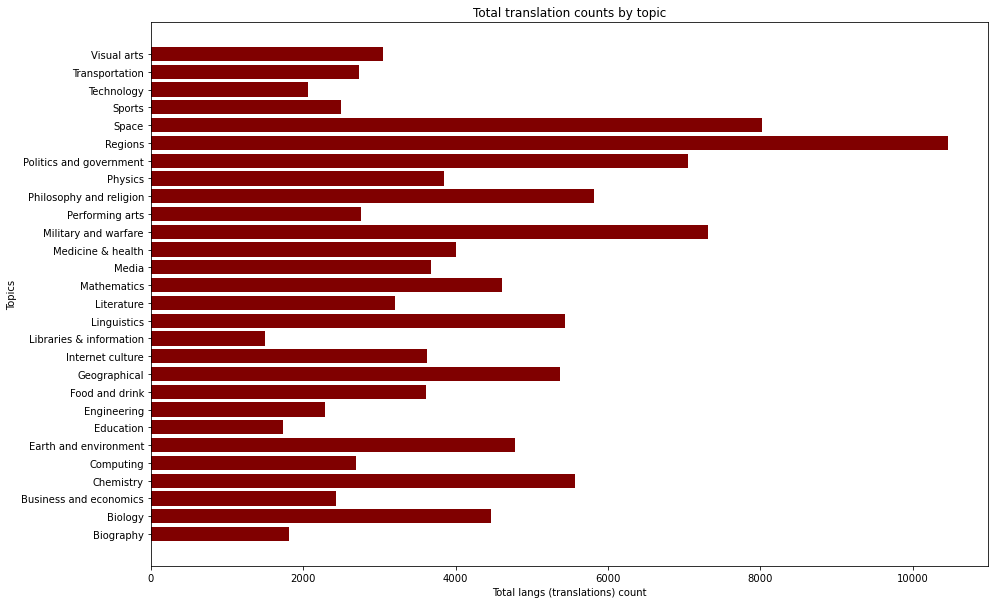

In [134]:
## Pie chart
import numpy as np
import matplotlib.pyplot as plt
 
data_pie = df.groupby(['category'])['langs_count'].sum()
courses = list(data_pie.index)
values = list(data_pie.values)

fig = plt.figure(figsize = (15, 10))
plt.barh(courses, values, color ='maroon')     
 
plt.xlabel("Total langs (translations) count")
plt.ylabel("Topics")
plt.title("Total translation counts by topic")
plt.show()

In [135]:
grp = df.groupby('category')
grp.describe().reset_index()

category langs_count                                   \
                                  count       mean        std  min   25%   
0                 Biography       400.0   4.537500   7.078408  0.0   1.0   
1                   Biology       398.0  11.226131  25.617200  0.0   0.0   
2    Business and economics       399.0   6.095238  12.822560  0.0   0.0   
3                 Chemistry       399.0  13.969925  30.909726  0.0   1.0   
4                 Computing       390.0   6.905128  15.896475  0.0   0.0   
5     Earth and environment       313.0  15.268371  27.479331  0.0   1.0   
6                 Education       374.0   4.633690  10.737274  0.0   0.0   
7               Engineering       397.0   5.770781  14.760901  0.0   0.0   
8            Food and drink       399.0   9.060150  18.898071  0.0   1.0   
9              Geographical       400.0  13.425000   9.090433  0.0  12.0   
10         Internet culture       394.0   9.187817  18.755295  0.0   0.0   
11  Libraries & information       320.0   4.668750  10.350728  0.0   0.0   
12              Linguistics       398.0  13.650754  23.263709  0.0   1.0   
13               Literature       398.0   8.035176  18.479855  0.0   0.0   
14              Mathematics       400.0  11.520000  21.516552  0.0   1.0   
15                    Media       347.0  10.582133  21.455722  0.0   1.0   
16        Medicine & health       400.0  10.015000  25.242280  0.0   1.0   
17     Military and warfare       398.0  18.381910  23.068508  0.0   3.0   
18          Performing arts       399.0   6.907268  19.329305  0.0   0.0   
19  Philosophy and religion       400.0  14.555000  26.689000  0.0   1.0   
20                  Physics       398.0   9.658291  19.450352  0.0   1.0   
21  Politics and government       400.0  17.617500  31.486500  0.0   1.0   
22                  Regions       400.0  26.167500  36.093785  0.0   2.0   
23                    Space       398.0  20.143216  30.852899  0.0   1.0   
24                   Sports       373.0   6.683646  10.727148  0.0   0.0   
25               Technology       362.0   5.687845  13.460080  0.0   0.0   
26           Transportation       400.0   6.830000  15.668115  0.0   0.0   
27              Visual arts       377.0   8.095491  14.814147  0.0   0.0   

                        
     50%    75%    max  
0    2.0   5.00   47.0  
1    2.0   9.00  237.0  
2    1.0   5.00  150.0  
3    3.0  12.00  187.0  
4    1.0   7.00  154.0  
5    4.0  17.00  212.0  
6    1.0   3.00   75.0  
7    1.0   4.00  116.0  
8    3.0   8.00  193.0  
9   14.0  16.00   95.0  
10   2.0  11.00  187.0  
11   1.0   4.00   74.0  
12   4.0  16.00  192.0  
13   2.0   7.75  195.0  
14   4.0  13.00  242.0  
15   3.0  10.50  212.0  
16   2.0   8.00  188.0  
17  11.0  25.00  222.0  
18   1.0   4.50  176.0  
19   3.0  15.00  205.0  
20   2.0  10.00  234.0  
21   4.0  18.00  200.0  
22  10.0  37.00  195.0  
23   7.0  23.75  224.0  
24   1.0   9.00   57.0  
25   1.0   5.00  160.0  
26   1.0   6.00  155.0  
27   2.0   7.00   83.0

### Mean by category/topic

Mean is the average of all of the numbers. The disadvantage of the mean is that big numbers will greatly affect the final
results, and it is harder to predict what is the "common" number of translations it gets.

In [136]:
display(df.groupby('category').mean(numeric_only=True).reset_index(0))

,category,langs_count
0,Biography,4.537500
1,Biology,11.226131
2,Business and economics,6.095238
3,Chemistry,13.969925
4,Computing,6.905128
5,Earth and environment,15.268371
6,Education,4.633690
7,Engineering,5.770781
8,Food and drink,9.060150
9,Geographical,13.425000


### Median by category/topic

A median is a value separating the higher half from the lower half of a data sample, a population or a probability distribution. For a data set, it may be thought of as "the middle" value.


In [137]:
display(df.groupby('category').median(numeric_only=True).reset_index(0))

,category,langs_count
0,Biography,2.0
1,Biology,2.0
2,Business and economics,1.0
3,Chemistry,3.0
4,Computing,1.0
5,Earth and environment,4.0
6,Education,1.0
7,Engineering,1.0
8,Food and drink,3.0
9,Geographical,14.0


### Mode by category/topic

The mode of a set of data values is the value that appears most often. The disadvantage of using the mode is that we get 
an absolute number, where the category may be getting something in a particular range. Such that, 4 (translations per article)  has 6 counts (appeareances), but 3 and 5 (translations per articles) appear 5 and 4 times respectively.  


In [138]:
df.groupby(['category'])['langs_count'].agg(pd.Series.mode)

category
Biography                   0
Biology                     0
Business and economics      0
Chemistry                   0
Computing                   0
Earth and environment       0
Education                   0
Engineering                 0
Food and drink              0
Geographical               14
Internet culture            0
Libraries & information     0
Linguistics                 0
Literature                  0
Mathematics                 0
Media                       0
Medicine & health           0
Military and warfare        0
Performing arts             0
Philosophy and religion     0
Physics                     0
Politics and government     0
Regions                     0
Space                       0
Sports                      0
Technology                  0
Transportation              0
Visual arts                 0
Name: langs_count, dtype: int32

### Categorize and group according to ranges


- __<= 4__: low
- __<= 7__: medium
- __> 7__: high

In [144]:
from enum import Enum

# we are defining categories and benchmarks to group articles
class TranslationsCategory(Enum):
    LOW = 2
    MEDIUM = 5     
    HIGH = 5
    

In [145]:
df['status'] = df.apply(lambda row: "low" if (row.langs_count <= TranslationsCategory.LOW.value)
                                      else "medium" if (row.langs_count <= TranslationsCategory.MEDIUM.value) 
                                      else "high", axis = 1)


df

,title,pageid,last_revision,langs_count,category,wiki_lang,status
0,Paul_Molitor,37462,1150311951,11,Biography,en,high
1,Tyler_Ward,35489734,1163257848,5,Biography,en,medium
2,Marianne_Blicher,54196689,1035589093,0,Biography,en,low
3,Marta_Felicitas_Galedary,52805439,1056901950,0,Biography,en,low
4,Spyros_Gogolos,8408666,1164454321,2,Biography,en,low
...,...,...,...,...,...,...,...
11154,Unfolding_Object,8526082,788458780,0,Visual arts,en,low
11155,Tile_art,50613718,1142127194,0,Visual arts,en,low
11156,Alternative_exhibition_space,19135007,1148533614,1,Visual arts,en,low
11157,Outline_of_photography,6556867,1153400574,0,Visual arts,en,low


In [146]:
# get the counts of articles by category groups
status_by_category = df.groupby('category')['status'].value_counts()

display(status_by_category)
sum(status_by_category['Biography'].values)

category        status
Biography       low       219
                high       97
                medium     84
Biology         low       201
                high      136
                         ... 
Transportation  high      105
                medium     54
Visual arts     low       205
                high      116
                medium     56
Name: status, Length: 84, dtype: int64

400

In [147]:
# show the structure of the data

display(status_by_category.index)
display(status_by_category.values)

MultiIndex([(              'Biography',    'low'),
            (              'Biography',   'high'),
            (              'Biography', 'medium'),
            (                'Biology',    'low'),
            (                'Biology',   'high'),
            (                'Biology', 'medium'),
            ( 'Business and economics',    'low'),
            ( 'Business and economics',   'high'),
            ( 'Business and economics', 'medium'),
            (              'Chemistry',    'low'),
            (              'Chemistry',   'high'),
            (              'Chemistry', 'medium'),
            (              'Computing',    'low'),
            (              'Computing',   'high'),
            (              'Computing', 'medium'),
            (  'Earth and environment',   'high'),
            (  'Earth and environment',    'low'),
            (  'Earth and environment', 'medium'),
            (              'Education',    'low'),
            (              'Edu

array([219,  97,  84, 201, 136,  61, 252,  99,  48, 197, 144,  58, 234,
       106,  50, 143, 127,  43, 278,  65,  31, 276,  77,  44, 198, 130,
        71, 332,  53,  15, 204, 142,  48, 214,  61,  45, 170, 157,  71,
       228, 116,  54, 169, 165,  66, 166, 129,  52, 217, 119,  64, 259,
        91,  48, 264,  90,  45, 170, 168,  62, 201, 135,  62, 176, 166,
        58, 239, 114,  47, 218, 135,  45, 215, 123,  35, 221,  79,  62,
       241, 105,  54, 205, 116,  56], dtype=int64)

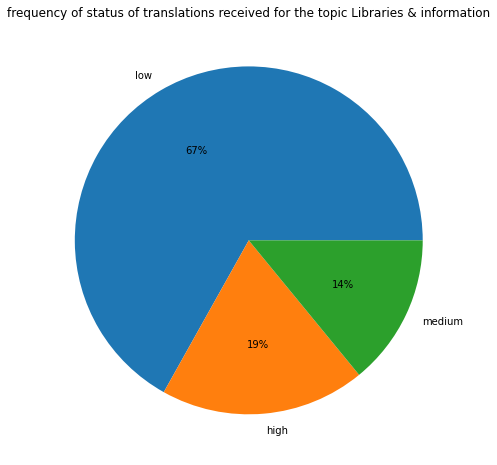

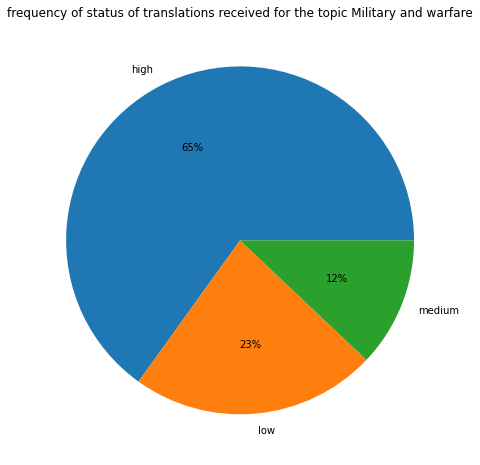

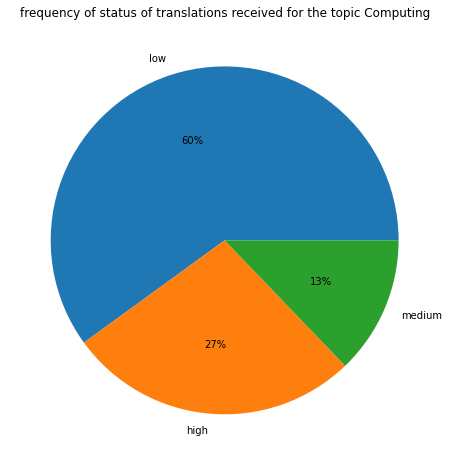

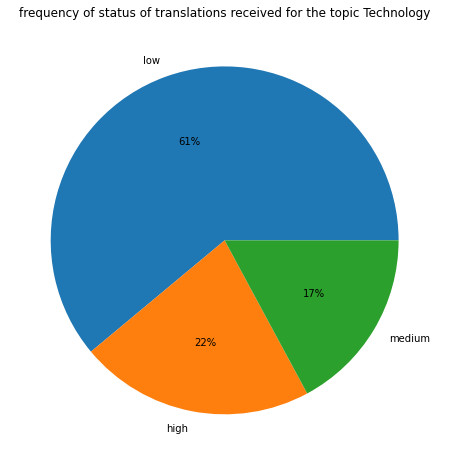

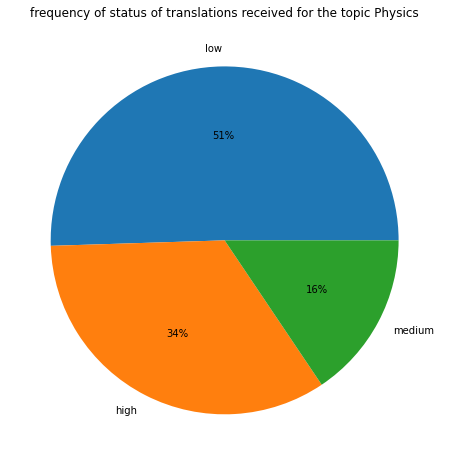

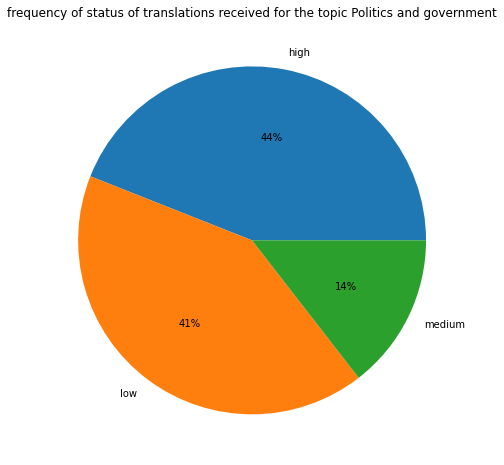

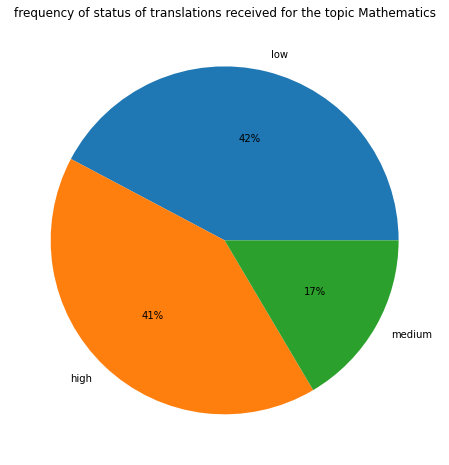

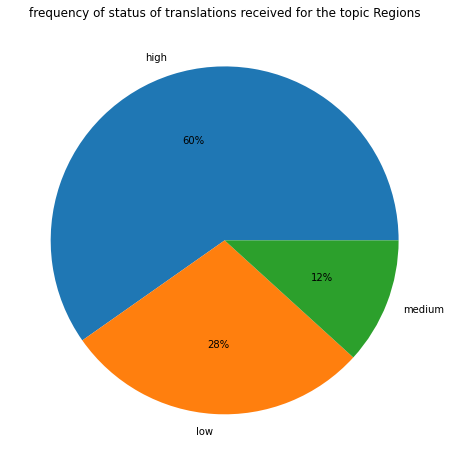

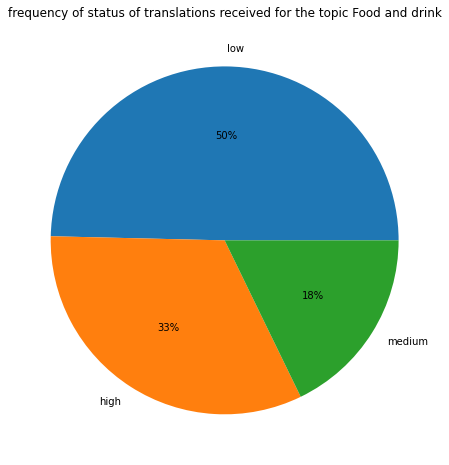

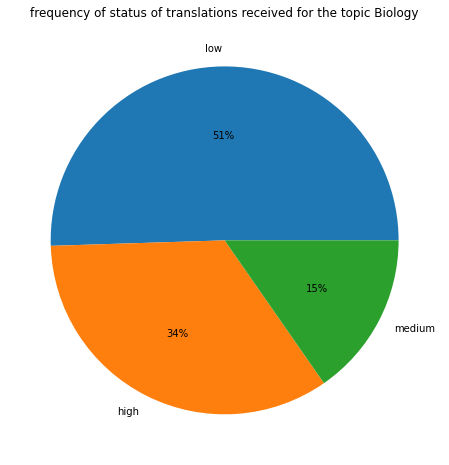

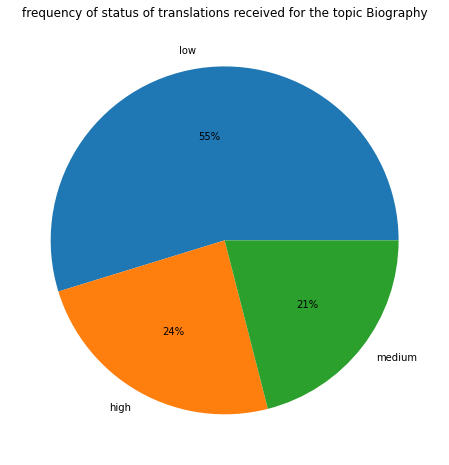

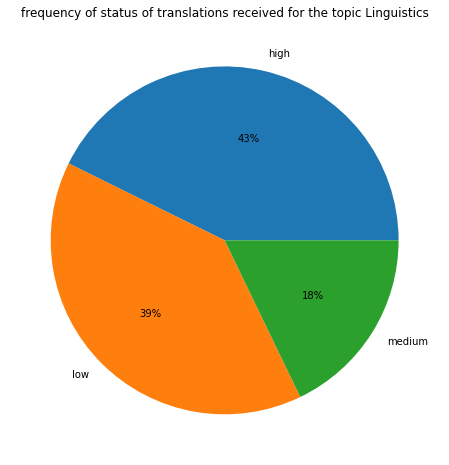

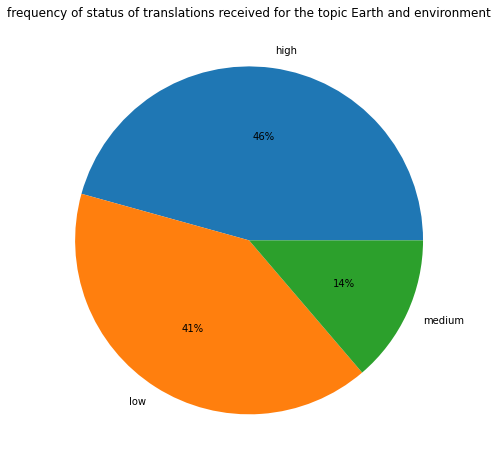

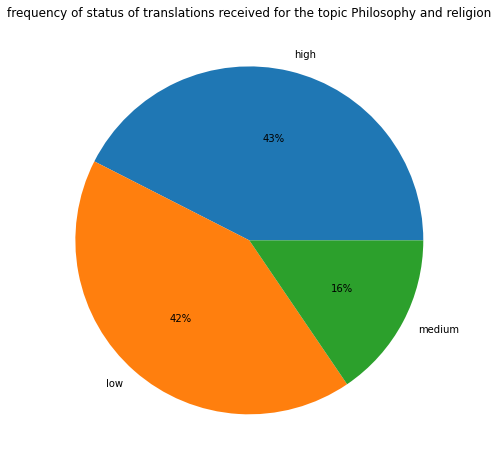

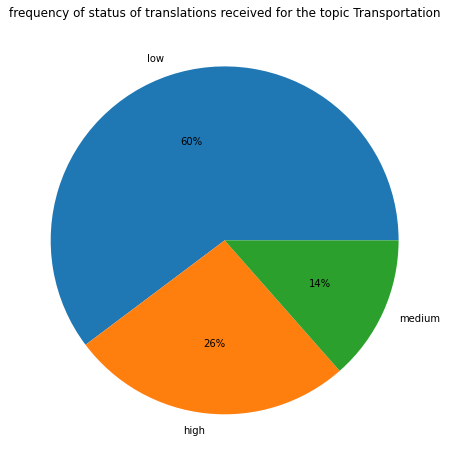

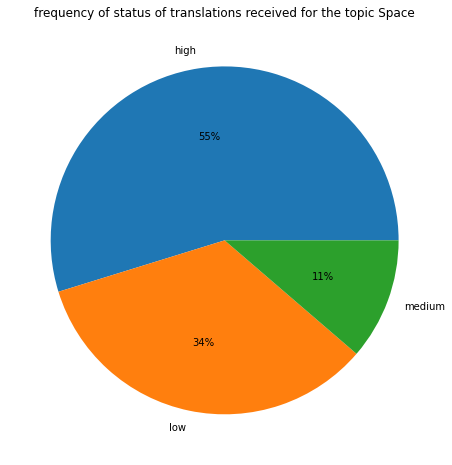

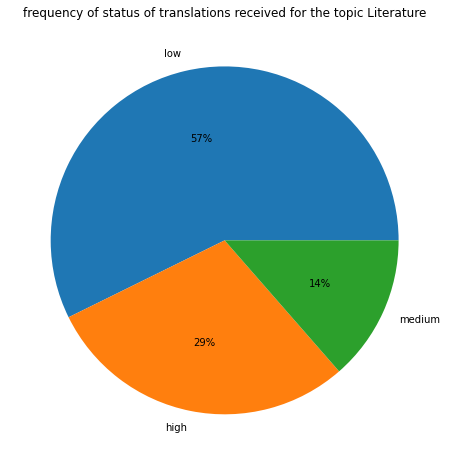

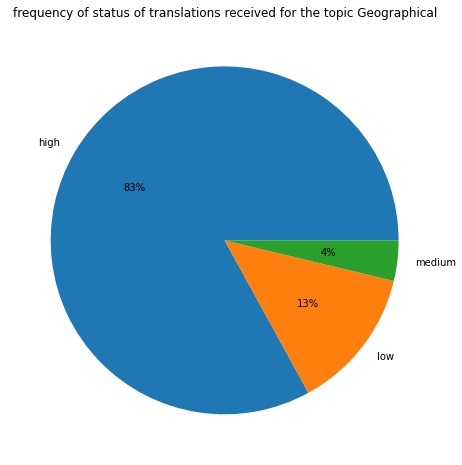

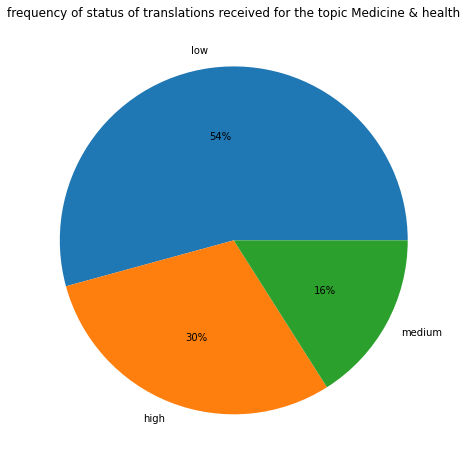

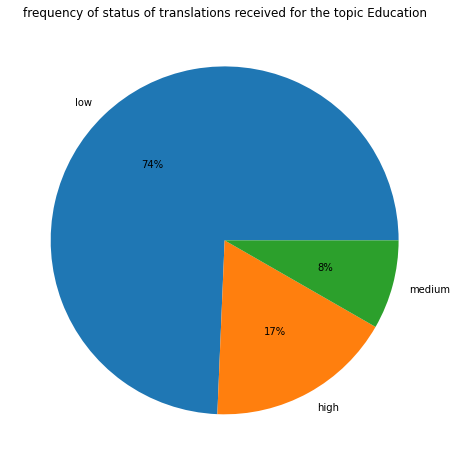

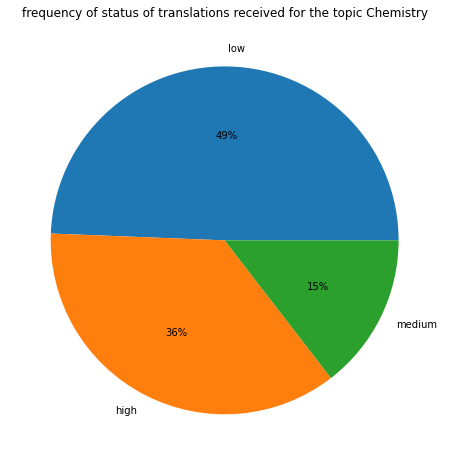

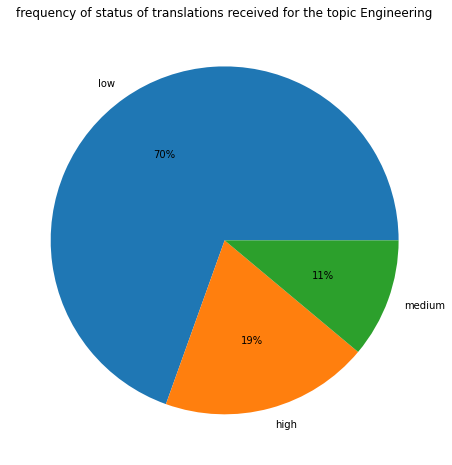

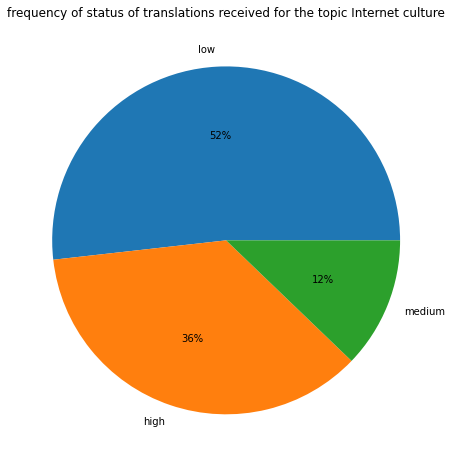

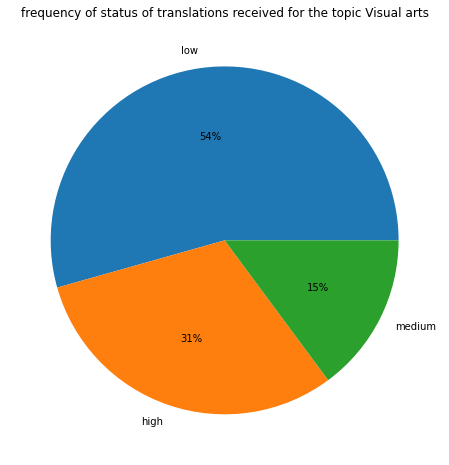

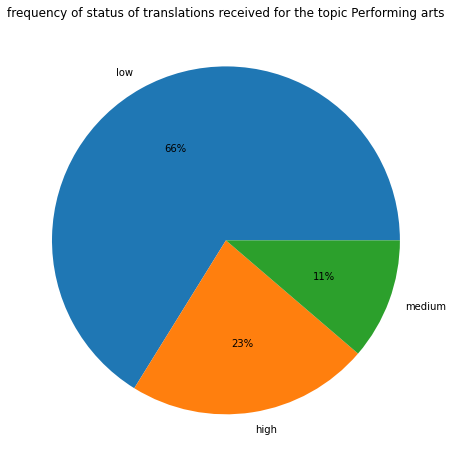

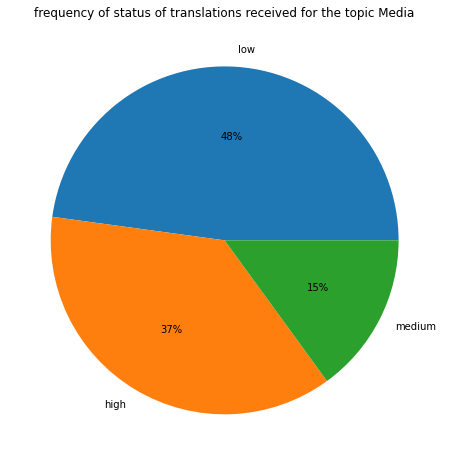

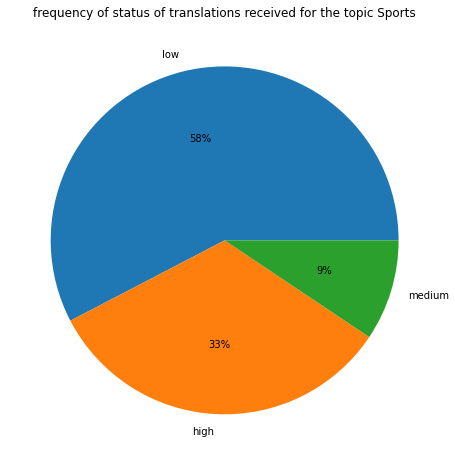

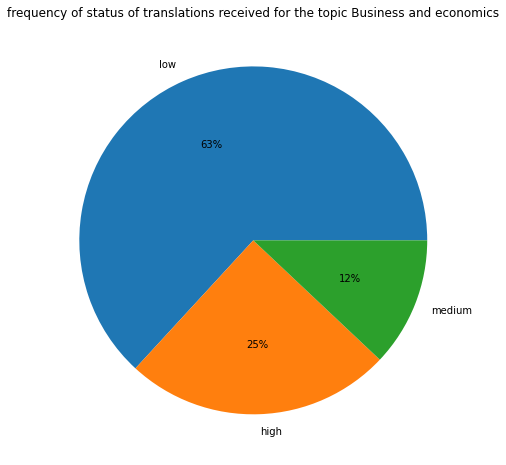

In [148]:
## Show distribution by specific language level

categories_status = set(status_by_category.index.get_level_values(0))
for label in categories_status:
    data = status_by_category[label]
    
    values = data.values.tolist()
    labels = data.index.tolist()
    
    plt.rcParams["figure.figsize"] = (20,8)
    plt.title(f'frequency of status of translations received for the topic {label}')
    plt.pie(values, labels=labels, autopct='%.0f%%')
    plt.show()
    

In [149]:
display(status_by_category['Literature'])

status
low       228
high      116
medium     54
Name: status, dtype: int64

In [150]:
## Prepare data to provide a final answer to the research question
low_values = []
medium_values = []
high_values = []

for label_ in categories_status:
    # get values
    total = sum(status_by_category[label_].values)
    low = status_by_category[label_].get('low', 0.0)
    medium = status_by_category[label_].get('medium', 0.0)
    high = status_by_category[label_].get('high', 0.0)
    
    # transform to percentages so that they can be compared to others, add values to list
    low_values.append(low/total)
    medium_values.append(medium/total)
    high_values.append(high/total)
    

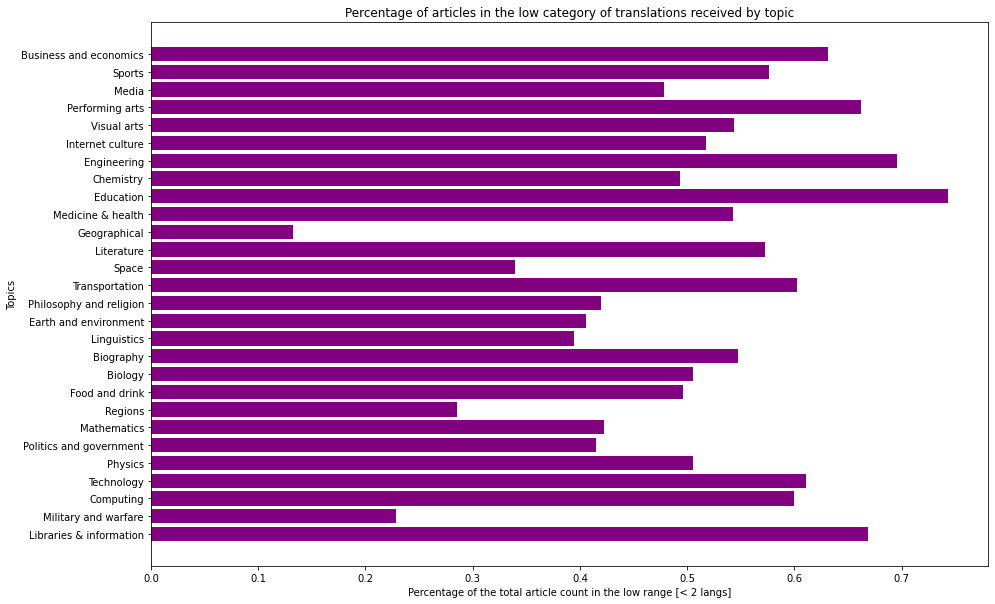

In [151]:
## Display results

## Low range
index =  list(categories_status)
values = low_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='purple')     
 
plt.xlabel("Percentage of the total article count in the low range [< 2 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the low category of translations received by topic")
plt.show()



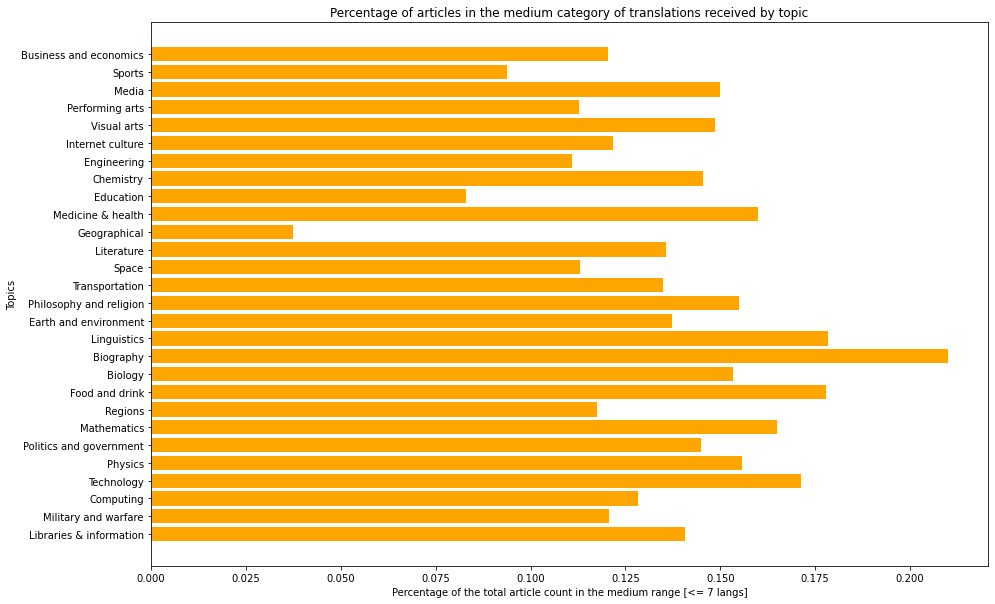

In [152]:
## Display results

## medium range
index =  list(categories_status)
values = medium_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='orange')     
 
plt.xlabel("Percentage of the total article count in the medium range [<= 7 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the medium category of translations received by topic")
plt.show()

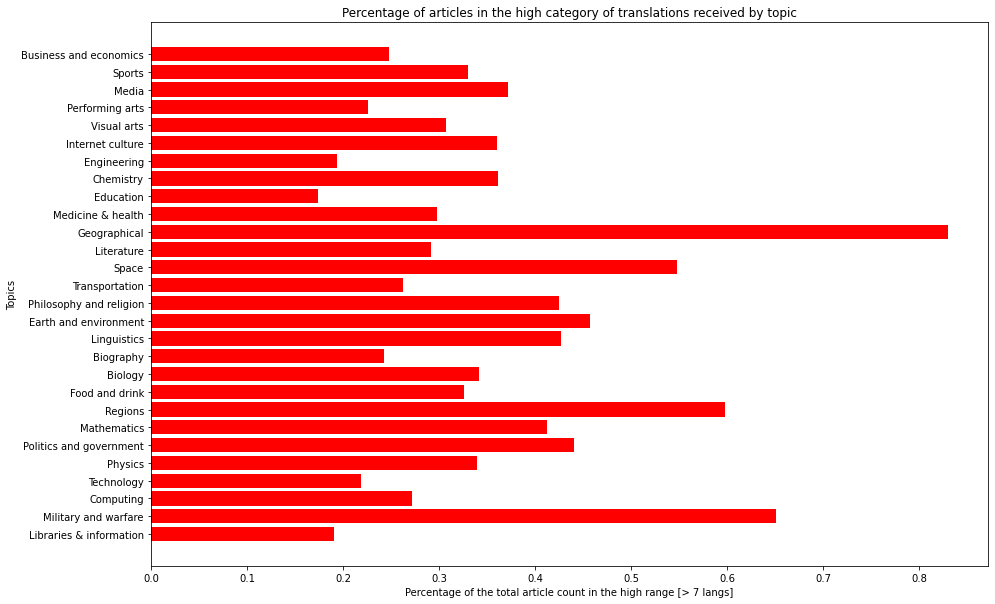

In [153]:
## Display results

## high range
index =  list(categories_status)
values = high_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='red')     
 
plt.xlabel("Percentage of the total article count in the high range [> 7 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the high category of translations received by topic")
plt.show()

### 6. Explore further the groups of languages being translated and their pairs [if necessary]

In [1]:
#### English

In [ ]:
#### Czech

In [ ]:
#### Arabic

In [ ]:
#### Korean